In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
twitter_data = pd.read_json('tweets_MSFT18-19_mod.json', orient='split')
stock_data = pd.read_json('MSFT-18-19.json')

In [3]:
if(len(twitter_data) != len(stock_data)):
    twitter_data = twitter_data[:-(len(twitter_data) - len(stock_data))]

import datetime
print(twitter_data.columns)
print(len(twitter_data))
print(stock_data.columns)
print(len(stock_data))
twitter_dataMod = twitter_data
print(len(twitter_dataMod))

twitter_dates = list(twitter_data.get('dates'))
stock_dates = list(stock_data.index)

stock_date = [k.ctime() for k in stock_dates]
stock_nptime = np.array([np.datetime64(k, 'D') for k in stock_dates])
print(stock_nptime)

minTime = '2018-01-01'
maxTime = '2019-07-08'

dates = np.arange(np.datetime64(minTime), np.datetime64(maxTime))
dates = dates[np.is_busday(dates)]
datesIncluded = len(dates)

print([k for k in dates if k not in stock_nptime])

Index(['dates', 'vader_mean', 'vader_std', 'volume', 'mean_exist',
       'std_exist'],
      dtype='object')
380
Index(['APO', 'Aroon Down', 'Real Middle Band', 'MIDPOINT', 'OBV', 'SINE',
       'QUADRATURE', 'open', 'close', 'nopen', 'nhigh', 'nlow', 'nclose',
       'nvolume'],
      dtype='object')
380
380
['2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-08'
 '2018-01-09' '2018-01-10' '2018-01-11' '2018-01-12' '2018-01-16'
 '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-22' '2018-01-23'
 '2018-01-24' '2018-01-25' '2018-01-26' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-05' '2018-02-06'
 '2018-02-07' '2018-02-08' '2018-02-09' '2018-02-12' '2018-02-13'
 '2018-02-14' '2018-02-15' '2018-02-16' '2018-02-20' '2018-02-21'
 '2018-02-22' '2018-02-23' '2018-02-26' '2018-02-27' '2018-02-28'
 '2018-03-01' '2018-03-02' '2018-03-05' '2018-03-06' '2018-03-07'
 '2018-03-08' '2018-03-09' '2018-03-12' '2018-03-13' '2018-03-14'
 '2018-03-15' '2018-03-16' '

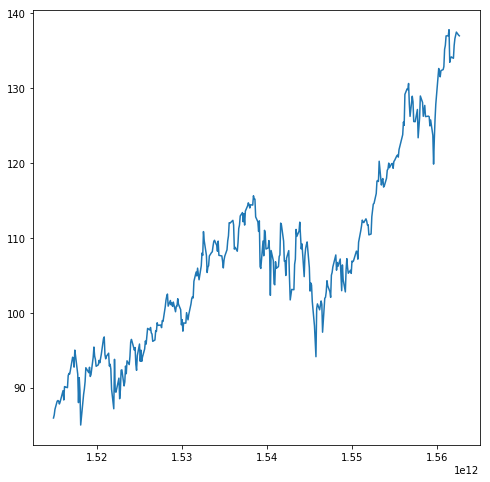

In [4]:
plt.figure(figsize=(8, 8))
plt.plot(twitter_dataMod.get('dates'), stock_data.get('close'))

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = True, with_mean = True, with_std = True)

# Shift the data to enable one-step t + 1 prediction

# Build the x and y values, note: x includes the previous opening price and closing prices

LAG_STEPS = 3 # Counted including implied lag step of 1

dataLength = len(twitter_dataMod)-1

#twitter_dataMod2 = twitter_dataMod.drop(twitter_dataMod.index[[np.array(range(LAG_STEPS)), 
#                                                               dataLength-np.array(range(LAG_STEPS))]])
#stock_dataMod = stock_data.drop(stock_data.index[[np.array(range(LAG_STEPS)), 
#                                                               dataLength-np.array(range(LAG_STEPS))]])
#stock_dataMod2 = stock_data.drop(stock_data.index[np.array(range(LAG_STEPS*2))])
twitter_dataMod2 = twitter_dataMod.to_numpy()
scaler.fit(twitter_dataMod2[:,3].reshape(-1, 1))
twitter_dataMod2[:,3] = np.ravel(scaler.transform(twitter_dataMod2[:,3].reshape(-1,1)))
twitter_dataMod2 = np.delete(twitter_dataMod2, 0, axis = 1)

stock_dataMod = stock_data.to_numpy()
scaler.fit(stock_dataMod)
stock_dataMod = scaler.transform(stock_dataMod)
stock_dataMod = np.delete(stock_dataMod, [7,8], axis = 1)

stock_dataMod2 = stock_data.to_numpy()
scaler.fit(stock_dataMod2)
stock_dataMod2 = scaler.transform(stock_dataMod2)
stock_dataMod2 = np.delete(stock_dataMod2, [0,1,2,3,4,5,6,9,10,11,12,13], axis = 1)


for i in range(LAG_STEPS, dataLength):
    temp_twitter = (twitter_dataMod2[i - np.array(range(LAG_STEPS))]).reshape(1,-1)
    temp_stock = (stock_dataMod[i - np.array(range(LAG_STEPS))]).reshape(1,-1)
    temp_stock2 = (stock_dataMod[i - np.array(range(1, 1+LAG_STEPS))]).reshape(1,-1)
    if i == LAG_STEPS:
        x_unscaled = np.concatenate((temp_twitter, temp_stock, temp_stock2), axis = 1)
    else:
        temp_arr = np.concatenate((temp_twitter, temp_stock, temp_stock2), axis = 1)
        x_unscaled = np.concatenate((x_unscaled, temp_arr), axis = 0)

#twitter_dataMod2 = twitter_dataMod.to_numpy()
#twitter_dataMod2 = np.delete(twitter_dataMod2, 0, axis = 1)
#twitter_dataMod2 = np.delete(twitter_dataMod2, [np.array(range(LAG_STEPS)), dataLength-np.array(range(LAG_STEPS))], axis = 0)

#twitter_dataMod2 = twitter_dataMod.to_numpy()
#stock_dataMod = np.delete(stock_dataMod, [7,8], axis = 1)
#stock_dataMod = np.delete(stock_dataMod, [np.array(range(LAG_STEPS)), dataLength-np.array(range(LAG_STEPS))], axis = 0)

#stock_dataMod2 = stock_data.to_numpy()
#stock_dataMod2 = np.delete(stock_dataMod2, range(7), axis = 1)
#stock_dataMod2 = np.delete(stock_dataMod2, range(LAG_STEPS*2), axis = 0)

#x = np.vstack((twitter_dataMod2.get('vader_mean'), twitter_dataMod2.get('vader_std'), 
#          twitter_dataMod2.get('volume'), twitter_dataMod2.get('mean_exist'),
#          twitter_dataMod2.get('std_exist'))).T

#x2 = np.vstack((temp_stockMod[:, 0], temp_stockMod[:, 1], temp_stockMod[:, 2], 
#          temp_stockMod[:, 3], temp_stockMod[:, 4], temp_stockMod[:, 5],
#          temp_stockMod[:, 6], temp_stockMod2[:, 7], temp_stockMod2[:, 8])).T

#x_unscaled = np.concatenate((x, x2), axis=1)


#twitter_dataMod2 = twitter_dataMod.drop(twitter_dataMod.index[[0, 119]])
#stock_dataMod = stock_data.drop(stock_data.index[[0, 119]]).to_numpy()
#stock_dataMod2 = stock_data.drop(stock_data.index[[118, 119]]).to_numpy()

print(len(x_unscaled))
print(x_unscaled[0])
print(len(x_unscaled[0]))

stock_dataMod3 = stock_data.drop(stock_data.index[range(LAG_STEPS)]).to_numpy()

y_open = stock_dataMod3[:, 7]
y_close = stock_dataMod3[:, 8]
y_classifier = np.empty(y_open.size-1, dtype = int)

for i in range(y_open.size-1):
    y_classifier[i] = 1 * (y_open[i+1] >= y_open[i])

y_open = np.delete(y_open, 0)
y_close = np.delete(y_close, 0)

y_open = y_open.reshape(-1, 1)
y_close = y_close.reshape(-1, 1)
y_classifier = y_classifier.reshape(-1, 1)

print(y_open.size)
print(y_classifier.size)

376
[ 0.36552727  0.34884814 -0.62480815  1.          1.          0.34603099
  0.39403503  0.90386513  1.          1.          0.28154286  0.39028063
 -0.82594938  1.          1.         -0.0940396  -0.84562887 -1.90191096
 -1.99337573 -1.11758898  1.57358586  0.24524414 -1.01860627 -1.10187236
 -0.87702868 -0.93654293 -0.4990864  -0.06157825 -0.89730048 -1.91989103
 -2.02771694 -1.22843671 -0.25592687  0.30322642 -1.06038989 -1.20765621
 -0.94008225 -1.09031179 -0.30161482 -0.00400529 -0.89730048 -1.93683661
 -2.03504306 -1.33249096 -1.414752    0.1964416  -1.25102765 -1.28631601
 -1.0788001  -1.12158682 -0.12971655 -0.06157825 -0.89730048 -1.91989103
 -2.02771694 -1.22843671 -0.25592687  0.30322642 -1.06038989 -1.20765621
 -0.94008225 -1.09031179 -0.30161482 -0.00400529 -0.89730048 -1.93683661
 -2.03504306 -1.33249096 -1.414752    0.1964416  -1.25102765 -1.28631601
 -1.0788001  -1.12158682 -0.12971655  0.0360508  -0.89730048 -1.95283009
 -2.05474118 -1.45144073 -1.5931228  -0.0669609

In [6]:
# standardize the data
from sklearn.preprocessing import StandardScaler
# import the splitting library
from sklearn.model_selection import train_test_split

def splitData(x, y, val):
    if not(val):
        x_train = x[range(int(0.8*len(x)))]
        y_train = y[range(int(0.8*len(x)))]
        x_test = x[range(int(0.8*len(x)), len(x))]
        y_test = y[range(int(0.8*len(x)), len(x))]
        scaler = StandardScaler(copy = True, with_mean = True, with_std = True)
        return x, x_train, x_test, y_train, y_test
    else:
        x_temp = np.array_split(x[range(int(0.8*len(x)))], 15)
        y_temp = np.array_split(y[range(int(0.8*len(x)))], 15)
        
        x_train = np.array([arr[range(len(arr)-3)] for arr in x_temp])
        x_val = np.array([arr[range(len(arr)-3, len(arr))] for arr in x_temp])
        y_train = np.array([arr[range(len(arr)-3)] for arr in y_temp])
        y_val = np.array([arr[range(len(arr)-3, len(arr))] for arr in y_temp])
        
        x_train = x_train.reshape(-1, len(x[0]))
        x_val = x_val.reshape(-1, len(x[0]))
        y_train = y_train.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        
        x_test = x[range(1+int(0.8*len(x)), len(x))]
        y_test = y[range(1+int(0.8*len(x)), len(x))]

        return x, x_train, x_val, x_test, y_train, y_val, y_test

0.9587358967264382
-0.04364295241258409
2.4426085691387907
38.515391408833935
0.9228479837213065
0.9228479837213065


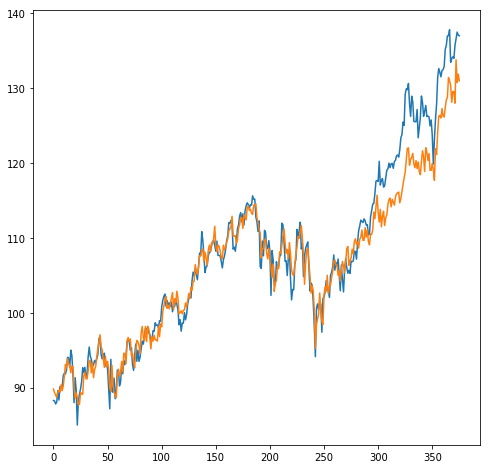

In [7]:
# basic linear regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn import linear_model

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = linear_model.LinearRegression().fit(x_train, y_train)

print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_train, reg.predict(x_train)))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))



1.0
0.9566745175305476
0.04748792070754082
2.5646309103186398
35.15222851913446
0.9131894811859328
0.9131894811859328


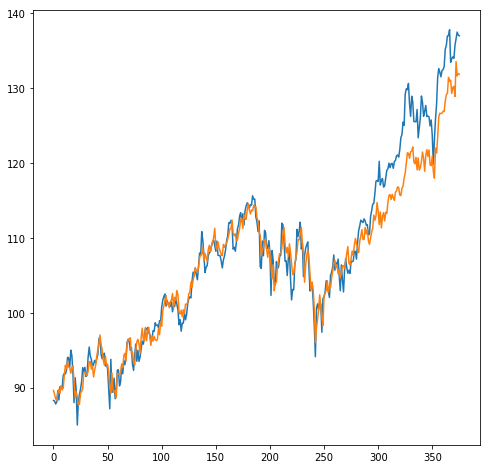

In [59]:
# ridge regression

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)
from sklearn import linear_model
x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = linear_model.RidgeCV(alphas = np.logspace(-5, 1, 7), fit_intercept = True)
reg.fit(x_train, y_train)
print(reg.alpha_)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))
print(mean_squared_error(y_train, reg.predict(x_train)))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))


0.9178231604696386
-0.3227218799953675
48.81473191121599
0.8914690964662798
0.8914690964662797


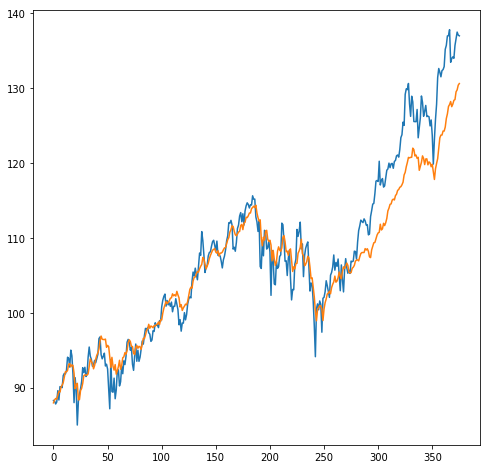

In [9]:
# lasso regression (LARS)

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = linear_model.LassoLars(alpha = 0.01, fit_path = True, fit_intercept = True, precompute = 'auto', max_iter = 10)

reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

0.7866666666666666
0.6710526315789473


C:\Users\patel\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


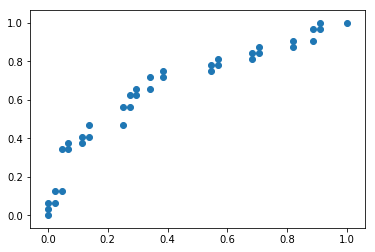

In [12]:
# Logistic regression
# this is actually a classifier

from sklearn import preprocessing
from sklearn.metrics import roc_curve

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y_close)

#x_train, x_test, y_train, y_test = train_test_split(x, encoded, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

reg = linear_model.LogisticRegression(multi_class = "ovr").fit(x_train, y_train)
print(reg.score(x_train, np.ravel(y_train)))
print(reg.score(x_test, np.ravel(y_test)))

fpr, tpr, threshold = roc_curve(y_test, reg.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

0.9542357491099172
0.11158395099622131
32.7867799827225
0.9132410860360406
0.9132410860360405


C:\Users\patel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


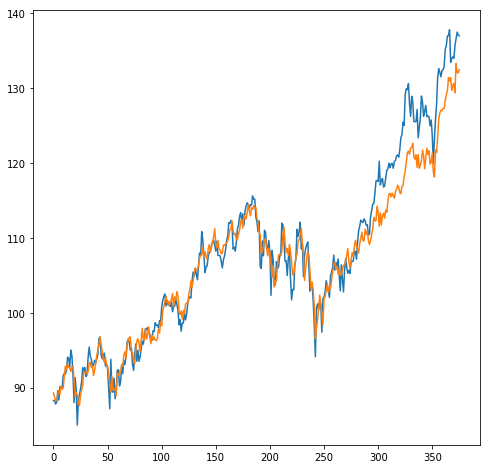

In [60]:
# Bayesian Ridge Regression

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = linear_model.BayesianRidge(compute_score = True)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

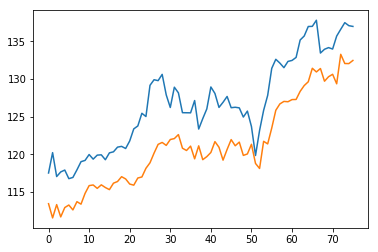

In [62]:
plt.plot(range(len(y_test)), y_test)
plt.plot(range(len(y_test)), reg.predict(x_test))

1.0
-1.245036787858747
82.85254110299138
-1.1202727976266935
-1.1202727976266935


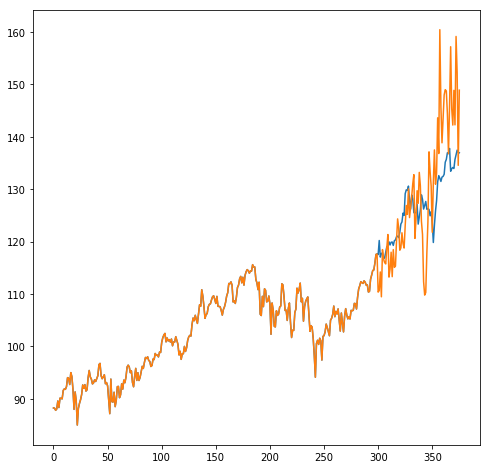

In [11]:
# Extend linear regression to polynomial 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)

#x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)

reg = linear_model.LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(z)), reg.predict(z))

1000.0
0.9387212734701617
-5.053537897402286
223.4043558553017
-0.16866885967672007
-0.16866885967672007


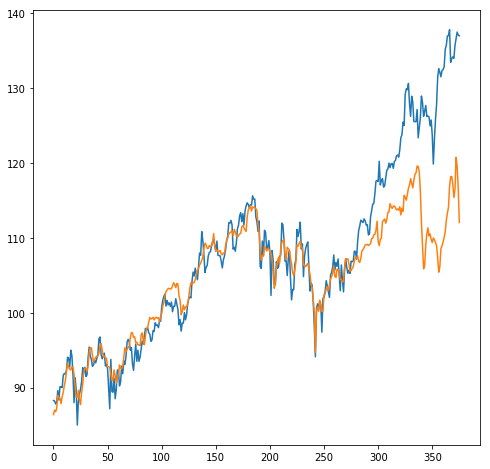

In [12]:
# Extend ridge regression to polynomial 

poly = PolynomialFeatures(degree=2)
z = poly.fit_transform(x)

#x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)

reg = linear_model.RidgeCV(alphas = np.logspace(-5, 5, 11), fit_intercept = True)
reg.fit(x_train, y_train)
print(reg.alpha_)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(z)), reg.predict(z))

0.8163307922311467
-1.850464231255907


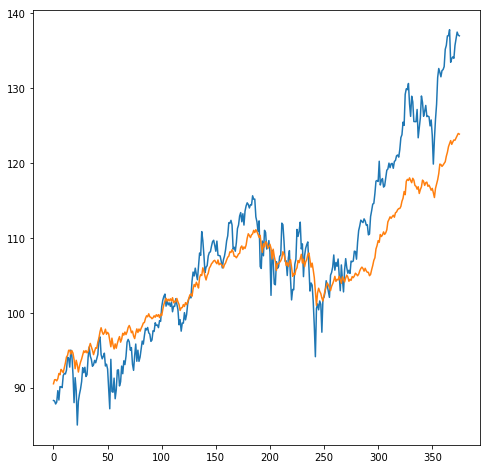

In [13]:
# Extend lasso regression to polynomial
poly = PolynomialFeatures(degree=2)
z = poly.fit_transform(x)

#x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)

reg = linear_model.LassoLars(alpha = 0.1, fit_intercept = True, precompute = 'auto',
                            fit_path = True, max_iter = 6)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(z)), reg.predict(z))

In [17]:
# extend logistic regression to polynomial

poly = PolynomialFeatures(degree=2)
z = poly.fit_transform(x)

from sklearn import preprocessing
from sklearn.metrics import roc_curve


x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)
y_train = lab_enc.fit_transform(np.ravel(y_train))
y_test = lab_enc.fit_transform(np.ravel(y_test))

reg = linear_model.LogisticRegression(multi_class = "ovr").fit(x_train, np.ravel(y_train))
print(reg.score(x_train, np.ravel(y_train)))
print(reg.score(x_test, np.ravel(y_test)))

fpr, tpr, threshold = roc_curve(y_test, reg.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

NameError: name 'lab_enc' is not defined

In [ ]:
# extend bayesian regression to polynomial
poly = PolynomialFeatures(degree=3)
z = poly.fit_transform(x)

#x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)
z = poly.fit_transform(x)

reg = linear_model.BayesianRidge(compute_score = True)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(z)), reg.predict(z))

0.9992104934459656
-0.1343361365216087
41.86240149115909
-0.0829485666129477
-0.0829485666129477


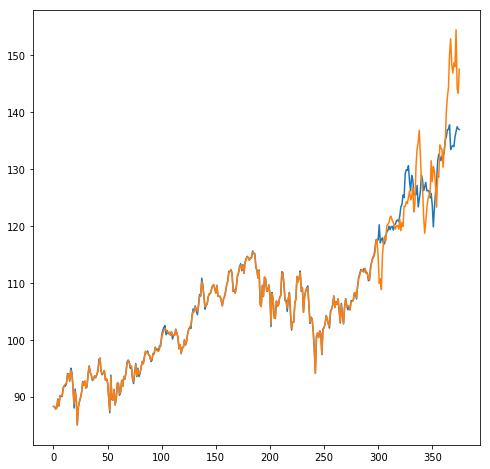

In [14]:
# Kernel ridge regression

from sklearn.kernel_ridge import KernelRidge

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = KernelRidge(alpha=0.01, coef0=1, degree = 3, kernel='poly')
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))


0.995362179635835
-0.1818783675048683
43.61693605735003
0.1452559397860964
0.1452559397860964
0.9966666666666667
0.5921052631578947


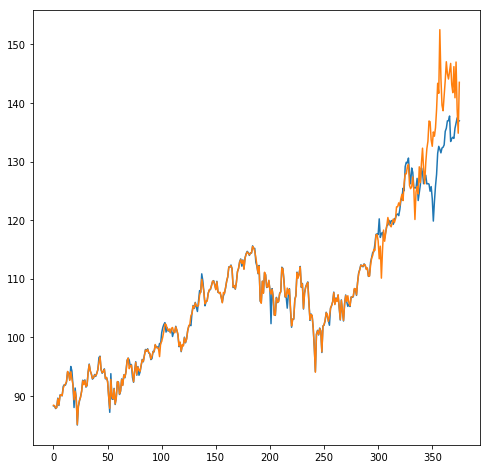

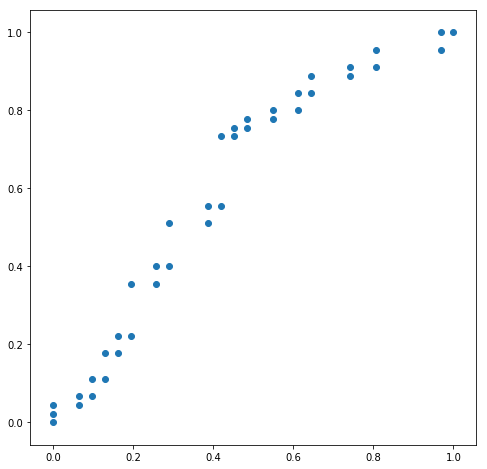

In [19]:
# Support Vector Regression && classification
from sklearn.svm import SVR
from sklearn.metrics import roc_curve

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = SVR(kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))


from sklearn.svm import SVC

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = SVC(kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000, probability = True)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

0.995003137869718
-0.21241250022998814
44.743790860056876
0.11152168597121115
0.11152168597121115
0.9533333333333334
0.6578947368421053


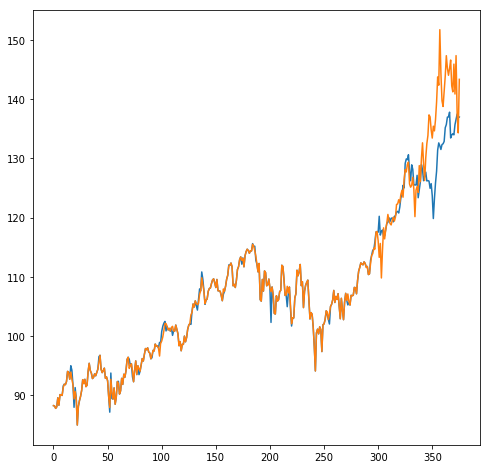

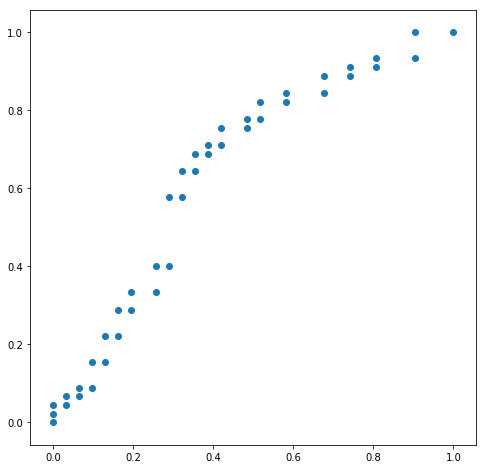

In [21]:
# Support Vector Regression && Classification
from sklearn.svm import NuSVR

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = NuSVR(nu = 0.5, kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

from sklearn.svm import NuSVC

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = NuSVC(nu = 0.4, kernel='rbf', max_iter=-1, gamma= 0.001, probability = True)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

1.0
-4.886392094811598
217.23588032998717
-0.05207185694664318
-0.05207185694664318
1.0
0.5657894736842105


C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


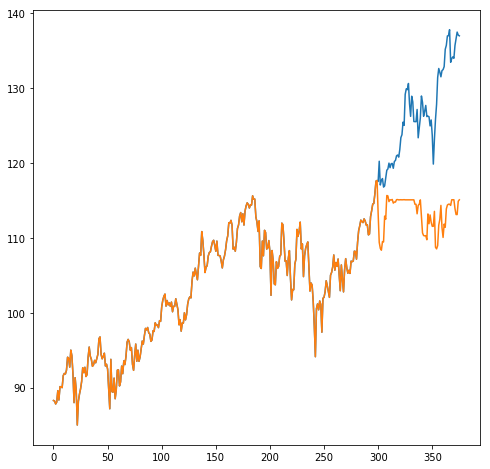

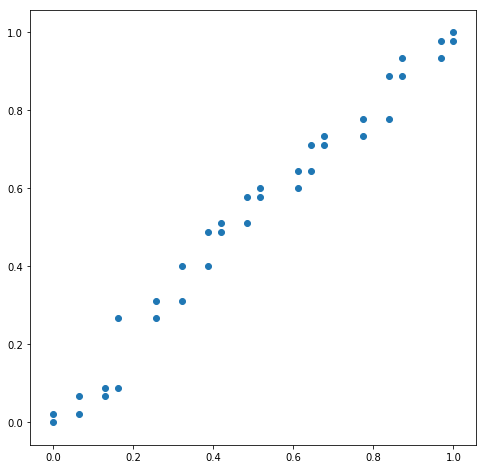

In [22]:
# Nearest Neighbors Regression && Classifier
from sklearn.neighbors import KNeighborsRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = KNeighborsRegressor(n_neighbors=4, weights = 'distance')
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

from sklearn.neighbors import KNeighborsClassifier

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = KNeighborsClassifier(n_neighbors=8, weights = 'distance')
cls.fit(x_train, y_train)
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

1.0
-0.7447936150236982


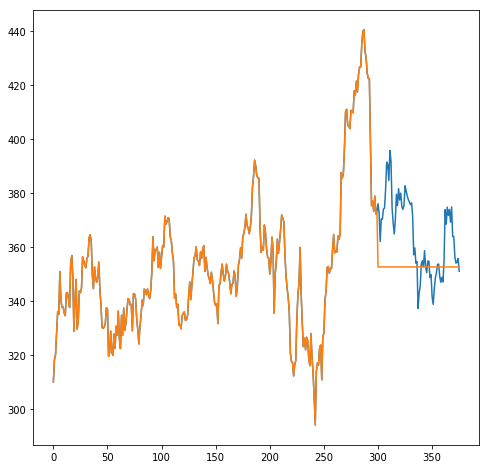

In [30]:
# Gaussian Process Regressor
from sklearn.gaussian_process import GaussianProcessRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = GaussianProcessRegressor(normalize_y = True, alpha = 1e-10)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

1.0
-10.761853988131364
434.0683842105265
-1.1141251401768542
-1.1141251401768542
1.0
0.5789473684210527


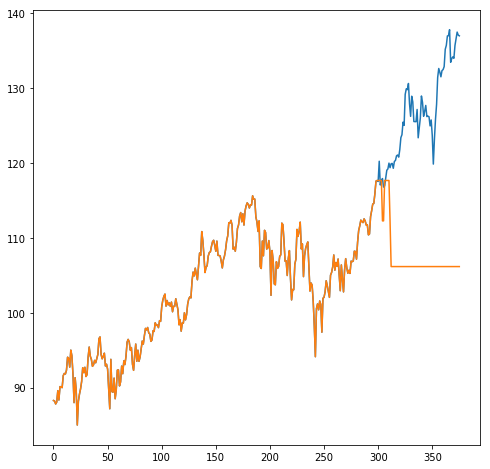

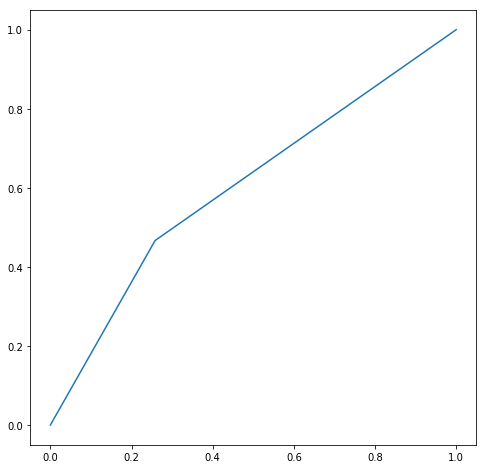

In [23]:
# Random Decision Tree
from sklearn import tree

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = tree.DecisionTreeRegressor()
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

from sklearn import tree

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = tree.DecisionTreeClassifier()
cls.fit(x_train, y_train)
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

0.3733928608679237
0.9320159491745017
23.124785318054503
0.5131994940956983
0.5131994940956983


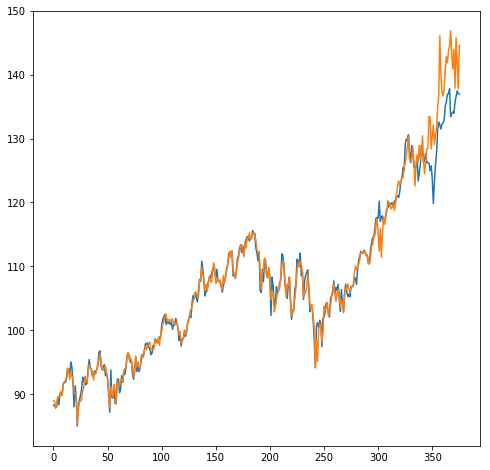

In [24]:
# Bagging NuSVR
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
 
#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = BaggingRegressor(NuSVR(nu = 0.75, kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000))
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_train, reg.predict(x_train)))
print(mean_squared_error(y_test, reg.predict(x_test)))

print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

0.85
0.5394736842105263


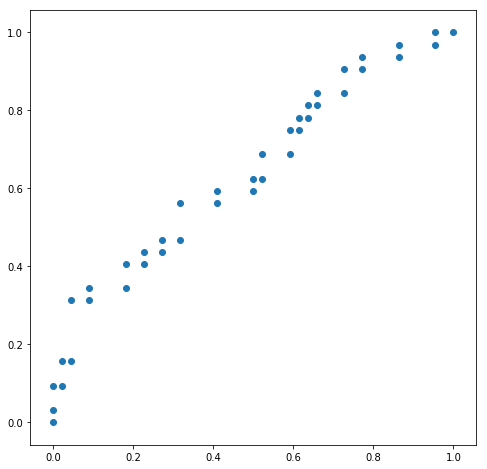

In [32]:
# Bagging NuSVC

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import NuSVC
from sklearn.metrics import roc_curve
 
#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = BaggingClassifier(NuSVC(nu = 0.3, kernel='rbf', max_iter=-1, gamma= 0.001, probability = True))
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

0.992760348814887
-6.0928129082289795
261.75854943355324
-0.18637314078243716
-0.18637314078243716


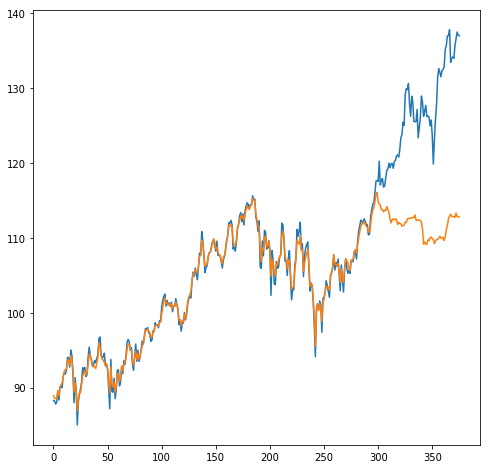

In [25]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = RandomForestRegressor(n_estimators = 100)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

1.0
0.5394736842105263


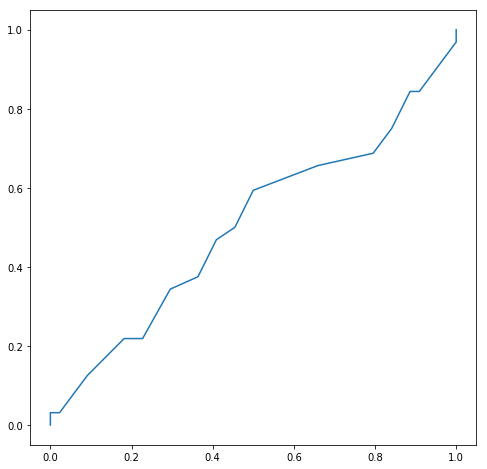

In [35]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = RandomForestClassifier(n_estimators = 75)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

1.0
-6.595712468445702
280.3179363927632
-0.16826260597790732
-0.16826260597790732


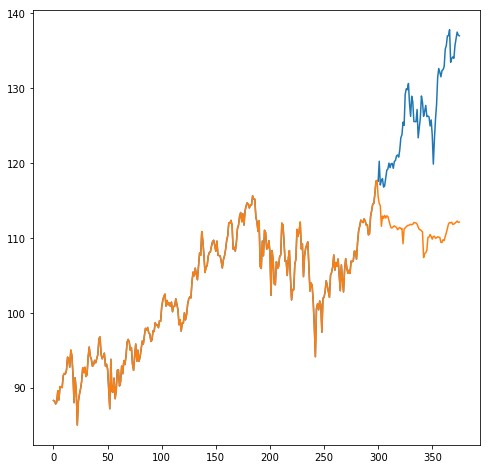

In [26]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = ExtraTreesRegressor(n_estimators = 100)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

1.0
0.5526315789473685


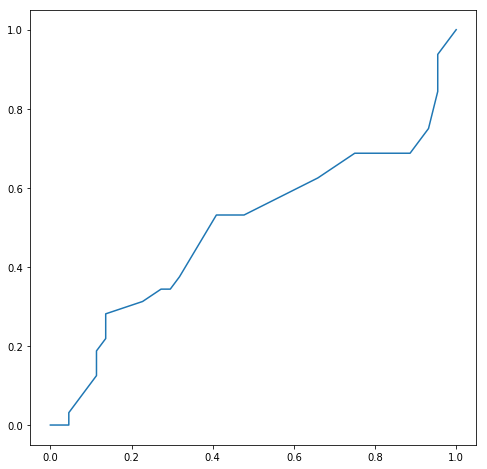

In [37]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = ExtraTreesClassifier(n_estimators = 100)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

0.9935138855962649
-6.026753116643832


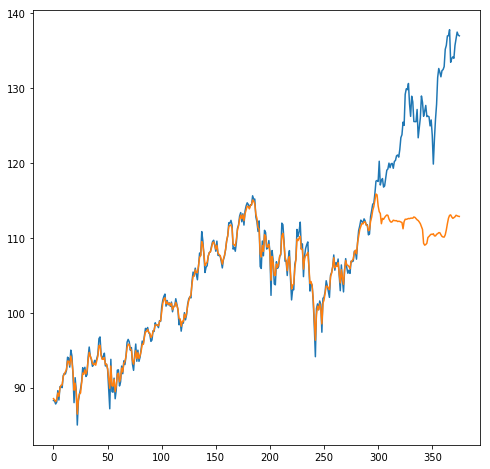

In [27]:
# Bagging Extreme Random Trees
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = BaggingRegressor(ExtraTreesRegressor(n_estimators = 100), n_estimators = 100)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

In [28]:
# AdaBoost regressor NuSVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)
x_val = x_train[range(int(0.8*len(x_train)), len(x_train))]
x_train = x_train[range(int(0.8*len(x_train)))]
y_val = y_train[range(int(0.8*len(y_train)), len(y_train))]
y_train = y_train[range(int(0.8*len(y_train)))]

arr = np.empty((108, 5))
counter = 0

for n_est in [25, 50, 75, 100]:
    print(n_est)
    for c_val in [100, 1000, 10000]:
        for gamma_val in [0.0001, 0.001, 0.01]:
            for nu_val in [0.25, 0.5, 0.75]:
                reg = AdaBoostRegressor(NuSVR(nu = nu_val, kernel='rbf', max_iter=-1, gamma= gamma_val, C = c_val), 
                                        n_estimators = n_est)
                reg.fit(x_train, np.ravel(y_train))
                preds = reg.predict(x_val)
                mean = np.mean([explained_variance_score(y_val, preds), r2_score(y_val, preds)])
                arr[counter,:] = np.array([n_est, c_val, gamma_val, nu_val, mean])
                counter = counter+1

idx = np.where(arr[:,4] == np.max(arr[:,4]))

25
50
75
100


[[7.50000000e+01 1.00000000e+03 1.00000000e-04 2.50000000e-01
  6.72748696e-01]]
0.9474781955428895
0.40795490399262385
3.109002727699327
21.849281453672955
0.8911081291756471
0.8911081291756471


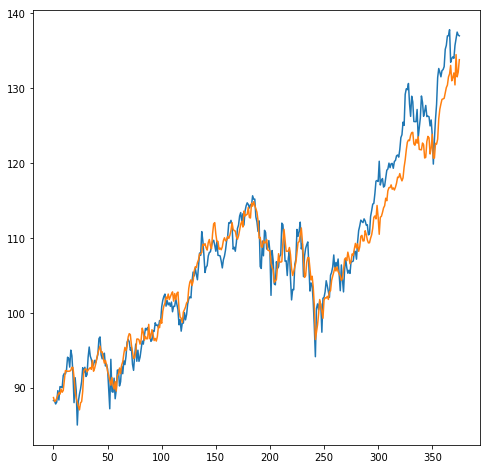

In [30]:
x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)


print(arr[idx])
reg = AdaBoostRegressor(NuSVR(nu = arr[idx,3][0][0], kernel='rbf', max_iter=-1, gamma= arr[idx,2][0][0], C = arr[idx,1][0][0]),
    n_estimators = int(arr[idx,0][0][0]))
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_train, reg.predict(x_train)))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

1.0
0.5657894736842105


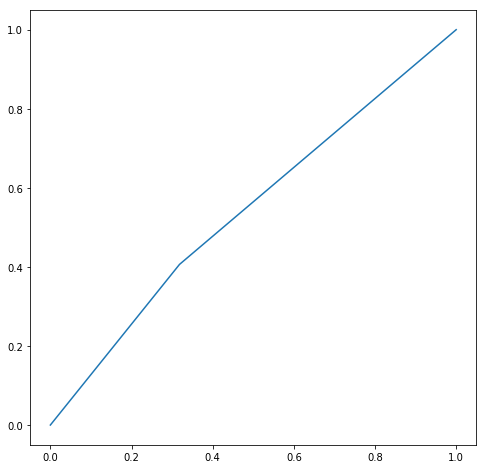

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = AdaBoostClassifier(tree.DecisionTreeClassifier(),
                         n_estimators = 500)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)

0.999999983772465
-6.422430328143859


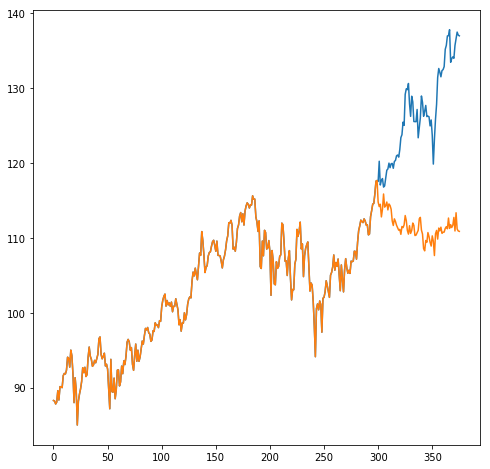

In [31]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = GradientBoostingRegressor(n_estimators = 1000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

0.9942020780419323
-44.35662139220123
1673.8751714506918
-13.211374017770076
-13.211374017770076


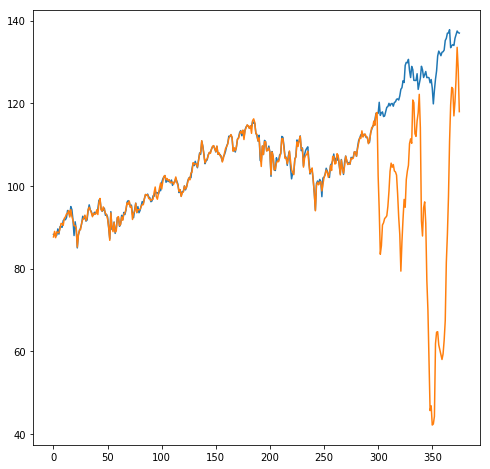

In [33]:
# Neural Network Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

reg = MLPRegressor(hidden_layer_sizes = (100,), activation = 'relu', 
                  solver = 'adam', alpha = 0.0001, batch_size = 'auto',
                  learning_rate = 'constant', max_iter = 10000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
print(mean_squared_error(y_test, reg.predict(x_test)))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, reg.predict(x_test), multioutput='variance_weighted'))


plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

0.5533333333333333
0.40789473684210525


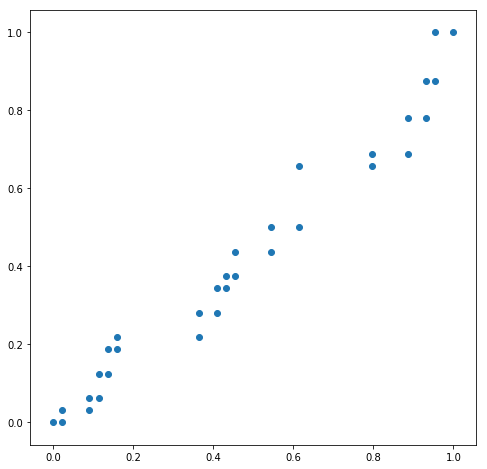

In [34]:
# Neural Network Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier

#x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

cls = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu', 
                  solver = 'adam', alpha = 0.0001, batch_size = 'auto',
                  learning_rate = 'constant', max_iter = 10000, early_stopping = True)
cls.fit(x_train, np.ravel(y_train))
print(cls.score(x_train, y_train))
print(cls.score(x_test, y_test))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, cls.predict_proba(x_test)[:,1])
plt.scatter(fpr, tpr)

In [34]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
tf.enable_eager_execution
print(tf.__version__)
from sklearn.metrics import r2_score

1.14.0


Finished training
0.6689119979379679
-11.266976367120941
452.7098037603553
-6.467046098554523
-6.467046098554523


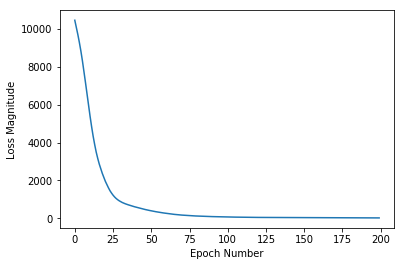

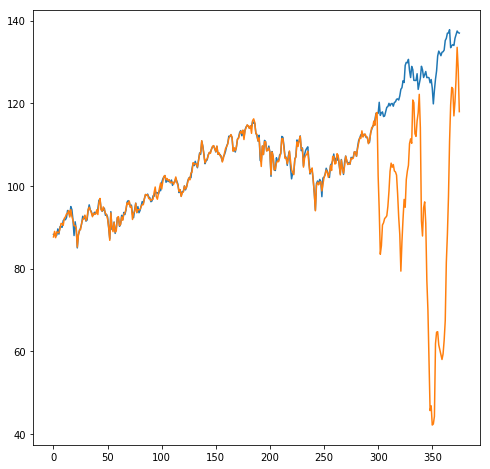

In [35]:
from sklearn.metrics import r2_score

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_close, False)

# Build basic sequential neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=88, input_shape=[87], activation=tf.nn.relu),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs = 200, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

# Print training MSE and test MSE, plot results

print(r2_score(y_train, model.predict(x_train)))
print(r2_score(y_test, model.predict(x_test)))
print(mean_squared_error(y_test, model.predict(x_test)))
print(explained_variance_score(y_test, model.predict(x_test), multioutput='uniform_average'))
print(explained_variance_score(y_test, model.predict(x_test), multioutput='variance_weighted'))

plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), reg.predict(x))

Finished training
1.0
0.5526315789473685


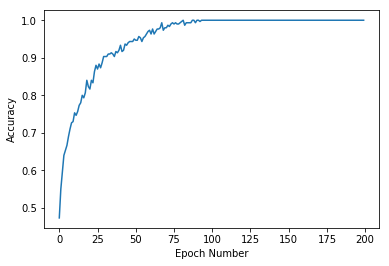

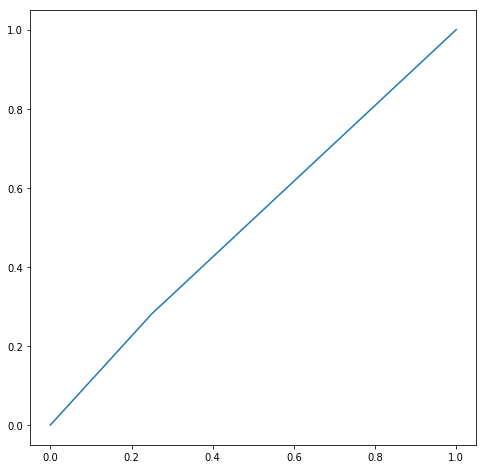

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

# Build basic sequential neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=88, input_shape=[87], activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs = 200, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'])

# Print training acc and test acc, plot results
y_train_probs = model.predict(x_train)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)

Finished training
1.0
0.4605263157894737


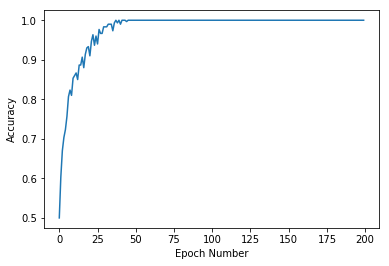

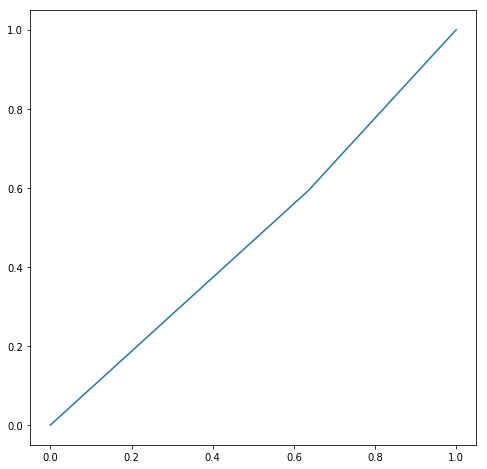

In [38]:
x, x_train, x_test, y_train, y_test = splitData(x_unscaled, y_classifier, False)

# Add a hidden layer to neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=88, input_shape=[87], activation=tf.nn.relu),
    tf.keras.layers.Dense(units=32, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs = 200, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'])

# Print training acc and test acc, plot results

y_train_probs = model.predict(x_train)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)

Finished training
1.0
0.5555555555555556
0.6


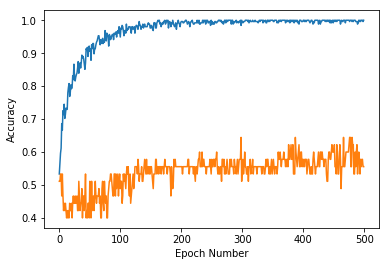

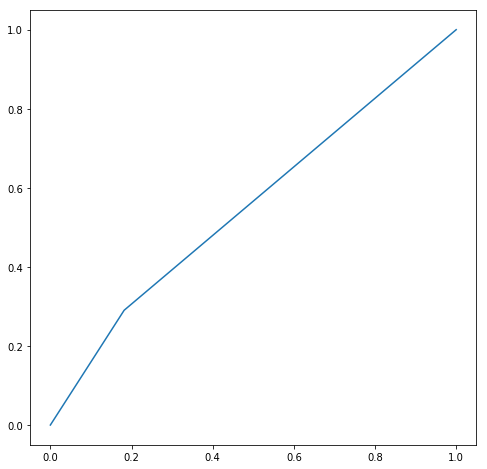

In [39]:
x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_classifier, True)

# Our model is over-fitting, add a validation set and dropout
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=88, input_shape=[87], activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.125),
    tf.keras.layers.Dense(units=2, activation = 'softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, 
                    validation_data = (x_val, y_val),
                    epochs = 500, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'], label = 'Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')

# Print training acc, validation acc, and test acc, plot results

y_train_probs = model.predict(x_train)
y_val_probs = model.predict(x_val)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_val_preds = [1*(temp[1]>=temp[0]) for temp in y_val_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)

Train on 255 samples, validate on 45 samples
Epoch 1/500
255/255 [==============================] - 1s 3ms/sample - loss: 10265.3326 - val_loss: 10133.1499
Epoch 2/500
255/255 [==============================] - 0s 242us/sample - loss: 9293.5722 - val_loss: 8832.3498
Epoch 3/500
255/255 [==============================] - 0s 262us/sample - loss: 7104.7084 - val_loss: 6031.6745
Epoch 4/500
255/255 [==============================] - 0s 221us/sample - loss: 3250.1609 - val_loss: 1758.6293
Epoch 5/500
255/255 [==============================] - 0s 241us/sample - loss: 813.3990 - val_loss: 319.5908
Epoch 6/500
255/255 [==============================] - 0s 266us/sample - loss: 902.3499 - val_loss: 526.2952
Epoch 7/500
255/255 [==============================] - 0s 254us/sample - loss: 459.8353 - val_loss: 1022.7525
Epoch 8/500
255/255 [==============================] - 0s 315us/sample - loss: 482.5236 - val_loss: 645.0760
Epoch 9/500
255/255 [==============================] - 0s 332us/sample - l

Epoch 75/500
255/255 [==============================] - 0s 235us/sample - loss: 150.5908 - val_loss: 243.3395
Epoch 76/500
255/255 [==============================] - 0s 235us/sample - loss: 167.8916 - val_loss: 304.2881
Epoch 77/500
255/255 [==============================] - 0s 199us/sample - loss: 159.4080 - val_loss: 194.5878
Epoch 78/500
255/255 [==============================] - 0s 201us/sample - loss: 163.6708 - val_loss: 317.0157
Epoch 79/500
255/255 [==============================] - 0s 231us/sample - loss: 193.6775 - val_loss: 115.8803
Epoch 80/500
255/255 [==============================] - 0s 230us/sample - loss: 177.7975 - val_loss: 222.4780
Epoch 81/500
255/255 [==============================] - 0s 231us/sample - loss: 157.2760 - val_loss: 213.8579
Epoch 82/500
255/255 [==============================] - 0s 219us/sample - loss: 188.3728 - val_loss: 217.9124
Epoch 83/500
255/255 [==============================] - 0s 205us/sample - loss: 171.7356 - val_loss: 332.2741
Epoch 84/5

255/255 [==============================] - 0s 239us/sample - loss: 119.5539 - val_loss: 68.9366
Epoch 150/500
255/255 [==============================] - 0s 223us/sample - loss: 129.7106 - val_loss: 130.1877
Epoch 151/500
255/255 [==============================] - 0s 227us/sample - loss: 115.2019 - val_loss: 116.9572
Epoch 152/500
255/255 [==============================] - 0s 231us/sample - loss: 146.5403 - val_loss: 52.8163
Epoch 153/500
255/255 [==============================] - 0s 237us/sample - loss: 140.9661 - val_loss: 67.1813
Epoch 154/500
255/255 [==============================] - 0s 253us/sample - loss: 119.2368 - val_loss: 144.9083
Epoch 155/500
255/255 [==============================] - 0s 278us/sample - loss: 114.9497 - val_loss: 67.5877
Epoch 156/500
255/255 [==============================] - 0s 282us/sample - loss: 141.7287 - val_loss: 93.0469
Epoch 157/500
255/255 [==============================] - 0s 235us/sample - loss: 128.6102 - val_loss: 108.1479
Epoch 158/500
255/25

255/255 [==============================] - 0s 227us/sample - loss: 104.2988 - val_loss: 43.2573
Epoch 224/500
255/255 [==============================] - 0s 227us/sample - loss: 118.2772 - val_loss: 77.0306
Epoch 225/500
255/255 [==============================] - 0s 223us/sample - loss: 120.8133 - val_loss: 59.0507
Epoch 226/500
255/255 [==============================] - 0s 227us/sample - loss: 110.6693 - val_loss: 58.0910
Epoch 227/500
255/255 [==============================] - 0s 228us/sample - loss: 115.1544 - val_loss: 101.6033
Epoch 228/500
255/255 [==============================] - 0s 227us/sample - loss: 107.7766 - val_loss: 44.1450
Epoch 229/500
255/255 [==============================] - 0s 227us/sample - loss: 97.9625 - val_loss: 33.5283
Epoch 230/500
255/255 [==============================] - 0s 235us/sample - loss: 104.9626 - val_loss: 78.4402
Epoch 231/500
255/255 [==============================] - 0s 231us/sample - loss: 138.4669 - val_loss: 37.3402
Epoch 232/500
255/255 [=

255/255 [==============================] - 0s 227us/sample - loss: 136.3609 - val_loss: 12.9127
Epoch 298/500
255/255 [==============================] - 0s 236us/sample - loss: 122.2039 - val_loss: 25.1857
Epoch 299/500
255/255 [==============================] - 0s 231us/sample - loss: 125.0638 - val_loss: 44.4097
Epoch 300/500
255/255 [==============================] - 0s 227us/sample - loss: 117.0668 - val_loss: 26.8105
Epoch 301/500
255/255 [==============================] - 0s 239us/sample - loss: 107.9911 - val_loss: 47.8464
Epoch 302/500
255/255 [==============================] - 0s 232us/sample - loss: 110.8056 - val_loss: 13.2869
Epoch 303/500
255/255 [==============================] - 0s 231us/sample - loss: 127.3078 - val_loss: 34.0836
Epoch 304/500
255/255 [==============================] - 0s 227us/sample - loss: 120.1752 - val_loss: 55.5984
Epoch 305/500
255/255 [==============================] - 0s 227us/sample - loss: 98.8168 - val_loss: 24.8475
Epoch 306/500
255/255 [==

255/255 [==============================] - 0s 258us/sample - loss: 115.4861 - val_loss: 32.3874
Epoch 372/500
255/255 [==============================] - 0s 250us/sample - loss: 112.1478 - val_loss: 34.0810
Epoch 373/500
255/255 [==============================] - 0s 242us/sample - loss: 119.1006 - val_loss: 22.5460
Epoch 374/500
255/255 [==============================] - 0s 235us/sample - loss: 116.5466 - val_loss: 11.3910
Epoch 375/500
255/255 [==============================] - 0s 266us/sample - loss: 131.4735 - val_loss: 84.6912
Epoch 376/500
255/255 [==============================] - 0s 246us/sample - loss: 128.1846 - val_loss: 23.0302
Epoch 377/500
255/255 [==============================] - 0s 219us/sample - loss: 132.0950 - val_loss: 11.8117
Epoch 378/500
255/255 [==============================] - 0s 227us/sample - loss: 107.2632 - val_loss: 40.1228
Epoch 379/500
255/255 [==============================] - 0s 227us/sample - loss: 116.7369 - val_loss: 11.0671
Epoch 380/500
255/255 [=

Epoch 446/500
255/255 [==============================] - 0s 235us/sample - loss: 109.4893 - val_loss: 34.3815
Epoch 447/500
255/255 [==============================] - 0s 231us/sample - loss: 108.0354 - val_loss: 9.3365
Epoch 448/500
255/255 [==============================] - 0s 262us/sample - loss: 125.7839 - val_loss: 31.5416
Epoch 449/500
255/255 [==============================] - 0s 258us/sample - loss: 107.1039 - val_loss: 40.4326
Epoch 450/500
255/255 [==============================] - 0s 271us/sample - loss: 112.8816 - val_loss: 13.9162
Epoch 451/500
255/255 [==============================] - 0s 231us/sample - loss: 117.4478 - val_loss: 17.8494
Epoch 452/500
255/255 [==============================] - 0s 223us/sample - loss: 110.9845 - val_loss: 29.4142
Epoch 453/500
255/255 [==============================] - 0s 231us/sample - loss: 125.4218 - val_loss: 36.6630
Epoch 454/500
255/255 [==============================] - 0s 241us/sample - loss: 94.0686 - val_loss: 27.2597
Epoch 455/50

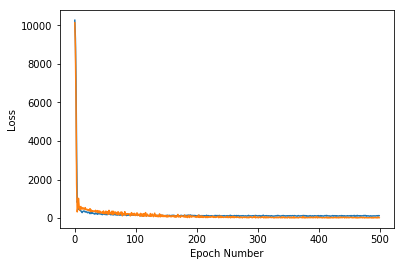

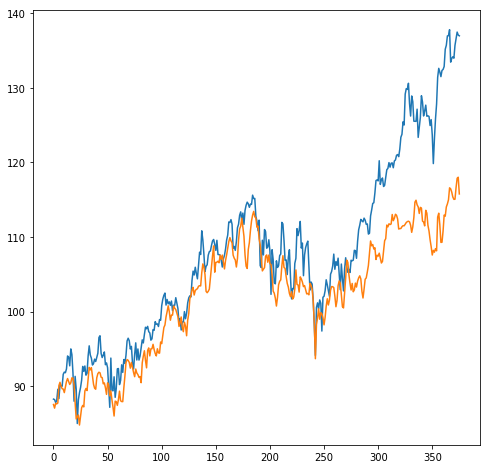

In [50]:
# CNN Regression

x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_close, True)

x_train = np.expand_dims(x_train, axis = 2)
x_val = np.expand_dims(x_val, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
x = np.expand_dims(x, axis = 2)

# Our model is struggling, let's try a CNN
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(87, 1), stddev = 0.5),
    tf.keras.layers.Conv1D(filters=24, kernel_size=3, activation = 'relu', padding = 'causal'),
    tf.keras.layers.MaxPooling1D(pool_size = 2, padding = 'same'),
    tf.keras.layers.Conv1D(filters=48, kernel_size=3, activation = 'relu', padding = 'causal'),
    tf.keras.layers.MaxPooling1D(pool_size = 2, padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 88, activation = 'relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units = 1)
])

# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size = 32, verbose = 1,
                    validation_data = (x_val, y_val), epochs = 500)
print('Finished training')
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
# Print training acc, validation acc, and test acc, plot results

print(r2_score(y_train, model.predict(x_train)))
print(r2_score(y_val, model.predict(x_val)))
print(r2_score(y_test, model.predict(x_test)))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), model.predict(x))

In [51]:
print(mean_squared_error(y_test, model.predict(x_test)))
print(explained_variance_score(y_test, model.predict(x_test)))

238.493864403976
0.36994311430601534


Finished training
1.0
0.5111111111111111
0.6133333333333333


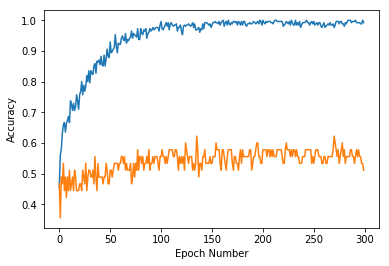

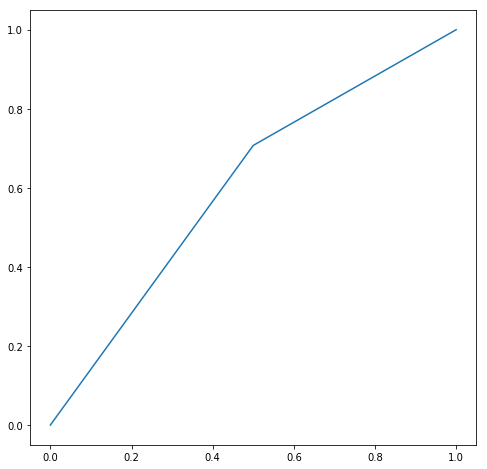

In [75]:
# CNN Classifier
x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_classifier, True)

x_train = np.expand_dims(x_train, axis = 2)
x_val = np.expand_dims(x_val, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
x = np.expand_dims(x, axis = 2)

# Our model is struggling, let's try a CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=12, kernel_size=3, activation = 'relu',
                          input_shape=(87, 1), padding = 'causal'),
    tf.keras.layers.MaxPooling1D(pool_size = 2, padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 88, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 2, activation = 'softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, 
                    validation_data = (x_val, y_val),
                    epochs = 300, verbose = False)
print('Finished training')

# Display loss as a function of time
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'], label = 'Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')

# Print training acc, validation acc, and test acc, plot results

y_train_probs = model.predict(x_train)
y_val_probs = model.predict(x_val)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_val_preds = [1*(temp[1]>=temp[0]) for temp in y_val_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)

Train on 255 samples, validate on 45 samples
Epoch 1/30000
255/255 [==============================] - 6s 24ms/sample - loss: 10515.0758 - val_loss: 10697.7490
Epoch 2/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10498.1368 - val_loss: 10676.3672
Epoch 3/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10467.9962 - val_loss: 10632.6289
Epoch 4/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10393.8714 - val_loss: 10465.1826
Epoch 5/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10137.3009 - val_loss: 9956.8281
Epoch 6/30000
255/255 [==============================] - 1s 3ms/sample - loss: 9678.3231 - val_loss: 9548.3711
Epoch 7/30000
255/255 [==============================] - 1s 4ms/sample - loss: 9356.6631 - val_loss: 9327.6299
Epoch 8/30000
255/255 [==============================] - 1s 4ms/sample - loss: 9084.0120 - val_loss: 9098.4551
Epoch 9/30000
255/255 [==============================] - 

255/255 [==============================] - 1s 3ms/sample - loss: 5002.1611 - val_loss: 5111.3008
Epoch 74/30000
255/255 [==============================] - 1s 3ms/sample - loss: 4963.7773 - val_loss: 5072.6558
Epoch 75/30000
255/255 [==============================] - 1s 3ms/sample - loss: 4925.7745 - val_loss: 5034.2485
Epoch 76/30000
255/255 [==============================] - 1s 3ms/sample - loss: 4887.9207 - val_loss: 4996.1240
Epoch 77/30000
255/255 [==============================] - 1s 3ms/sample - loss: 4850.3443 - val_loss: 4958.2285
Epoch 78/30000
255/255 [==============================] - 1s 3ms/sample - loss: 4813.5170 - val_loss: 4920.6089
Epoch 79/30000
255/255 [==============================] - 1s 3ms/sample - loss: 4775.8761 - val_loss: 4883.2183
Epoch 80/30000
255/255 [==============================] - 1s 3ms/sample - loss: 4739.4711 - val_loss: 4846.0581
Epoch 81/30000
255/255 [==============================] - 1s 3ms/sample - loss: 4702.5498 - val_loss: 4809.1265
Epoch 8

Epoch 146/30000
255/255 [==============================] - 1s 3ms/sample - loss: 2772.8455 - val_loss: 2859.2063
Epoch 147/30000
255/255 [==============================] - 1s 3ms/sample - loss: 2749.2280 - val_loss: 2835.2732
Epoch 148/30000
255/255 [==============================] - 1s 3ms/sample - loss: 2725.6064 - val_loss: 2811.5408
Epoch 149/30000
255/255 [==============================] - 1s 3ms/sample - loss: 2702.3714 - val_loss: 2787.9448
Epoch 150/30000
255/255 [==============================] - 1s 2ms/sample - loss: 2679.4025 - val_loss: 2764.4460
Epoch 151/30000
255/255 [==============================] - 1s 3ms/sample - loss: 2656.2118 - val_loss: 2741.1787
Epoch 152/30000
255/255 [==============================] - 1s 3ms/sample - loss: 2633.3172 - val_loss: 2718.1001
Epoch 153/30000
255/255 [==============================] - 1s 3ms/sample - loss: 2610.7870 - val_loss: 2695.1287
Epoch 154/30000
255/255 [==============================] - 1s 3ms/sample - loss: 2588.3057 - val

255/255 [==============================] - ETA: 0s - loss: 1446.85 - 1s 2ms/sample - loss: 1440.7923 - val_loss: 1506.5560
Epoch 219/30000
255/255 [==============================] - 1s 3ms/sample - loss: 1427.0118 - val_loss: 1492.4224
Epoch 220/30000
255/255 [==============================] - 1s 3ms/sample - loss: 1413.2436 - val_loss: 1478.4174
Epoch 221/30000
255/255 [==============================] - 1s 2ms/sample - loss: 1398.9929 - val_loss: 1464.5375
Epoch 222/30000
255/255 [==============================] - 1s 2ms/sample - loss: 1386.6162 - val_loss: 1450.7389
Epoch 223/30000
255/255 [==============================] - 1s 3ms/sample - loss: 1372.6610 - val_loss: 1437.0363
Epoch 224/30000
255/255 [==============================] - 1s 2ms/sample - loss: 1358.9011 - val_loss: 1423.4825
Epoch 225/30000
255/255 [==============================] - 1s 2ms/sample - loss: 1345.5431 - val_loss: 1410.0052
Epoch 226/30000
255/255 [==============================] - 1s 3ms/sample - loss: 1333.

Epoch 291/30000
255/255 [==============================] - 1s 3ms/sample - loss: 648.6871 - val_loss: 696.4355
Epoch 292/30000
255/255 [==============================] - 1s 3ms/sample - loss: 641.4265 - val_loss: 688.7120
Epoch 293/30000
255/255 [==============================] - 1s 2ms/sample - loss: 633.9266 - val_loss: 680.8142
Epoch 294/30000
255/255 [==============================] - 1s 3ms/sample - loss: 626.1307 - val_loss: 672.3474
Epoch 295/30000
255/255 [==============================] - 1s 3ms/sample - loss: 617.5452 - val_loss: 662.5286
Epoch 296/30000
255/255 [==============================] - 1s 3ms/sample - loss: 607.6392 - val_loss: 651.9466
Epoch 297/30000
255/255 [==============================] - 1s 3ms/sample - loss: 598.0145 - val_loss: 643.3983
Epoch 298/30000
255/255 [==============================] - 1s 3ms/sample - loss: 590.2114 - val_loss: 635.7026
Epoch 299/30000
255/255 [==============================] - 1s 3ms/sample - loss: 582.8379 - val_loss: 628.0329
E

255/255 [==============================] - 1s 3ms/sample - loss: 262.7936 - val_loss: 295.6183
Epoch 365/30000
255/255 [==============================] - 1s 2ms/sample - loss: 259.7149 - val_loss: 292.3318
Epoch 366/30000
255/255 [==============================] - 1s 3ms/sample - loss: 256.6446 - val_loss: 289.0929
Epoch 367/30000
255/255 [==============================] - 1s 3ms/sample - loss: 253.5933 - val_loss: 285.9016
Epoch 368/30000
255/255 [==============================] - 1s 3ms/sample - loss: 250.5680 - val_loss: 282.7652
Epoch 369/30000
255/255 [==============================] - 1s 3ms/sample - loss: 247.6578 - val_loss: 279.6594
Epoch 370/30000
255/255 [==============================] - 1s 3ms/sample - loss: 244.7531 - val_loss: 276.5839
Epoch 371/30000
255/255 [==============================] - 1s 3ms/sample - loss: 241.8727 - val_loss: 273.5517
Epoch 372/30000
255/255 [==============================] - 1s 3ms/sample - loss: 239.0925 - val_loss: 270.5364
Epoch 373/30000
2

255/255 [==============================] - 1s 3ms/sample - loss: 119.0244 - val_loss: 141.6914
Epoch 438/30000
255/255 [==============================] - 1s 3ms/sample - loss: 117.9190 - val_loss: 140.4924
Epoch 439/30000
255/255 [==============================] - 1s 3ms/sample - loss: 116.8775 - val_loss: 139.2973
Epoch 440/30000
255/255 [==============================] - 1s 3ms/sample - loss: 115.7934 - val_loss: 138.1293
Epoch 441/30000
255/255 [==============================] - 1s 3ms/sample - loss: 114.7504 - val_loss: 136.9853
Epoch 442/30000
255/255 [==============================] - 1s 3ms/sample - loss: 113.7194 - val_loss: 135.8573
Epoch 443/30000
255/255 [==============================] - 1s 3ms/sample - loss: 112.7531 - val_loss: 134.7308
Epoch 444/30000
255/255 [==============================] - 1s 3ms/sample - loss: 111.7437 - val_loss: 133.6275
Epoch 445/30000
255/255 [==============================] - 1s 3ms/sample - loss: 110.7538 - val_loss: 132.5455
Epoch 446/30000
2

255/255 [==============================] - 1s 2ms/sample - loss: 72.1633 - val_loss: 88.2610
Epoch 512/30000
255/255 [==============================] - 1s 3ms/sample - loss: 71.8569 - val_loss: 87.8937
Epoch 513/30000
255/255 [==============================] - 1s 3ms/sample - loss: 71.5608 - val_loss: 87.5309
Epoch 514/30000
255/255 [==============================] - 1s 2ms/sample - loss: 71.2858 - val_loss: 87.1651
Epoch 515/30000
255/255 [==============================] - 1s 2ms/sample - loss: 70.8645 - val_loss: 86.8109
Epoch 516/30000
255/255 [==============================] - 1s 2ms/sample - loss: 70.6836 - val_loss: 86.4736
Epoch 517/30000
255/255 [==============================] - 1s 2ms/sample - loss: 70.4285 - val_loss: 86.1304
Epoch 518/30000
255/255 [==============================] - 1s 3ms/sample - loss: 70.1665 - val_loss: 85.7906
Epoch 519/30000
255/255 [==============================] - 1s 2ms/sample - loss: 69.8851 - val_loss: 85.4630
Epoch 520/30000
255/255 [==========

255/255 [==============================] - 1s 2ms/sample - loss: 60.2945 - val_loss: 72.6721
Epoch 587/30000
255/255 [==============================] - 1s 2ms/sample - loss: 60.2206 - val_loss: 72.5780
Epoch 588/30000
255/255 [==============================] - 1s 2ms/sample - loss: 60.1705 - val_loss: 72.4847
Epoch 589/30000
255/255 [==============================] - 1s 2ms/sample - loss: 60.1144 - val_loss: 72.3871
Epoch 590/30000
255/255 [==============================] - 1s 2ms/sample - loss: 60.0480 - val_loss: 72.2932
Epoch 591/30000
255/255 [==============================] - 1s 2ms/sample - loss: 59.9924 - val_loss: 72.2013
Epoch 592/30000
255/255 [==============================] - 1s 2ms/sample - loss: 59.9308 - val_loss: 72.1130
Epoch 593/30000
255/255 [==============================] - 1s 2ms/sample - loss: 59.9491 - val_loss: 72.0280
Epoch 594/30000
255/255 [==============================] - 1s 2ms/sample - loss: 59.8686 - val_loss: 71.9447
Epoch 595/30000
255/255 [==========

255/255 [==============================] - 1s 2ms/sample - loss: 58.0922 - val_loss: 68.7104
Epoch 662/30000
255/255 [==============================] - 1s 2ms/sample - loss: 58.0813 - val_loss: 68.6834
Epoch 663/30000
255/255 [==============================] - 1s 2ms/sample - loss: 58.0643 - val_loss: 68.6631
Epoch 664/30000
255/255 [==============================] - 1s 2ms/sample - loss: 58.0584 - val_loss: 68.6419
Epoch 665/30000
255/255 [==============================] - 1s 2ms/sample - loss: 58.0550 - val_loss: 68.6145
Epoch 666/30000
255/255 [==============================] - 1s 2ms/sample - loss: 58.0426 - val_loss: 68.5915
Epoch 667/30000
255/255 [==============================] - 1s 2ms/sample - loss: 58.0324 - val_loss: 68.5700
Epoch 668/30000
255/255 [==============================] - 1s 2ms/sample - loss: 58.0225 - val_loss: 68.5510
Epoch 669/30000
255/255 [==============================] - 0s 2ms/sample - loss: 58.0145 - val_loss: 68.5339
Epoch 670/30000
255/255 [==========

255/255 [==============================] - 1s 3ms/sample - loss: 57.7929 - val_loss: 67.7243
Epoch 737/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7902 - val_loss: 67.7195
Epoch 738/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7906 - val_loss: 67.7144
Epoch 739/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7934 - val_loss: 67.7073
Epoch 740/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7830 - val_loss: 67.7028
Epoch 741/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7891 - val_loss: 67.6976
Epoch 742/30000
255/255 [==============================] - 1s 3ms/sample - loss: 58.0345 - val_loss: 67.6905
Epoch 743/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7989 - val_loss: 67.6837
Epoch 744/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.8001 - val_loss: 67.6801
Epoch 745/30000
255/255 [==========

255/255 [==============================] - 1s 2ms/sample - loss: 57.7671 - val_loss: 67.4780
Epoch 812/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7605 - val_loss: 67.4753
Epoch 813/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7672 - val_loss: 67.4747
Epoch 814/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7646 - val_loss: 67.4725
Epoch 815/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7667 - val_loss: 67.4718
Epoch 816/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7581 - val_loss: 67.4687
Epoch 817/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7678 - val_loss: 67.4675
Epoch 818/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7720 - val_loss: 67.4701
Epoch 819/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7717 - val_loss: 67.4657
Epoch 820/30000
255/255 [==========

255/255 [==============================] - 1s 2ms/sample - loss: 57.7655 - val_loss: 67.4161
Epoch 887/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7656 - val_loss: 67.4153
Epoch 888/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7595 - val_loss: 67.4115
Epoch 889/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7581 - val_loss: 67.4094
Epoch 890/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7660 - val_loss: 67.4089
Epoch 891/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7660 - val_loss: 67.4096
Epoch 892/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7665 - val_loss: 67.4098
Epoch 893/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7684 - val_loss: 67.4056
Epoch 894/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7656 - val_loss: 67.4071
Epoch 895/30000
255/255 [==========

255/255 [==============================] - 1s 2ms/sample - loss: 57.7624 - val_loss: 67.4072
Epoch 962/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7657 - val_loss: 67.4059
Epoch 963/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7659 - val_loss: 67.4058
Epoch 964/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7674 - val_loss: 67.4072
Epoch 965/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7728 - val_loss: 67.4083
Epoch 966/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7646 - val_loss: 67.4055
Epoch 967/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7665 - val_loss: 67.4059
Epoch 968/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7658 - val_loss: 67.4056
Epoch 969/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7483 - val_loss: 67.4095
Epoch 970/30000
255/255 [==========

Epoch 1036/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7665 - val_loss: 67.4050
Epoch 1037/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7752 - val_loss: 67.4052
Epoch 1038/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7669 - val_loss: 67.4021
Epoch 1039/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7665 - val_loss: 67.4063
Epoch 1040/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7668 - val_loss: 67.4089
Epoch 1041/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7668 - val_loss: 67.4104
Epoch 1042/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7501 - val_loss: 67.4081
Epoch 1043/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7688 - val_loss: 67.4046
Epoch 1044/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7658 - val_loss: 67.4047
Epoch 1045

255/255 [==============================] - 1s 2ms/sample - loss: 57.7774 - val_loss: 67.4070
Epoch 1111/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7655 - val_loss: 67.4087
Epoch 1112/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7821 - val_loss: 67.4129
Epoch 1113/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7658 - val_loss: 67.4121
Epoch 1114/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7686 - val_loss: 67.4139
Epoch 1115/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7680 - val_loss: 67.4145
Epoch 1116/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7905 - val_loss: 67.4174
Epoch 1117/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7654 - val_loss: 67.4152
Epoch 1118/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7671 - val_loss: 67.4117
Epoch 1119/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 57.7658 - val_loss: 67.4158
Epoch 1185/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7659 - val_loss: 67.4136
Epoch 1186/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7659 - val_loss: 67.4165
Epoch 1187/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7654 - val_loss: 67.4149
Epoch 1188/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7644 - val_loss: 67.4141
Epoch 1189/30000
255/255 [==============================] - 1s 3ms/sample - loss: 57.7566 - val_loss: 67.4149
Epoch 1190/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7681 - val_loss: 67.4064
Epoch 1191/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7620 - val_loss: 67.4057
Epoch 1192/30000
255/255 [==============================] - 1s 2ms/sample - loss: 57.7672 - val_loss: 67.3916
Epoch 1193/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 53.8047 - val_loss: 62.2407
Epoch 1259/30000
255/255 [==============================] - 1s 3ms/sample - loss: 53.9800 - val_loss: 62.6091
Epoch 1260/30000
255/255 [==============================] - 1s 3ms/sample - loss: 53.1762 - val_loss: 62.6523
Epoch 1261/30000
255/255 [==============================] - 1s 2ms/sample - loss: 53.3578 - val_loss: 62.6057
Epoch 1262/30000
255/255 [==============================] - 1s 2ms/sample - loss: 52.7249 - val_loss: 60.9597
Epoch 1263/30000
255/255 [==============================] - 1s 2ms/sample - loss: 53.5776 - val_loss: 58.8014
Epoch 1264/30000
255/255 [==============================] - 1s 2ms/sample - loss: 52.3255 - val_loss: 58.3496
Epoch 1265/30000
255/255 [==============================] - 1s 2ms/sample - loss: 51.4207 - val_loss: 57.6307
Epoch 1266/30000
255/255 [==============================] - 1s 2ms/sample - loss: 49.5306 - val_loss: 56.4267
Epoch 1267/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 48.0682 - val_loss: 54.0351
Epoch 1333/30000
255/255 [==============================] - 1s 2ms/sample - loss: 49.0858 - val_loss: 53.3354
Epoch 1334/30000
255/255 [==============================] - 1s 2ms/sample - loss: 48.1307 - val_loss: 51.6966
Epoch 1335/30000
255/255 [==============================] - 1s 2ms/sample - loss: 48.8112 - val_loss: 52.1396
Epoch 1336/30000
255/255 [==============================] - 1s 3ms/sample - loss: 50.1497 - val_loss: 53.2995
Epoch 1337/30000
255/255 [==============================] - 1s 2ms/sample - loss: 48.4797 - val_loss: 52.9164
Epoch 1338/30000
255/255 [==============================] - 1s 2ms/sample - loss: 48.2177 - val_loss: 50.8708
Epoch 1339/30000
255/255 [==============================] - 1s 2ms/sample - loss: 48.1574 - val_loss: 50.1092
Epoch 1340/30000
255/255 [==============================] - 1s 3ms/sample - loss: 47.8697 - val_loss: 51.2678
Epoch 1341/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 37.0507 - val_loss: 38.8851
Epoch 1407/30000
255/255 [==============================] - 1s 2ms/sample - loss: 37.5780 - val_loss: 39.1214
Epoch 1408/30000
255/255 [==============================] - 1s 2ms/sample - loss: 36.1264 - val_loss: 36.3696
Epoch 1409/30000
255/255 [==============================] - 1s 2ms/sample - loss: 40.7163 - val_loss: 36.7569
Epoch 1410/30000
255/255 [==============================] - 1s 2ms/sample - loss: 39.1737 - val_loss: 38.2029
Epoch 1411/30000
255/255 [==============================] - 1s 2ms/sample - loss: 37.6376 - val_loss: 39.7134
Epoch 1412/30000
255/255 [==============================] - 1s 2ms/sample - loss: 33.1597 - val_loss: 39.2445
Epoch 1413/30000
255/255 [==============================] - 1s 2ms/sample - loss: 34.1688 - val_loss: 37.0597
Epoch 1414/30000
255/255 [==============================] - 1s 2ms/sample - loss: 36.1795 - val_loss: 36.2503
Epoch 1415/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 30.0082 - val_loss: 29.4842
Epoch 1481/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.4062 - val_loss: 29.6259
Epoch 1482/30000
255/255 [==============================] - 1s 2ms/sample - loss: 32.4008 - val_loss: 34.2885
Epoch 1483/30000
255/255 [==============================] - 1s 2ms/sample - loss: 37.2723 - val_loss: 41.9520
Epoch 1484/30000
255/255 [==============================] - 1s 2ms/sample - loss: 34.1911 - val_loss: 35.7959
Epoch 1485/30000
255/255 [==============================] - 1s 2ms/sample - loss: 32.2255 - val_loss: 32.6781
Epoch 1486/30000
255/255 [==============================] - 1s 2ms/sample - loss: 32.1117 - val_loss: 31.0772
Epoch 1487/30000
255/255 [==============================] - 1s 2ms/sample - loss: 30.2934 - val_loss: 30.4991
Epoch 1488/30000
255/255 [==============================] - 1s 2ms/sample - loss: 26.5445 - val_loss: 30.0509
Epoch 1489/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 29.3005 - val_loss: 29.4909
Epoch 1555/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.5853 - val_loss: 30.9718
Epoch 1556/30000
255/255 [==============================] - 1s 2ms/sample - loss: 31.0705 - val_loss: 29.3821
Epoch 1557/30000
255/255 [==============================] - 1s 2ms/sample - loss: 31.7123 - val_loss: 33.2122
Epoch 1558/30000
255/255 [==============================] - 1s 2ms/sample - loss: 33.0829 - val_loss: 32.8003
Epoch 1559/30000
255/255 [==============================] - 1s 2ms/sample - loss: 29.8122 - val_loss: 31.9435
Epoch 1560/30000
255/255 [==============================] - 1s 2ms/sample - loss: 29.6460 - val_loss: 31.0954
Epoch 1561/30000
255/255 [==============================] - 1s 2ms/sample - loss: 26.5016 - val_loss: 31.3813
Epoch 1562/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.8668 - val_loss: 31.9684
Epoch 1563/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 85.2412 - val_loss: 28.7155
Epoch 1629/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.1265 - val_loss: 28.9815
Epoch 1630/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.5475 - val_loss: 28.7984
Epoch 1631/30000
255/255 [==============================] - 1s 2ms/sample - loss: 31.6491 - val_loss: 28.1745
Epoch 1632/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.6901 - val_loss: 28.2108
Epoch 1633/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.8177 - val_loss: 27.8249
Epoch 1634/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.4431 - val_loss: 30.1382
Epoch 1635/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.6030 - val_loss: 28.8722
Epoch 1636/30000
255/255 [==============================] - 1s 2ms/sample - loss: 26.9003 - val_loss: 28.3331
Epoch 1637/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 27.1640 - val_loss: 30.6282
Epoch 1703/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.8920 - val_loss: 31.1176
Epoch 1704/30000
255/255 [==============================] - 1s 2ms/sample - loss: 31.1461 - val_loss: 30.1161
Epoch 1705/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.9389 - val_loss: 31.4443
Epoch 1706/30000
255/255 [==============================] - 1s 2ms/sample - loss: 30.4654 - val_loss: 31.5594
Epoch 1707/30000
255/255 [==============================] - 1s 2ms/sample - loss: 30.4072 - val_loss: 29.4367
Epoch 1708/30000
255/255 [==============================] - 1s 3ms/sample - loss: 30.6111 - val_loss: 29.5211
Epoch 1709/30000
255/255 [==============================] - 1s 2ms/sample - loss: 29.7858 - val_loss: 30.0251
Epoch 1710/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.7780 - val_loss: 31.0236
Epoch 1711/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 29.4507 - val_loss: 28.6126
Epoch 1777/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.4313 - val_loss: 27.8327
Epoch 1778/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.9819 - val_loss: 27.7377
Epoch 1779/30000
255/255 [==============================] - 1s 3ms/sample - loss: 26.7822 - val_loss: 27.7505
Epoch 1780/30000
255/255 [==============================] - 1s 3ms/sample - loss: 27.6338 - val_loss: 27.8307
Epoch 1781/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.2110 - val_loss: 28.3893
Epoch 1782/30000
255/255 [==============================] - 1s 3ms/sample - loss: 25.7628 - val_loss: 28.2017
Epoch 1783/30000
255/255 [==============================] - 1s 3ms/sample - loss: 29.6704 - val_loss: 27.8582
Epoch 1784/30000
255/255 [==============================] - 1s 2ms/sample - loss: 30.1621 - val_loss: 28.9245
Epoch 1785/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 24.1691 - val_loss: 30.1036
Epoch 1851/30000
255/255 [==============================] - 1s 3ms/sample - loss: 25.8905 - val_loss: 29.8525
Epoch 1852/30000
255/255 [==============================] - 1s 2ms/sample - loss: 29.0089 - val_loss: 30.6149
Epoch 1853/30000
255/255 [==============================] - 1s 3ms/sample - loss: 26.3870 - val_loss: 30.0633
Epoch 1854/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.0125 - val_loss: 29.3415
Epoch 1855/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.1667 - val_loss: 28.3977
Epoch 1856/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.8056 - val_loss: 28.1661
Epoch 1857/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.4536 - val_loss: 28.1838
Epoch 1858/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.2650 - val_loss: 28.0892
Epoch 1859/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 27.5820 - val_loss: 28.0724
Epoch 1925/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.6982 - val_loss: 27.8144
Epoch 1926/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.3873 - val_loss: 27.7135
Epoch 1927/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.6120 - val_loss: 28.0588
Epoch 1928/30000
255/255 [==============================] - 1s 2ms/sample - loss: 26.4352 - val_loss: 27.6798
Epoch 1929/30000
255/255 [==============================] - 1s 3ms/sample - loss: 25.4640 - val_loss: 27.2461
Epoch 1930/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.0244 - val_loss: 26.9639
Epoch 1931/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.3142 - val_loss: 26.2120
Epoch 1932/30000
255/255 [==============================] - 1s 2ms/sample - loss: 26.0136 - val_loss: 26.8047
Epoch 1933/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 25.4969 - val_loss: 27.3887
Epoch 1999/30000
255/255 [==============================] - 1s 2ms/sample - loss: 26.2607 - val_loss: 27.1845
Epoch 2000/30000
255/255 [==============================] - 1s 2ms/sample - loss: 26.1784 - val_loss: 27.2525
Epoch 2001/30000
255/255 [==============================] - 1s 2ms/sample - loss: 26.9339 - val_loss: 26.9987
Epoch 2002/30000
255/255 [==============================] - 1s 2ms/sample - loss: 30.3939 - val_loss: 36.7619
Epoch 2003/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.2270 - val_loss: 31.2701
Epoch 2004/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.8622 - val_loss: 31.1870
Epoch 2005/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.5919 - val_loss: 30.5140
Epoch 2006/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.1459 - val_loss: 29.7078
Epoch 2007/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 23.0573 - val_loss: 27.2469
Epoch 2073/30000
255/255 [==============================] - 1s 2ms/sample - loss: 23.0574 - val_loss: 26.7080
Epoch 2074/30000
255/255 [==============================] - 1s 3ms/sample - loss: 25.8606 - val_loss: 28.3640
Epoch 2075/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.6895 - val_loss: 25.6553
Epoch 2076/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.5097 - val_loss: 26.2850
Epoch 2077/30000
255/255 [==============================] - 1s 3ms/sample - loss: 66.0314 - val_loss: 26.1466
Epoch 2078/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.8529 - val_loss: 28.9583
Epoch 2079/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.4043 - val_loss: 25.6399
Epoch 2080/30000
255/255 [==============================] - 1s 3ms/sample - loss: 27.0578 - val_loss: 25.3824
Epoch 2081/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 25.1553 - val_loss: 25.7010
Epoch 2147/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.9685 - val_loss: 27.2946
Epoch 2148/30000
255/255 [==============================] - 1s 2ms/sample - loss: 29.1815 - val_loss: 25.8554
Epoch 2149/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.0234 - val_loss: 27.8871
Epoch 2150/30000
255/255 [==============================] - 1s 2ms/sample - loss: 55.8791 - val_loss: 31.2381
Epoch 2151/30000
255/255 [==============================] - 1s 2ms/sample - loss: 37.0584 - val_loss: 27.8541
Epoch 2152/30000
255/255 [==============================] - 1s 2ms/sample - loss: 65.0749 - val_loss: 26.3237
Epoch 2153/30000
255/255 [==============================] - 1s 3ms/sample - loss: 27.8387 - val_loss: 25.8961
Epoch 2154/30000
255/255 [==============================] - 1s 3ms/sample - loss: 68.4828 - val_loss: 26.2659
Epoch 2155/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 35.3373 - val_loss: 34.3011
Epoch 2221/30000
255/255 [==============================] - 1s 2ms/sample - loss: 28.7770 - val_loss: 32.9422
Epoch 2222/30000
255/255 [==============================] - 1s 2ms/sample - loss: 33.3900 - val_loss: 34.0198
Epoch 2223/30000
255/255 [==============================] - 1s 2ms/sample - loss: 32.8582 - val_loss: 35.0234
Epoch 2224/30000
255/255 [==============================] - 1s 2ms/sample - loss: 31.0890 - val_loss: 33.5129
Epoch 2225/30000
255/255 [==============================] - 1s 2ms/sample - loss: 29.3133 - val_loss: 31.5326
Epoch 2226/30000
255/255 [==============================] - 1s 2ms/sample - loss: 29.5805 - val_loss: 30.7667
Epoch 2227/30000
255/255 [==============================] - 1s 3ms/sample - loss: 29.4831 - val_loss: 29.5939
Epoch 2228/30000
255/255 [==============================] - 1s 3ms/sample - loss: 30.6192 - val_loss: 29.4749
Epoch 2229/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 24.0327 - val_loss: 27.8423
Epoch 2295/30000
255/255 [==============================] - 1s 4ms/sample - loss: 24.8350 - val_loss: 27.4110
Epoch 2296/30000
255/255 [==============================] - 1s 3ms/sample - loss: 26.7486 - val_loss: 29.4582
Epoch 2297/30000
255/255 [==============================] - 1s 4ms/sample - loss: 27.5336 - val_loss: 27.4426
Epoch 2298/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.3303 - val_loss: 27.2933
Epoch 2299/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.6396 - val_loss: 28.6912
Epoch 2300/30000
255/255 [==============================] - 1s 4ms/sample - loss: 23.7068 - val_loss: 28.4764
Epoch 2301/30000
255/255 [==============================] - 1s 4ms/sample - loss: 27.1823 - val_loss: 28.6675
Epoch 2302/30000
255/255 [==============================] - 1s 4ms/sample - loss: 25.3736 - val_loss: 27.6602
Epoch 2303/30000
255/255 [=

255/255 [==============================] - 1s 4ms/sample - loss: 23.8687 - val_loss: 27.7835
Epoch 2369/30000
255/255 [==============================] - 1s 4ms/sample - loss: 23.7593 - val_loss: 26.5966
Epoch 2370/30000
255/255 [==============================] - 1s 3ms/sample - loss: 27.4689 - val_loss: 28.0162
Epoch 2371/30000
255/255 [==============================] - 1s 4ms/sample - loss: 24.6019 - val_loss: 29.0830
Epoch 2372/30000
255/255 [==============================] - 1s 4ms/sample - loss: 25.5217 - val_loss: 27.4259
Epoch 2373/30000
255/255 [==============================] - 1s 4ms/sample - loss: 24.8169 - val_loss: 26.9057
Epoch 2374/30000
255/255 [==============================] - 1s 3ms/sample - loss: 26.6536 - val_loss: 27.2761
Epoch 2375/30000
255/255 [==============================] - 1s 5ms/sample - loss: 25.9789 - val_loss: 27.3200
Epoch 2376/30000
255/255 [==============================] - 1s 4ms/sample - loss: 23.7677 - val_loss: 29.0146
Epoch 2377/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 25.4284 - val_loss: 26.2072
Epoch 2443/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.6326 - val_loss: 26.9588
Epoch 2444/30000
255/255 [==============================] - 1s 2ms/sample - loss: 23.0722 - val_loss: 26.7284
Epoch 2445/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.7773 - val_loss: 26.2468
Epoch 2446/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.6604 - val_loss: 26.2675
Epoch 2447/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.4891 - val_loss: 27.0053
Epoch 2448/30000
255/255 [==============================] - 1s 3ms/sample - loss: 22.3563 - val_loss: 26.5484
Epoch 2449/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.1811 - val_loss: 26.5497
Epoch 2450/30000
255/255 [==============================] - 1s 2ms/sample - loss: 22.3925 - val_loss: 26.3531
Epoch 2451/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 22.3749 - val_loss: 25.7351
Epoch 2517/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.4955 - val_loss: 26.3590
Epoch 2518/30000
255/255 [==============================] - 1s 3ms/sample - loss: 28.0457 - val_loss: 25.5632
Epoch 2519/30000
255/255 [==============================] - 1s 2ms/sample - loss: 23.6264 - val_loss: 25.3965
Epoch 2520/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.2334 - val_loss: 25.5375
Epoch 2521/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.5931 - val_loss: 27.4021
Epoch 2522/30000
255/255 [==============================] - 1s 3ms/sample - loss: 25.9516 - val_loss: 28.2519
Epoch 2523/30000
255/255 [==============================] - 1s 3ms/sample - loss: 25.1560 - val_loss: 25.4347
Epoch 2524/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.3732 - val_loss: 25.5039
Epoch 2525/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 20.7059 - val_loss: 25.3183
Epoch 2591/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.0005 - val_loss: 25.5148
Epoch 2592/30000
255/255 [==============================] - 1s 2ms/sample - loss: 22.7111 - val_loss: 25.7618
Epoch 2593/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.6876 - val_loss: 31.0539
Epoch 2594/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.6221 - val_loss: 27.2110
Epoch 2595/30000
255/255 [==============================] - 1s 3ms/sample - loss: 22.5734 - val_loss: 25.4966
Epoch 2596/30000
255/255 [==============================] - 1s 3ms/sample - loss: 25.7262 - val_loss: 27.6207
Epoch 2597/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.4877 - val_loss: 26.1086
Epoch 2598/30000
255/255 [==============================] - 1s 2ms/sample - loss: 27.2455 - val_loss: 25.6041
Epoch 2599/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 25.4297 - val_loss: 23.7648
Epoch 2665/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.7449 - val_loss: 25.7917
Epoch 2666/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.3169 - val_loss: 30.3128
Epoch 2667/30000
255/255 [==============================] - 1s 2ms/sample - loss: 23.2849 - val_loss: 24.2624
Epoch 2668/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.5276 - val_loss: 23.2934
Epoch 2669/30000
255/255 [==============================] - 1s 2ms/sample - loss: 23.1089 - val_loss: 28.1027
Epoch 2670/30000
255/255 [==============================] - 1s 3ms/sample - loss: 22.7103 - val_loss: 32.1425
Epoch 2671/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.6341 - val_loss: 26.4171
Epoch 2672/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.7354 - val_loss: 23.4773
Epoch 2673/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 24.1403 - val_loss: 25.7738
Epoch 2739/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.1455 - val_loss: 24.1910
Epoch 2740/30000
255/255 [==============================] - 1s 2ms/sample - loss: 23.7988 - val_loss: 24.1737
Epoch 2741/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.2248 - val_loss: 30.0110
Epoch 2742/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.6630 - val_loss: 28.5306
Epoch 2743/30000
255/255 [==============================] - 1s 2ms/sample - loss: 25.0127 - val_loss: 24.0529
Epoch 2744/30000
255/255 [==============================] - 1s 2ms/sample - loss: 21.2176 - val_loss: 26.9724
Epoch 2745/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.0844 - val_loss: 26.7958
Epoch 2746/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.4523 - val_loss: 24.9275
Epoch 2747/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 22.1967 - val_loss: 25.5424
Epoch 2813/30000
255/255 [==============================] - 1s 3ms/sample - loss: 22.1293 - val_loss: 27.0059
Epoch 2814/30000
255/255 [==============================] - 1s 3ms/sample - loss: 27.1592 - val_loss: 25.3535
Epoch 2815/30000
255/255 [==============================] - 1s 2ms/sample - loss: 23.5996 - val_loss: 25.4491
Epoch 2816/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.3049 - val_loss: 26.5002
Epoch 2817/30000
255/255 [==============================] - 1s 2ms/sample - loss: 23.4480 - val_loss: 25.8388
Epoch 2818/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.2974 - val_loss: 25.1632
Epoch 2819/30000
255/255 [==============================] - 1s 2ms/sample - loss: 22.0713 - val_loss: 27.1931
Epoch 2820/30000
255/255 [==============================] - 1s 2ms/sample - loss: 24.0736 - val_loss: 26.0675
Epoch 2821/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 22.6254 - val_loss: 26.4909
Epoch 2887/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.1323 - val_loss: 24.6377
Epoch 2888/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.6110 - val_loss: 23.8540
Epoch 2889/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.4049 - val_loss: 24.1206
Epoch 2890/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.9539 - val_loss: 24.7754
Epoch 2891/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.4129 - val_loss: 23.9356
Epoch 2892/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.4905 - val_loss: 24.4558
Epoch 2893/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.6013 - val_loss: 26.0476
Epoch 2894/30000
255/255 [==============================] - 1s 2ms/sample - loss: 22.2535 - val_loss: 25.8821
Epoch 2895/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 20.8946 - val_loss: 25.5635
Epoch 2961/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.6216 - val_loss: 27.7236
Epoch 2962/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.3049 - val_loss: 27.7777
Epoch 2963/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.2690 - val_loss: 26.4135
Epoch 2964/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.7490 - val_loss: 25.6564
Epoch 2965/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.5209 - val_loss: 24.9342
Epoch 2966/30000
255/255 [==============================] - 1s 2ms/sample - loss: 22.9435 - val_loss: 27.4668
Epoch 2967/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.4717 - val_loss: 27.5222
Epoch 2968/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.3491 - val_loss: 26.0488
Epoch 2969/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 22.8420 - val_loss: 23.0284
Epoch 3035/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.9855 - val_loss: 24.5997
Epoch 3036/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.9668 - val_loss: 27.3225
Epoch 3037/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.4084 - val_loss: 25.8876
Epoch 3038/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.7297 - val_loss: 22.8610
Epoch 3039/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.7038 - val_loss: 23.8948
Epoch 3040/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.8079 - val_loss: 30.3720
Epoch 3041/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.8054 - val_loss: 24.0328
Epoch 3042/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.0373 - val_loss: 22.9691
Epoch 3043/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 21.5743 - val_loss: 23.9116
Epoch 3109/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.6828 - val_loss: 25.0359
Epoch 3110/30000
255/255 [==============================] - 1s 2ms/sample - loss: 21.3340 - val_loss: 24.3213
Epoch 3111/30000
255/255 [==============================] - 1s 3ms/sample - loss: 22.0753 - val_loss: 27.7969
Epoch 3112/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.0701 - val_loss: 27.5022
Epoch 3113/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.0102 - val_loss: 24.3069
Epoch 3114/30000
255/255 [==============================] - 1s 3ms/sample - loss: 22.5621 - val_loss: 23.9213
Epoch 3115/30000
255/255 [==============================] - 1s 3ms/sample - loss: 22.2863 - val_loss: 29.8522
Epoch 3116/30000
255/255 [==============================] - 1s 3ms/sample - loss: 24.3530 - val_loss: 29.2109
Epoch 3117/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 21.4102 - val_loss: 26.1776
Epoch 3183/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.4675 - val_loss: 23.3549
Epoch 3184/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.8244 - val_loss: 24.1818
Epoch 3185/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.2099 - val_loss: 27.5589
Epoch 3186/30000
255/255 [==============================] - 1s 2ms/sample - loss: 21.3838 - val_loss: 24.6598
Epoch 3187/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.7934 - val_loss: 23.3909
Epoch 3188/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.5752 - val_loss: 23.3246
Epoch 3189/30000
255/255 [==============================] - 1s 2ms/sample - loss: 22.8044 - val_loss: 25.7548
Epoch 3190/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.8037 - val_loss: 26.8800
Epoch 3191/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 22.7401 - val_loss: 21.8148
Epoch 3257/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.3609 - val_loss: 26.0481
Epoch 3258/30000
255/255 [==============================] - 1s 3ms/sample - loss: 23.6609 - val_loss: 23.2388
Epoch 3259/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.9951 - val_loss: 21.2313
Epoch 3260/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.9984 - val_loss: 22.5415
Epoch 3261/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.6738 - val_loss: 22.2372
Epoch 3262/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.9937 - val_loss: 25.0996
Epoch 3263/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.3182 - val_loss: 24.5876
Epoch 3264/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.5537 - val_loss: 23.4673
Epoch 3265/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 18.9017 - val_loss: 27.2506
Epoch 3331/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.0923 - val_loss: 21.8373
Epoch 3332/30000
255/255 [==============================] - 1s 3ms/sample - loss: 22.8830 - val_loss: 22.7819
Epoch 3333/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.2778 - val_loss: 24.7766
Epoch 3334/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.0424 - val_loss: 23.3092
Epoch 3335/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.1207 - val_loss: 22.4998
Epoch 3336/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.8364 - val_loss: 22.8517
Epoch 3337/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.9173 - val_loss: 25.2527
Epoch 3338/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.5596 - val_loss: 24.3736
Epoch 3339/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 20.9351 - val_loss: 23.3657
Epoch 3405/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.7463 - val_loss: 20.5289
Epoch 3406/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.1541 - val_loss: 21.0567
Epoch 3407/30000
255/255 [==============================] - 1s 2ms/sample - loss: 22.1283 - val_loss: 22.0630
Epoch 3408/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.5686 - val_loss: 21.8217
Epoch 3409/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.7062 - val_loss: 23.1753
Epoch 3410/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.7510 - val_loss: 22.5612
Epoch 3411/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.4847 - val_loss: 23.1701
Epoch 3412/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.2194 - val_loss: 22.6350
Epoch 3413/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 20.5628 - val_loss: 23.6463
Epoch 3479/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.4408 - val_loss: 25.0993
Epoch 3480/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.4210 - val_loss: 23.7737
Epoch 3481/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.7484 - val_loss: 23.2642
Epoch 3482/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.6411 - val_loss: 20.9400
Epoch 3483/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.7801 - val_loss: 20.9221
Epoch 3484/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.1989 - val_loss: 22.7998
Epoch 3485/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.7363 - val_loss: 21.8135
Epoch 3486/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.6795 - val_loss: 22.2224
Epoch 3487/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 21.7489 - val_loss: 23.0202
Epoch 3553/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.6821 - val_loss: 22.8016
Epoch 3554/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.1780 - val_loss: 23.5763
Epoch 3555/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.8497 - val_loss: 23.1768
Epoch 3556/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.4538 - val_loss: 23.1986
Epoch 3557/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.4227 - val_loss: 20.5087
Epoch 3558/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.5757 - val_loss: 21.3893
Epoch 3559/30000
255/255 [==============================] - 1s 3ms/sample - loss: 22.6607 - val_loss: 21.7059
Epoch 3560/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.7627 - val_loss: 22.5118
Epoch 3561/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 19.3800 - val_loss: 21.5662
Epoch 3627/30000
255/255 [==============================] - 1s 2ms/sample - loss: 22.1192 - val_loss: 22.1729
Epoch 3628/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.7598 - val_loss: 22.6296
Epoch 3629/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.5293 - val_loss: 22.1291
Epoch 3630/30000
255/255 [==============================] - 1s 2ms/sample - loss: 21.0655 - val_loss: 23.3269
Epoch 3631/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.3336 - val_loss: 25.0604
Epoch 3632/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.1531 - val_loss: 23.2713
Epoch 3633/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.4444 - val_loss: 21.6171
Epoch 3634/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.1096 - val_loss: 21.9764
Epoch 3635/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 23.3104 - val_loss: 22.6038
Epoch 3701/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.1211 - val_loss: 20.3659
Epoch 3702/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.7480 - val_loss: 22.7138
Epoch 3703/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.8222 - val_loss: 24.4947
Epoch 3704/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.1311 - val_loss: 22.9667
Epoch 3705/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.8450 - val_loss: 20.4616
Epoch 3706/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.8397 - val_loss: 20.5927
Epoch 3707/30000
255/255 [==============================] - 1s 2ms/sample - loss: 21.4758 - val_loss: 22.8904
Epoch 3708/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.9958 - val_loss: 25.3694
Epoch 3709/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 20.7940 - val_loss: 21.9238
Epoch 3775/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.6859 - val_loss: 22.4328
Epoch 3776/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.2121 - val_loss: 23.6051
Epoch 3777/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.5966 - val_loss: 22.0225
Epoch 3778/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.2009 - val_loss: 20.8581
Epoch 3779/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.6595 - val_loss: 23.5380
Epoch 3780/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.5732 - val_loss: 22.8954
Epoch 3781/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.2094 - val_loss: 22.1598
Epoch 3782/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.4689 - val_loss: 21.3402
Epoch 3783/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 19.6068 - val_loss: 23.0008
Epoch 3849/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.1900 - val_loss: 23.9706
Epoch 3850/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.2792 - val_loss: 23.1796
Epoch 3851/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.7337 - val_loss: 21.8640
Epoch 3852/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.1479 - val_loss: 20.9839
Epoch 3853/30000
255/255 [==============================] - 1s 2ms/sample - loss: 21.6422 - val_loss: 21.7935
Epoch 3854/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.7717 - val_loss: 21.1463
Epoch 3855/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.0987 - val_loss: 23.0907
Epoch 3856/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.5257 - val_loss: 21.8875
Epoch 3857/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 19.2710 - val_loss: 25.3908
Epoch 3923/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.2254 - val_loss: 22.0719
Epoch 3924/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.3911 - val_loss: 17.9113
Epoch 3925/30000
255/255 [==============================] - 1s 2ms/sample - loss: 22.6372 - val_loss: 19.2692
Epoch 3926/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.2141 - val_loss: 24.5472
Epoch 3927/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.9710 - val_loss: 24.2093
Epoch 3928/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.3399 - val_loss: 21.2864
Epoch 3929/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.5165 - val_loss: 20.9337
Epoch 3930/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.8664 - val_loss: 21.7929
Epoch 3931/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 19.3046 - val_loss: 22.9404
Epoch 3997/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.7727 - val_loss: 18.9388
Epoch 3998/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.5598 - val_loss: 21.0965
Epoch 3999/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.7540 - val_loss: 25.9074
Epoch 4000/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.4568 - val_loss: 20.6346
Epoch 4001/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.2214 - val_loss: 18.6425
Epoch 4002/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.4874 - val_loss: 19.4607
Epoch 4003/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.1046 - val_loss: 23.4922
Epoch 4004/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.2917 - val_loss: 27.0690
Epoch 4005/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 18.6732 - val_loss: 24.9826
Epoch 4071/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.1608 - val_loss: 25.0099
Epoch 4072/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.2074 - val_loss: 23.6427
Epoch 4073/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.4632 - val_loss: 23.3140
Epoch 4074/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.3486 - val_loss: 19.9521
Epoch 4075/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.5092 - val_loss: 20.8252
Epoch 4076/30000
255/255 [==============================] - 1s 2ms/sample - loss: 23.6962 - val_loss: 22.0955
Epoch 4077/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.9047 - val_loss: 21.3923
Epoch 4078/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.7695 - val_loss: 21.6011
Epoch 4079/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 17.4221 - val_loss: 20.1811
Epoch 4145/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.6069 - val_loss: 20.8404
Epoch 4146/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.5675 - val_loss: 21.1185
Epoch 4147/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.2993 - val_loss: 22.3081
Epoch 4148/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.8478 - val_loss: 23.2015
Epoch 4149/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.9896 - val_loss: 19.9274
Epoch 4150/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.2712 - val_loss: 19.9986
Epoch 4151/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.8525 - val_loss: 24.8323
Epoch 4152/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.9571 - val_loss: 24.8594
Epoch 4153/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 18.9101 - val_loss: 20.1329
Epoch 4219/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.4267 - val_loss: 18.8296
Epoch 4220/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.9898 - val_loss: 21.6090
Epoch 4221/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.7425 - val_loss: 20.5804
Epoch 4222/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.0805 - val_loss: 21.1022
Epoch 4223/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.3888 - val_loss: 22.5667
Epoch 4224/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.5109 - val_loss: 19.7385
Epoch 4225/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.9476 - val_loss: 19.6319
Epoch 4226/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.3658 - val_loss: 23.2308
Epoch 4227/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 17.5730 - val_loss: 20.9297
Epoch 4293/30000
255/255 [==============================] - 1s 3ms/sample - loss: 21.2418 - val_loss: 19.5881
Epoch 4294/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.3972 - val_loss: 18.6161
Epoch 4295/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.7112 - val_loss: 24.9904
Epoch 4296/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.4367 - val_loss: 22.7181
Epoch 4297/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.1548 - val_loss: 22.4274
Epoch 4298/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.3805 - val_loss: 22.9454
Epoch 4299/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.3150 - val_loss: 24.4491
Epoch 4300/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.4833 - val_loss: 23.3220
Epoch 4301/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 19.0787 - val_loss: 23.4172
Epoch 4367/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.1092 - val_loss: 19.4230
Epoch 4368/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.4016 - val_loss: 23.4261
Epoch 4369/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.2474 - val_loss: 25.1451
Epoch 4370/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.0074 - val_loss: 19.8163
Epoch 4371/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.1366 - val_loss: 20.2829
Epoch 4372/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.4686 - val_loss: 25.7543
Epoch 4373/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.3623 - val_loss: 22.8644
Epoch 4374/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.2047 - val_loss: 19.6774
Epoch 4375/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 18.4036 - val_loss: 20.2632
Epoch 4441/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.6213 - val_loss: 19.5410
Epoch 4442/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.5763 - val_loss: 21.1280
Epoch 4443/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.1190 - val_loss: 21.0958
Epoch 4444/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.4093 - val_loss: 19.0243
Epoch 4445/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.6111 - val_loss: 18.3795
Epoch 4446/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.4966 - val_loss: 20.8071
Epoch 4447/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.3434 - val_loss: 23.1354
Epoch 4448/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.2436 - val_loss: 22.3763
Epoch 4449/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 18.2134 - val_loss: 19.8073
Epoch 4515/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.3114 - val_loss: 22.5859
Epoch 4516/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.3409 - val_loss: 18.8523
Epoch 4517/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.1631 - val_loss: 19.8762
Epoch 4518/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.5133 - val_loss: 19.2655
Epoch 4519/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.1763 - val_loss: 18.3866
Epoch 4520/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.5076 - val_loss: 22.2610
Epoch 4521/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.8666 - val_loss: 18.9098
Epoch 4522/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.6030 - val_loss: 19.6919
Epoch 4523/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 17.1623 - val_loss: 18.6901
Epoch 4589/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.1929 - val_loss: 18.6014
Epoch 4590/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.8309 - val_loss: 19.1747
Epoch 4591/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.5973 - val_loss: 20.8645
Epoch 4592/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.3099 - val_loss: 18.6569
Epoch 4593/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.0618 - val_loss: 17.6573
Epoch 4594/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.9615 - val_loss: 18.5539
Epoch 4595/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.9061 - val_loss: 20.1820
Epoch 4596/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.4511 - val_loss: 18.6888
Epoch 4597/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 16.6140 - val_loss: 19.8277
Epoch 4663/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.3305 - val_loss: 17.3228
Epoch 4664/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.4526 - val_loss: 17.5319
Epoch 4665/30000
255/255 [==============================] - 1s 3ms/sample - loss: 20.8899 - val_loss: 19.0993
Epoch 4666/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.7701 - val_loss: 17.8530
Epoch 4667/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.4811 - val_loss: 20.3047
Epoch 4668/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.7492 - val_loss: 21.1497
Epoch 4669/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.8671 - val_loss: 17.2458
Epoch 4670/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.9639 - val_loss: 19.0812
Epoch 4671/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 18.0286 - val_loss: 25.0980
Epoch 4737/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.4176 - val_loss: 20.0141
Epoch 4738/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.3357 - val_loss: 19.2022
Epoch 4739/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.4152 - val_loss: 21.5009
Epoch 4740/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.4848 - val_loss: 21.4080
Epoch 4741/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.7171 - val_loss: 18.6393
Epoch 4742/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.1668 - val_loss: 19.1422
Epoch 4743/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.0782 - val_loss: 20.8221
Epoch 4744/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.0754 - val_loss: 18.2081
Epoch 4745/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 16.0026 - val_loss: 20.4776
Epoch 4811/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.2881 - val_loss: 23.4578
Epoch 4812/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.0127 - val_loss: 17.8168
Epoch 4813/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.5776 - val_loss: 15.7972
Epoch 4814/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.8035 - val_loss: 17.9347
Epoch 4815/30000
255/255 [==============================] - 1s 3ms/sample - loss: 19.0562 - val_loss: 20.3725
Epoch 4816/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.8631 - val_loss: 16.8703
Epoch 4817/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.0468 - val_loss: 18.4766
Epoch 4818/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.3718 - val_loss: 18.7648
Epoch 4819/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 18.1857 - val_loss: 16.2146
Epoch 4885/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.3897 - val_loss: 18.7319
Epoch 4886/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.4649 - val_loss: 18.1648
Epoch 4887/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.2342 - val_loss: 17.0027
Epoch 4888/30000
255/255 [==============================] - 1s 2ms/sample - loss: 20.6158 - val_loss: 18.0431
Epoch 4889/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.5090 - val_loss: 17.3486
Epoch 4890/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.2374 - val_loss: 15.9368
Epoch 4891/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.7482 - val_loss: 17.1488
Epoch 4892/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.6362 - val_loss: 19.2243
Epoch 4893/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 16.5606 - val_loss: 16.1109
Epoch 4959/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.8902 - val_loss: 16.8893
Epoch 4960/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.0288 - val_loss: 20.1062
Epoch 4961/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.4279 - val_loss: 16.8805
Epoch 4962/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.0619 - val_loss: 16.8193
Epoch 4963/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.8867 - val_loss: 17.4994
Epoch 4964/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.3886 - val_loss: 16.6871
Epoch 4965/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.3382 - val_loss: 16.9585
Epoch 4966/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.9756 - val_loss: 18.1414
Epoch 4967/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 16.2388 - val_loss: 20.1864
Epoch 5033/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.3059 - val_loss: 16.0004
Epoch 5034/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.9226 - val_loss: 14.3659
Epoch 5035/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.5185 - val_loss: 15.4858
Epoch 5036/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.7867 - val_loss: 19.7249
Epoch 5037/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.4114 - val_loss: 20.6515
Epoch 5038/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.2456 - val_loss: 15.8344
Epoch 5039/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.8122 - val_loss: 15.8645
Epoch 5040/30000
255/255 [==============================] - 1s 2ms/sample - loss: 19.0172 - val_loss: 17.0149
Epoch 5041/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 17.8616 - val_loss: 15.7046
Epoch 5107/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.8950 - val_loss: 17.9381
Epoch 5108/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.0704 - val_loss: 16.8592
Epoch 5109/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.7770 - val_loss: 15.9689
Epoch 5110/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.8440 - val_loss: 16.2734
Epoch 5111/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.1638 - val_loss: 18.6789
Epoch 5112/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.4234 - val_loss: 17.2786
Epoch 5113/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.0059 - val_loss: 15.6729
Epoch 5114/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.5305 - val_loss: 16.8797
Epoch 5115/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 15.9729 - val_loss: 17.4262
Epoch 5181/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.5000 - val_loss: 14.8624
Epoch 5182/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.4158 - val_loss: 15.8541
Epoch 5183/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.4565 - val_loss: 15.7481
Epoch 5184/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.6712 - val_loss: 14.8089
Epoch 5185/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.8778 - val_loss: 15.2295
Epoch 5186/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.2325 - val_loss: 16.5722
Epoch 5187/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.1799 - val_loss: 16.3517
Epoch 5188/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.6979 - val_loss: 15.9506
Epoch 5189/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 15.8940 - val_loss: 13.4598
Epoch 5255/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.7945 - val_loss: 13.9754
Epoch 5256/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.6403 - val_loss: 17.9099
Epoch 5257/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.4088 - val_loss: 14.5086
Epoch 5258/30000
255/255 [==============================] - 1s 2ms/sample - loss: 17.2811 - val_loss: 13.2749
Epoch 5259/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.9468 - val_loss: 16.0202
Epoch 5260/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.9886 - val_loss: 17.7384
Epoch 5261/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.5400 - val_loss: 16.8877
Epoch 5262/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.6101 - val_loss: 16.8569
Epoch 5263/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 16.0827 - val_loss: 14.8851
Epoch 5329/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.8065 - val_loss: 13.3711
Epoch 5330/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.4234 - val_loss: 13.9903
Epoch 5331/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.9401 - val_loss: 14.4043
Epoch 5332/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.2231 - val_loss: 14.0939
Epoch 5333/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.9473 - val_loss: 14.0257
Epoch 5334/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.6761 - val_loss: 14.5678
Epoch 5335/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.2001 - val_loss: 14.5433
Epoch 5336/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.3695 - val_loss: 12.7519
Epoch 5337/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 15.7871 - val_loss: 13.0523
Epoch 5403/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.7381 - val_loss: 14.3749
Epoch 5404/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.6687 - val_loss: 18.0683
Epoch 5405/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.0631 - val_loss: 16.4173
Epoch 5406/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.3720 - val_loss: 14.8081
Epoch 5407/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.3508 - val_loss: 14.7443
Epoch 5408/30000
255/255 [==============================] - 1s 3ms/sample - loss: 18.6527 - val_loss: 16.2117
Epoch 5409/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.5728 - val_loss: 16.0693
Epoch 5410/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.2248 - val_loss: 13.5514
Epoch 5411/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 14.5139 - val_loss: 13.7453
Epoch 5477/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.0077 - val_loss: 14.3973
Epoch 5478/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.9366 - val_loss: 12.2218
Epoch 5479/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.8949 - val_loss: 11.9272
Epoch 5480/30000
255/255 [==============================] - 1s 2ms/sample - loss: 16.3406 - val_loss: 11.9484
Epoch 5481/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.6414 - val_loss: 13.4974
Epoch 5482/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.5017 - val_loss: 14.4005
Epoch 5483/30000
255/255 [==============================] - 1s 3ms/sample - loss: 17.6360 - val_loss: 11.5727
Epoch 5484/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.2766 - val_loss: 12.1186
Epoch 5485/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 16.0926 - val_loss: 11.2217
Epoch 5551/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.1297 - val_loss: 12.6925
Epoch 5552/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.9792 - val_loss: 13.5458
Epoch 5553/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.8325 - val_loss: 12.1652
Epoch 5554/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.0513 - val_loss: 11.9553
Epoch 5555/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.9569 - val_loss: 13.3392
Epoch 5556/30000
255/255 [==============================] - 1s 2ms/sample - loss: 18.6560 - val_loss: 13.5887
Epoch 5557/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.6831 - val_loss: 12.5189
Epoch 5558/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.9053 - val_loss: 11.7070
Epoch 5559/30000
255/255 [=

255/255 [==============================] - 1s 2ms/sample - loss: 15.0880 - val_loss: 11.4431
Epoch 5625/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.3054 - val_loss: 13.1425
Epoch 5626/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.4867 - val_loss: 14.9056
Epoch 5627/30000
255/255 [==============================] - 1s 3ms/sample - loss: 16.0820 - val_loss: 11.0424
Epoch 5628/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.6461 - val_loss: 12.1646
Epoch 5629/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.2371 - val_loss: 15.5654
Epoch 5630/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.9164 - val_loss: 13.4749
Epoch 5631/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.3256 - val_loss: 12.0139
Epoch 5632/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.2225 - val_loss: 12.5698
Epoch 5633/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 15.6485 - val_loss: 13.2865
Epoch 5699/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.6533 - val_loss: 12.9189
Epoch 5700/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.9009 - val_loss: 11.9364
Epoch 5701/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.7492 - val_loss: 11.9487
Epoch 5702/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.9055 - val_loss: 14.1332
Epoch 5703/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.1079 - val_loss: 10.1191
Epoch 5704/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.7576 - val_loss: 10.1292
Epoch 5705/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.1691 - val_loss: 11.7240
Epoch 5706/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.8713 - val_loss: 11.0975
Epoch 5707/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 15.1614 - val_loss: 11.1070
Epoch 5773/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.1670 - val_loss: 12.5257
Epoch 5774/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.9246 - val_loss: 10.7183
Epoch 5775/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.8765 - val_loss: 10.3304
Epoch 5776/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.4770 - val_loss: 12.2490
Epoch 5777/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.3878 - val_loss: 12.5427
Epoch 5778/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.0799 - val_loss: 10.8293
Epoch 5779/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.7504 - val_loss: 9.8393
Epoch 5780/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.8286 - val_loss: 11.8957
Epoch 5781/30000
255/255 [==

255/255 [==============================] - 1s 3ms/sample - loss: 14.6318 - val_loss: 12.1890
Epoch 5847/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.5032 - val_loss: 9.8689
Epoch 5848/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.7970 - val_loss: 11.9000
Epoch 5849/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.1180 - val_loss: 12.4475
Epoch 5850/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.3302 - val_loss: 10.5893
Epoch 5851/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.3976 - val_loss: 10.4892
Epoch 5852/30000
255/255 [==============================] - 1s 4ms/sample - loss: 13.8214 - val_loss: 13.4224
Epoch 5853/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.5028 - val_loss: 13.8997
Epoch 5854/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.3919 - val_loss: 11.4349
Epoch 5855/30000
255/255 [==

255/255 [==============================] - 1s 2ms/sample - loss: 14.8802 - val_loss: 12.7324
Epoch 5921/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.4356 - val_loss: 12.3948
Epoch 5922/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.2779 - val_loss: 11.2507
Epoch 5923/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.5223 - val_loss: 11.3143
Epoch 5924/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.2206 - val_loss: 10.9454
Epoch 5925/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.0836 - val_loss: 10.4144
Epoch 5926/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.2916 - val_loss: 10.6825
Epoch 5927/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.1088 - val_loss: 10.2638
Epoch 5928/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.7090 - val_loss: 13.8192
Epoch 5929/30000
255/255 [=

255/255 [==============================] - 1s 3ms/sample - loss: 13.6358 - val_loss: 10.0761
Epoch 5995/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.6271 - val_loss: 9.7257
Epoch 5996/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.4386 - val_loss: 10.3422
Epoch 5997/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.3476 - val_loss: 10.3339
Epoch 5998/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.6918 - val_loss: 9.6815
Epoch 5999/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.9310 - val_loss: 9.9637
Epoch 6000/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.5099 - val_loss: 10.5406
Epoch 6001/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.8001 - val_loss: 10.4494
Epoch 6002/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.9745 - val_loss: 10.3743
Epoch 6003/30000
255/255 [====

255/255 [==============================] - 1s 3ms/sample - loss: 13.1710 - val_loss: 10.4322
Epoch 6069/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.5899 - val_loss: 10.8077
Epoch 6070/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.6010 - val_loss: 11.9347
Epoch 6071/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.5479 - val_loss: 10.8868
Epoch 6072/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.3522 - val_loss: 10.8417
Epoch 6073/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.9525 - val_loss: 11.1748
Epoch 6074/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.0201 - val_loss: 9.4459
Epoch 6075/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.8806 - val_loss: 9.6397
Epoch 6076/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.6751 - val_loss: 10.2365
Epoch 6077/30000
255/255 [===

Epoch 6143/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.5228 - val_loss: 10.1484
Epoch 6144/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.8184 - val_loss: 11.0199
Epoch 6145/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.1236 - val_loss: 11.0737
Epoch 6146/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.7798 - val_loss: 11.0395
Epoch 6147/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.1991 - val_loss: 12.5033
Epoch 6148/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.4006 - val_loss: 12.9434
Epoch 6149/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.3733 - val_loss: 10.0795
Epoch 6150/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.1797 - val_loss: 9.9916
Epoch 6151/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.4196 - val_loss: 12.8799
Epoch 6152/

255/255 [==============================] - 1s 2ms/sample - loss: 12.8133 - val_loss: 9.9828
Epoch 6218/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.9691 - val_loss: 10.9722
Epoch 6219/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.7317 - val_loss: 9.9650
Epoch 6220/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.9690 - val_loss: 10.9270
Epoch 6221/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.0300 - val_loss: 9.7585
Epoch 6222/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.4442 - val_loss: 9.7815
Epoch 6223/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.4627 - val_loss: 9.7063
Epoch 6224/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.8096 - val_loss: 9.5082
Epoch 6225/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.2474 - val_loss: 9.5715
Epoch 6226/30000
255/255 [========

Epoch 6292/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.8551 - val_loss: 9.8708
Epoch 6293/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.8851 - val_loss: 10.1948
Epoch 6294/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.8047 - val_loss: 9.7083
Epoch 6295/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.6822 - val_loss: 10.1275
Epoch 6296/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.4266 - val_loss: 10.4756
Epoch 6297/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.0260 - val_loss: 9.9157
Epoch 6298/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.7787 - val_loss: 10.0126
Epoch 6299/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.6227 - val_loss: 10.5392
Epoch 6300/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.9243 - val_loss: 10.5233
Epoch 6301/30

255/255 [==============================] - 1s 2ms/sample - loss: 13.7902 - val_loss: 9.6795
Epoch 6367/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.2770 - val_loss: 10.6277
Epoch 6368/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.3154 - val_loss: 10.4741
Epoch 6369/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.4395 - val_loss: 10.7359
Epoch 6370/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.3925 - val_loss: 10.0919
Epoch 6371/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.8847 - val_loss: 10.4799
Epoch 6372/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.7574 - val_loss: 10.8576
Epoch 6373/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.6532 - val_loss: 10.3672
Epoch 6374/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.9575 - val_loss: 9.5222
Epoch 6375/30000
255/255 [===

Epoch 6441/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.5086 - val_loss: 9.9334
Epoch 6442/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.0431 - val_loss: 10.4090
Epoch 6443/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.4608 - val_loss: 9.2244
Epoch 6444/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.1680 - val_loss: 9.1667
Epoch 6445/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.2518 - val_loss: 9.5551
Epoch 6446/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.6440 - val_loss: 10.2051
Epoch 6447/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.2091 - val_loss: 10.6053
Epoch 6448/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.7010 - val_loss: 10.1487
Epoch 6449/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.8286 - val_loss: 9.4922
Epoch 6450/3000

Epoch 6516/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.3270 - val_loss: 9.2938
Epoch 6517/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.7703 - val_loss: 9.3700
Epoch 6518/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.9702 - val_loss: 9.6528
Epoch 6519/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.1629 - val_loss: 11.5492
Epoch 6520/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.7335 - val_loss: 12.0491
Epoch 6521/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.5813 - val_loss: 9.5403
Epoch 6522/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.3127 - val_loss: 9.2260
Epoch 6523/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.2789 - val_loss: 9.6520
Epoch 6524/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.0773 - val_loss: 10.3561
Epoch 6525/30000

Epoch 6591/30000
255/255 [==============================] - 1s 2ms/sample - loss: 15.0680 - val_loss: 8.7671
Epoch 6592/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.6338 - val_loss: 9.8608
Epoch 6593/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.5343 - val_loss: 10.9435
Epoch 6594/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.8738 - val_loss: 9.5894
Epoch 6595/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.1449 - val_loss: 9.3523
Epoch 6596/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.8592 - val_loss: 9.3695
Epoch 6597/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.1570 - val_loss: 10.4380
Epoch 6598/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.8743 - val_loss: 10.4734
Epoch 6599/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.8202 - val_loss: 10.0988
Epoch 6600/3000

Epoch 6666/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.0212 - val_loss: 10.3059
Epoch 6667/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.8577 - val_loss: 8.8528
Epoch 6668/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.0972 - val_loss: 8.9538
Epoch 6669/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.5542 - val_loss: 9.6853
Epoch 6670/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.8440 - val_loss: 10.2070
Epoch 6671/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.7885 - val_loss: 9.3777
Epoch 6672/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.5681 - val_loss: 9.3246
Epoch 6673/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.0472 - val_loss: 11.1648
Epoch 6674/30000
255/255 [==============================] - 1s 3ms/sample - loss: 15.7987 - val_loss: 10.8520
Epoch 6675/3000

255/255 [==============================] - 1s 3ms/sample - loss: 10.4178 - val_loss: 8.8971
Epoch 6741/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.9002 - val_loss: 9.3893
Epoch 6742/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.8615 - val_loss: 9.5453
Epoch 6743/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.5799 - val_loss: 9.3673
Epoch 6744/30000
255/255 [==============================] - 1s 3ms/sample - loss: 14.0211 - val_loss: 9.2687
Epoch 6745/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.6567 - val_loss: 9.3136
Epoch 6746/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.2737 - val_loss: 8.9360
Epoch 6747/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.4268 - val_loss: 9.0854
Epoch 6748/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.7580 - val_loss: 10.0057
Epoch 6749/30000
255/255 [=========

255/255 [==============================] - 1s 2ms/sample - loss: 13.4450 - val_loss: 9.6016
Epoch 6816/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.7674 - val_loss: 9.3351
Epoch 6817/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.8667 - val_loss: 9.4192
Epoch 6818/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.1218 - val_loss: 9.4587
Epoch 6819/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.5051 - val_loss: 10.1281
Epoch 6820/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.2848 - val_loss: 10.6997
Epoch 6821/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.5627 - val_loss: 9.3554
Epoch 6822/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.4791 - val_loss: 9.3161
Epoch 6823/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10.6993 - val_loss: 9.7969
Epoch 6824/30000
255/255 [========

255/255 [==============================] - 1s 3ms/sample - loss: 11.7471 - val_loss: 10.7395
Epoch 6891/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.7044 - val_loss: 10.3033
Epoch 6892/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.8844 - val_loss: 9.4791
Epoch 6893/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.2408 - val_loss: 9.3503
Epoch 6894/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.5971 - val_loss: 9.4849
Epoch 6895/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.4688 - val_loss: 8.8607
Epoch 6896/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10.4597 - val_loss: 9.4881
Epoch 6897/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.0719 - val_loss: 10.6952
Epoch 6898/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.5139 - val_loss: 9.4296
Epoch 6899/30000
255/255 [=======

255/255 [==============================] - 1s 3ms/sample - loss: 12.3156 - val_loss: 9.9935
Epoch 6966/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10.5939 - val_loss: 9.2113
Epoch 6967/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.6762 - val_loss: 9.0630
Epoch 6968/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.7324 - val_loss: 9.1447
Epoch 6969/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.0324 - val_loss: 9.1223
Epoch 6970/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.9088 - val_loss: 9.3696
Epoch 6971/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.6364 - val_loss: 8.9766
Epoch 6972/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.6505 - val_loss: 8.9206
Epoch 6973/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.0741 - val_loss: 9.6390
Epoch 6974/30000
255/255 [==========

255/255 [==============================] - 1s 3ms/sample - loss: 10.7130 - val_loss: 9.9942
Epoch 7041/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.0808 - val_loss: 8.9043
Epoch 7042/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.6197 - val_loss: 8.2899
Epoch 7043/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.2532 - val_loss: 8.9442
Epoch 7044/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.1618 - val_loss: 10.1954
Epoch 7045/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.1293 - val_loss: 10.4852
Epoch 7046/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.9930 - val_loss: 8.8094
Epoch 7047/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.3291 - val_loss: 8.6913
Epoch 7048/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.9153 - val_loss: 9.1498
Epoch 7049/30000
255/255 [========

255/255 [==============================] - 1s 3ms/sample - loss: 14.9126 - val_loss: 9.4876
Epoch 7116/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.6476 - val_loss: 8.9810
Epoch 7117/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.8323 - val_loss: 10.0787
Epoch 7118/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.9070 - val_loss: 10.0146
Epoch 7119/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.9374 - val_loss: 9.2145
Epoch 7120/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.9814 - val_loss: 8.9783
Epoch 7121/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.9212 - val_loss: 8.9879
Epoch 7122/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.6860 - val_loss: 9.4454
Epoch 7123/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.6313 - val_loss: 9.9127
Epoch 7124/30000
255/255 [========

Epoch 7190/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.5336 - val_loss: 9.7022
Epoch 7191/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.0630 - val_loss: 10.8216
Epoch 7192/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.8311 - val_loss: 10.5871
Epoch 7193/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.1054 - val_loss: 9.4692
Epoch 7194/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.3610 - val_loss: 9.2333
Epoch 7195/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.0673 - val_loss: 9.2121
Epoch 7196/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.0152 - val_loss: 8.5420
Epoch 7197/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.6597 - val_loss: 9.0124
Epoch 7198/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.9647 - val_loss: 10.5211
Epoch 7199/30000

255/255 [==============================] - 1s 2ms/sample - loss: 11.7882 - val_loss: 8.9037
Epoch 7266/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.8894 - val_loss: 8.7740
Epoch 7267/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.5193 - val_loss: 9.3720
Epoch 7268/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.2762 - val_loss: 11.7801
Epoch 7269/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.6194 - val_loss: 9.6863
Epoch 7270/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.3708 - val_loss: 9.3199
Epoch 7271/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.3906 - val_loss: 9.4111
Epoch 7272/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.2816 - val_loss: 8.7496
Epoch 7273/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.2324 - val_loss: 8.5783
Epoch 7274/30000
255/255 [=========

255/255 [==============================] - 1s 2ms/sample - loss: 11.2863 - val_loss: 8.8385
Epoch 7341/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.7334 - val_loss: 9.0826
Epoch 7342/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.6849 - val_loss: 9.2114
Epoch 7343/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.4630 - val_loss: 8.5812
Epoch 7344/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.3914 - val_loss: 9.0543
Epoch 7345/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.2410 - val_loss: 10.0608
Epoch 7346/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.8888 - val_loss: 10.0341
Epoch 7347/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.2262 - val_loss: 9.6406
Epoch 7348/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.5823 - val_loss: 8.9541
Epoch 7349/30000
255/255 [========

255/255 [==============================] - 1s 2ms/sample - loss: 10.2260 - val_loss: 10.8007
Epoch 7416/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.2723 - val_loss: 10.1821
Epoch 7417/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.6856 - val_loss: 9.4638
Epoch 7418/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.9962 - val_loss: 9.5665
Epoch 7419/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10.7030 - val_loss: 9.7642
Epoch 7420/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.2399 - val_loss: 8.7801
Epoch 7421/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.6226 - val_loss: 8.6163
Epoch 7422/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.2880 - val_loss: 9.0386
Epoch 7423/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10.8423 - val_loss: 9.4979
Epoch 7424/30000
255/255 [========

255/255 [==============================] - 1s 3ms/sample - loss: 11.2404 - val_loss: 9.2277
Epoch 7491/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.5039 - val_loss: 8.9475
Epoch 7492/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.7311 - val_loss: 8.9333
Epoch 7493/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.0849 - val_loss: 8.6751
Epoch 7494/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.3090 - val_loss: 9.0164
Epoch 7495/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.1025 - val_loss: 8.9516
Epoch 7496/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.8700 - val_loss: 9.5883
Epoch 7497/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.6772 - val_loss: 9.0410
Epoch 7498/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.8890 - val_loss: 8.6099
Epoch 7499/30000
255/255 [==========

255/255 [==============================] - 1s 3ms/sample - loss: 10.7175 - val_loss: 8.3194
Epoch 7566/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.9181 - val_loss: 8.0631
Epoch 7567/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.7711 - val_loss: 8.0385
Epoch 7568/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.4847 - val_loss: 7.8609
Epoch 7569/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10.7580 - val_loss: 8.2013
Epoch 7570/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.8550 - val_loss: 8.4639
Epoch 7571/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.7741 - val_loss: 8.9960
Epoch 7572/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.3973 - val_loss: 7.9681
Epoch 7573/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.4416 - val_loss: 8.0707
Epoch 7574/30000
255/255 [===========

255/255 [==============================] - 1s 3ms/sample - loss: 11.0668 - val_loss: 9.1419
Epoch 7641/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.8892 - val_loss: 9.6786
Epoch 7642/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.2052 - val_loss: 10.4885
Epoch 7643/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.8581 - val_loss: 9.4234
Epoch 7644/30000
255/255 [==============================] - 1s 3ms/sample - loss: 12.0276 - val_loss: 8.7170
Epoch 7645/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.1869 - val_loss: 8.5965
Epoch 7646/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.8887 - val_loss: 9.0360
Epoch 7647/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.0938 - val_loss: 10.5575
Epoch 7648/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.2581 - val_loss: 9.2078
Epoch 7649/30000
255/255 [========

255/255 [==============================] - 1s 2ms/sample - loss: 10.8082 - val_loss: 8.8236
Epoch 7716/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.0567 - val_loss: 9.0884
Epoch 7717/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.7934 - val_loss: 8.8630
Epoch 7718/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.8867 - val_loss: 8.7308
Epoch 7719/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.9633 - val_loss: 8.5384
Epoch 7720/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.7046 - val_loss: 8.5327
Epoch 7721/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.5838 - val_loss: 8.4029
Epoch 7722/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.0338 - val_loss: 9.0398
Epoch 7723/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.8969 - val_loss: 8.3644
Epoch 7724/30000
255/255 [==========

255/255 [==============================] - 1s 3ms/sample - loss: 11.9513 - val_loss: 8.9976
Epoch 7791/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10.3122 - val_loss: 9.2536
Epoch 7792/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.7188 - val_loss: 8.7935
Epoch 7793/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.6712 - val_loss: 8.2554
Epoch 7794/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.7720 - val_loss: 8.1472
Epoch 7795/30000
255/255 [==============================] - 1s 3ms/sample - loss: 13.0329 - val_loss: 8.2785
Epoch 7796/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.5547 - val_loss: 8.4377
Epoch 7797/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.2525 - val_loss: 8.3609
Epoch 7798/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.2303 - val_loss: 8.3637
Epoch 7799/30000
255/255 [===========

255/255 [==============================] - 1s 2ms/sample - loss: 12.7829 - val_loss: 8.2670
Epoch 7866/30000
255/255 [==============================] - 1s 2ms/sample - loss: 13.0974 - val_loss: 8.6299
Epoch 7867/30000
255/255 [==============================] - 1s 3ms/sample - loss: 10.8140 - val_loss: 9.2282
Epoch 7868/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.9603 - val_loss: 8.4665
Epoch 7869/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.8359 - val_loss: 8.3480
Epoch 7870/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.7821 - val_loss: 8.8783
Epoch 7871/30000
255/255 [==============================] - 1s 2ms/sample - loss: 14.1232 - val_loss: 9.2558
Epoch 7872/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.5046 - val_loss: 8.1066
Epoch 7873/30000
255/255 [==============================] - 1s 3ms/sample - loss: 11.3113 - val_loss: 7.9741
Epoch 7874/30000
255/255 [==========

255/255 [==============================] - 0s 1ms/sample - loss: 10.6279 - val_loss: 8.5837
Epoch 7941/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6340 - val_loss: 8.6010
Epoch 7942/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.7147 - val_loss: 8.4703
Epoch 7943/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5741 - val_loss: 8.5348
Epoch 7944/30000
255/255 [==============================] - 0s 2ms/sample - loss: 13.1243 - val_loss: 9.1776
Epoch 7945/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.8447 - val_loss: 8.1496ETA: 0s - loss: 12.69
Epoch 7946/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1968 - val_loss: 8.6804
Epoch 7947/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9583 - val_loss: 8.7864
Epoch 7948/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9386 - val_loss: 9.0995
Epoch 7949/30000
2

255/255 [==============================] - 0s 2ms/sample - loss: 11.5759 - val_loss: 8.8797
Epoch 8016/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7512 - val_loss: 8.5341
Epoch 8017/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6507 - val_loss: 8.7368
Epoch 8018/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.4531 - val_loss: 8.2831
Epoch 8019/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5176 - val_loss: 8.2151
Epoch 8020/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1202 - val_loss: 8.2979
Epoch 8021/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.6743 - val_loss: 9.0106
Epoch 8022/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7747 - val_loss: 8.6680
Epoch 8023/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.6789 - val_loss: 8.3887
Epoch 8024/30000
255/255 [============

255/255 [==============================] - 0s 2ms/sample - loss: 10.5377 - val_loss: 8.1899
Epoch 8091/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.9153 - val_loss: 8.0168
Epoch 8092/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.7566 - val_loss: 8.0059
Epoch 8093/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6520 - val_loss: 7.9477
Epoch 8094/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.0336 - val_loss: 8.2771
Epoch 8095/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2249 - val_loss: 8.8725
Epoch 8096/30000
255/255 [==============================] - 0s 1ms/sample - loss: 13.1344 - val_loss: 8.6057
Epoch 8097/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.6121 - val_loss: 8.4281
Epoch 8098/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8620 - val_loss: 8.3567
Epoch 8099/30000
255/255 [===========

255/255 [==============================] - 0s 2ms/sample - loss: 11.5287 - val_loss: 8.7190
Epoch 8166/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0791 - val_loss: 8.5649
Epoch 8167/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0233 - val_loss: 8.4810
Epoch 8168/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.5973 - val_loss: 8.4088
Epoch 8169/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4174 - val_loss: 8.4711
Epoch 8170/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.5840 - val_loss: 8.5625
Epoch 8171/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0347 - val_loss: 8.8131
Epoch 8172/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6224 - val_loss: 9.0959
Epoch 8173/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3767 - val_loss: 8.8529
Epoch 8174/30000
255/255 [===========

255/255 [==============================] - 0s 2ms/sample - loss: 11.7406 - val_loss: 7.8651
Epoch 8241/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5355 - val_loss: 7.9963
Epoch 8242/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6884 - val_loss: 7.9487
Epoch 8243/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7717 - val_loss: 8.5640
Epoch 8244/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9750 - val_loss: 8.5386
Epoch 8245/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.2946 - val_loss: 8.1028
Epoch 8246/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8349 - val_loss: 7.8694
Epoch 8247/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2590 - val_loss: 8.0356
Epoch 8248/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.7097 - val_loss: 8.1451
Epoch 8249/30000
255/255 [============

255/255 [==============================] - 0s 2ms/sample - loss: 10.2836 - val_loss: 8.6704
Epoch 8316/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.5276 - val_loss: 8.5680
Epoch 8317/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.3798 - val_loss: 8.5516
Epoch 8318/30000
255/255 [==============================] - 0s 2ms/sample - loss: 13.8772 - val_loss: 8.7514
Epoch 8319/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5976 - val_loss: 9.1693
Epoch 8320/30000
255/255 [==============================] - 0s 2ms/sample - loss: 13.0316 - val_loss: 8.8716
Epoch 8321/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6362 - val_loss: 8.3865
Epoch 8322/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5863 - val_loss: 8.6105
Epoch 8323/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2782 - val_loss: 9.0615
Epoch 8324/30000
255/255 [==========

255/255 [==============================] - 0s 2ms/sample - loss: 11.6803 - val_loss: 8.1950
Epoch 8391/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8152 - val_loss: 8.1158
Epoch 8392/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.2621 - val_loss: 8.3233
Epoch 8393/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.0742 - val_loss: 8.4723
Epoch 8394/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3716 - val_loss: 8.3823
Epoch 8395/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.2956 - val_loss: 8.6870
Epoch 8396/30000
255/255 [==============================] - 0s 2ms/sample - loss: 13.5402 - val_loss: 8.4518
Epoch 8397/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.7417 - val_loss: 8.1473
Epoch 8398/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9235 - val_loss: 8.1055
Epoch 8399/30000
255/255 [==========

255/255 [==============================] - 0s 2ms/sample - loss: 13.7873 - val_loss: 8.5166
Epoch 8466/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3480 - val_loss: 8.3405
Epoch 8467/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.3062 - val_loss: 8.3004
Epoch 8468/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.6402 - val_loss: 8.5344
Epoch 8469/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.3956 - val_loss: 8.7181
Epoch 8470/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6656 - val_loss: 8.6665
Epoch 8471/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8588 - val_loss: 8.5393
Epoch 8472/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.4307 - val_loss: 8.4292
Epoch 8473/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3659 - val_loss: 8.2279
Epoch 8474/30000
255/255 [===========

255/255 [==============================] - 0s 2ms/sample - loss: 11.5558 - val_loss: 8.4912
Epoch 8541/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3469 - val_loss: 8.4460
Epoch 8542/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.2164 - val_loss: 8.8286
Epoch 8543/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2438 - val_loss: 8.5003
Epoch 8544/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8338 - val_loss: 8.2999
Epoch 8545/30000
255/255 [==============================] - 0s 2ms/sample - loss: 13.4595 - val_loss: 7.9627
Epoch 8546/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1809 - val_loss: 8.2189
Epoch 8547/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5628 - val_loss: 8.2126
Epoch 8548/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2099 - val_loss: 8.2822
Epoch 8549/30000
255/255 [==========

255/255 [==============================] - 0s 2ms/sample - loss: 10.3455 - val_loss: 8.0533
Epoch 8616/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5594 - val_loss: 8.3329
Epoch 8617/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.8213 - val_loss: 8.5367
Epoch 8618/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.3174 - val_loss: 8.4122
Epoch 8619/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.7685 - val_loss: 8.0969
Epoch 8620/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3405 - val_loss: 7.6931
Epoch 8621/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6208 - val_loss: 7.8340
Epoch 8622/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7488 - val_loss: 7.8259
Epoch 8623/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3031 - val_loss: 8.1394
Epoch 8624/30000
255/255 [============

255/255 [==============================] - 0s 2ms/sample - loss: 11.3727 - val_loss: 8.2247
Epoch 8691/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7805 - val_loss: 8.0026
Epoch 8692/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9528 - val_loss: 8.1580
Epoch 8693/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8529 - val_loss: 8.2971
Epoch 8694/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4855 - val_loss: 8.3543
Epoch 8695/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.9830 - val_loss: 8.3078
Epoch 8696/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.0075 - val_loss: 8.1342
Epoch 8697/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6942 - val_loss: 7.8217
Epoch 8698/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.3553 - val_loss: 7.8035
Epoch 8699/30000
255/255 [============

255/255 [==============================] - 0s 2ms/sample - loss: 11.3113 - val_loss: 8.1936
Epoch 8766/30000
255/255 [==============================] - 1s 2ms/sample - loss: 12.6669 - val_loss: 8.2209
Epoch 8767/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0407 - val_loss: 8.2715
Epoch 8768/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9355 - val_loss: 8.4428
Epoch 8769/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6261 - val_loss: 8.3765
Epoch 8770/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2570 - val_loss: 8.1648
Epoch 8771/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9191 - val_loss: 8.2620
Epoch 8772/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.4557 - val_loss: 8.3630
Epoch 8773/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2056 - val_loss: 8.3431
Epoch 8774/30000
255/255 [============

255/255 [==============================] - 0s 1ms/sample - loss: 10.6401 - val_loss: 9.0881
Epoch 8841/30000
255/255 [==============================] - 0s 1ms/sample - loss: 14.5547 - val_loss: 8.3816
Epoch 8842/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.2353 - val_loss: 8.2152
Epoch 8843/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1621 - val_loss: 8.8160
Epoch 8844/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1014 - val_loss: 8.7604
Epoch 8845/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7556 - val_loss: 8.6236
Epoch 8846/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.3261 - val_loss: 8.6644
Epoch 8847/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3042 - val_loss: 8.1003
Epoch 8848/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.0434 - val_loss: 8.1282
Epoch 8849/30000
255/255 [==========

255/255 [==============================] - 0s 1ms/sample - loss: 9.9711 - val_loss: 8.3765
Epoch 8916/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8284 - val_loss: 8.3744
Epoch 8917/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8496 - val_loss: 8.6594
Epoch 8918/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3543 - val_loss: 8.8392
Epoch 8919/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1464 - val_loss: 8.3851
Epoch 8920/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0491 - val_loss: 8.2034
Epoch 8921/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9657 - val_loss: 8.1292
Epoch 8922/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6942 - val_loss: 8.3095
Epoch 8923/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6260 - val_loss: 8.5334
Epoch 8924/30000
255/255 [=============

255/255 [==============================] - 0s 2ms/sample - loss: 10.2740 - val_loss: 8.7027
Epoch 8991/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3788 - val_loss: 8.0192
Epoch 8992/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9094 - val_loss: 8.3236
Epoch 8993/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.0851 - val_loss: 8.2283
Epoch 8994/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9906 - val_loss: 7.8903
Epoch 8995/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4993 - val_loss: 8.5239
Epoch 8996/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.8144 - val_loss: 8.2886
Epoch 8997/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.4094 - val_loss: 8.7160
Epoch 8998/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1750 - val_loss: 8.8948
Epoch 8999/30000
255/255 [============

255/255 [==============================] - 0s 1ms/sample - loss: 11.0746 - val_loss: 8.3014
Epoch 9066/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.5749 - val_loss: 8.4241
Epoch 9067/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.4331 - val_loss: 8.1158
Epoch 9068/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8801 - val_loss: 8.2235
Epoch 9069/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9619 - val_loss: 8.2002
Epoch 9070/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6493 - val_loss: 8.2078
Epoch 9071/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9990 - val_loss: 8.2998
Epoch 9072/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.5286 - val_loss: 8.3724
Epoch 9073/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0898 - val_loss: 8.2742
Epoch 9074/30000
255/255 [============

255/255 [==============================] - 0s 2ms/sample - loss: 11.2764 - val_loss: 9.0418
Epoch 9141/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2116 - val_loss: 8.8308
Epoch 9142/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2160 - val_loss: 8.6147
Epoch 9143/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8802 - val_loss: 8.5581
Epoch 9144/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7603 - val_loss: 8.6323
Epoch 9145/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5661 - val_loss: 8.4637
Epoch 9146/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1955 - val_loss: 8.1833
Epoch 9147/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8657 - val_loss: 8.1628
Epoch 9148/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7421 - val_loss: 8.3398
Epoch 9149/30000
255/255 [=============

255/255 [==============================] - 0s 1ms/sample - loss: 12.3278 - val_loss: 8.1549
Epoch 9216/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2292 - val_loss: 8.9724
Epoch 9217/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.2228 - val_loss: 8.7062
Epoch 9218/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6350 - val_loss: 8.2241
Epoch 9219/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8816 - val_loss: 7.8925
Epoch 9220/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.9738 - val_loss: 8.0752
Epoch 9221/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3199 - val_loss: 8.4595
Epoch 9222/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3294 - val_loss: 8.4145
Epoch 9223/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2524 - val_loss: 8.3479
Epoch 9224/30000
255/255 [==========

255/255 [==============================] - 0s 1ms/sample - loss: 11.7080 - val_loss: 7.6681
Epoch 9291/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.0555 - val_loss: 7.7537
Epoch 9292/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.9768 - val_loss: 7.9649
Epoch 9293/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5584 - val_loss: 7.6128
Epoch 9294/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4201 - val_loss: 7.7418
Epoch 9295/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6237 - val_loss: 7.8433
Epoch 9296/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3191 - val_loss: 7.8539
Epoch 9297/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.9278 - val_loss: 7.8251
Epoch 9298/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2674 - val_loss: 7.7546
Epoch 9299/30000
255/255 [=============

255/255 [==============================] - 0s 2ms/sample - loss: 10.6068 - val_loss: 9.1405
Epoch 9366/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.3796 - val_loss: 8.0667
Epoch 9367/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8782 - val_loss: 8.3853
Epoch 9368/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8273 - val_loss: 8.0825
Epoch 9369/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6595 - val_loss: 8.3465
Epoch 9370/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9631 - val_loss: 8.1539
Epoch 9371/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.2818 - val_loss: 7.9157
Epoch 9372/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.4540 - val_loss: 7.9419
Epoch 9373/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1798 - val_loss: 7.8986
Epoch 9374/30000
255/255 [============

255/255 [==============================] - 0s 2ms/sample - loss: 9.8926 - val_loss: 8.1218
Epoch 9441/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3699 - val_loss: 8.1692
Epoch 9442/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7149 - val_loss: 8.0482
Epoch 9443/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1528 - val_loss: 7.8224
Epoch 9444/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3375 - val_loss: 7.7938
Epoch 9445/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6658 - val_loss: 7.7521
Epoch 9446/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9866 - val_loss: 7.8533
Epoch 9447/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.7921 - val_loss: 8.0767
Epoch 9448/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4358 - val_loss: 7.8461
Epoch 9449/30000
255/255 [===============

255/255 [==============================] - 0s 1ms/sample - loss: 11.2107 - val_loss: 8.4287
Epoch 9516/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7154 - val_loss: 8.0597
Epoch 9517/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5375 - val_loss: 7.8582
Epoch 9518/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0162 - val_loss: 7.8677
Epoch 9519/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4702 - val_loss: 8.0740
Epoch 9520/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7045 - val_loss: 8.2553
Epoch 9521/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6603 - val_loss: 8.1119
Epoch 9522/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8314 - val_loss: 7.6320
Epoch 9523/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.7464 - val_loss: 7.4774
Epoch 9524/30000
255/255 [============

255/255 [==============================] - 0s 2ms/sample - loss: 13.3072 - val_loss: 7.5175
Epoch 9591/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3280 - val_loss: 7.8923
Epoch 9592/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0411 - val_loss: 8.1258
Epoch 9593/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.7678 - val_loss: 8.3856
Epoch 9594/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5774 - val_loss: 8.6282
Epoch 9595/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8089 - val_loss: 8.2381
Epoch 9596/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2678 - val_loss: 7.9156
Epoch 9597/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.3998 - val_loss: 8.0503
Epoch 9598/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7731 - val_loss: 7.8188
Epoch 9599/30000
255/255 [============

255/255 [==============================] - 0s 2ms/sample - loss: 10.4538 - val_loss: 8.3895
Epoch 9666/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.9791 - val_loss: 8.6750
Epoch 9667/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.1522 - val_loss: 8.5225
Epoch 9668/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8612 - val_loss: 8.5929
Epoch 9669/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.1231 - val_loss: 8.1798
Epoch 9670/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2506 - val_loss: 8.0762
Epoch 9671/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.3597 - val_loss: 7.8932
Epoch 9672/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9722 - val_loss: 8.1611
Epoch 9673/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7569 - val_loss: 8.2160
Epoch 9674/30000
255/255 [=============

255/255 [==============================] - 0s 2ms/sample - loss: 11.2187 - val_loss: 7.7147
Epoch 9741/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6596 - val_loss: 7.7923
Epoch 9742/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.1760 - val_loss: 7.7781
Epoch 9743/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.4817 - val_loss: 8.2057
Epoch 9744/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9907 - val_loss: 8.4078
Epoch 9745/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6452 - val_loss: 8.3698
Epoch 9746/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9795 - val_loss: 8.3844
Epoch 9747/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8056 - val_loss: 8.4545
Epoch 9748/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.1929 - val_loss: 8.3415
Epoch 9749/30000
255/255 [============

255/255 [==============================] - 0s 2ms/sample - loss: 9.9535 - val_loss: 8.2340
Epoch 9816/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.9370 - val_loss: 8.0780
Epoch 9817/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3393 - val_loss: 7.5218
Epoch 9818/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8342 - val_loss: 7.7768
Epoch 9819/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.0096 - val_loss: 7.9595
Epoch 9820/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1472 - val_loss: 7.8018
Epoch 9821/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.2715 - val_loss: 7.5903
Epoch 9822/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2002 - val_loss: 7.4816
Epoch 9823/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8052 - val_loss: 7.4207
Epoch 9824/30000
255/255 [===========

255/255 [==============================] - 0s 1ms/sample - loss: 11.9121 - val_loss: 8.0650
Epoch 9891/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9507 - val_loss: 10.2769
Epoch 9892/30000
255/255 [==============================] - 0s 1ms/sample - loss: 13.0371 - val_loss: 8.2266
Epoch 9893/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2902 - val_loss: 7.5560
Epoch 9894/30000
255/255 [==============================] - 1s 2ms/sample - loss: 11.4612 - val_loss: 7.6627
Epoch 9895/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1085 - val_loss: 7.7697
Epoch 9896/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2694 - val_loss: 8.5301
Epoch 9897/30000
255/255 [==============================] - 0s 2ms/sample - loss: 13.4240 - val_loss: 7.8490
Epoch 9898/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.8089 - val_loss: 7.8733
Epoch 9899/30000
255/255 [==========

255/255 [==============================] - 0s 2ms/sample - loss: 10.2205 - val_loss: 7.7543
Epoch 9966/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.6087 - val_loss: 7.8330
Epoch 9967/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2710 - val_loss: 7.8031
Epoch 9968/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4582 - val_loss: 7.5960
Epoch 9969/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8826 - val_loss: 7.7257
Epoch 9970/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8814 - val_loss: 7.5649
Epoch 9971/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7870 - val_loss: 8.0628
Epoch 9972/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5559 - val_loss: 7.9868
Epoch 9973/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.3893 - val_loss: 8.6029
Epoch 9974/30000
255/255 [===========

255/255 [==============================] - 0s 1ms/sample - loss: 10.4499 - val_loss: 7.2396
Epoch 10041/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6994 - val_loss: 7.5122
Epoch 10042/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7768 - val_loss: 7.9310
Epoch 10043/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8810 - val_loss: 7.8330
Epoch 10044/30000
255/255 [==============================] - 0s 1ms/sample - loss: 13.7534 - val_loss: 7.7019
Epoch 10045/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6450 - val_loss: 7.6474
Epoch 10046/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7056 - val_loss: 7.4027
Epoch 10047/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5941 - val_loss: 7.2856
Epoch 10048/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0249 - val_loss: 7.2637
Epoch 10049/30000
255/255 [====

Epoch 10115/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8585 - val_loss: 7.3916
Epoch 10116/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9991 - val_loss: 7.4992
Epoch 10117/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8198 - val_loss: 7.5574
Epoch 10118/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6059 - val_loss: 7.5809
Epoch 10119/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9461 - val_loss: 7.4583
Epoch 10120/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6830 - val_loss: 7.4789
Epoch 10121/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.3785 - val_loss: 7.2337
Epoch 10122/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3350 - val_loss: 7.3828
Epoch 10123/30000
255/255 [==============================] - 0s 1ms/sample - loss: 13.4348 - val_loss: 7.2831
Epoch 10124

255/255 [==============================] - 0s 1ms/sample - loss: 8.8670 - val_loss: 7.4395
Epoch 10190/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1546 - val_loss: 7.7474
Epoch 10191/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8014 - val_loss: 7.9542
Epoch 10192/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1094 - val_loss: 7.3000
Epoch 10193/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9616 - val_loss: 7.3046
Epoch 10194/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2757 - val_loss: 7.4885
Epoch 10195/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9381 - val_loss: 7.6261
Epoch 10196/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4739 - val_loss: 7.7238
Epoch 10197/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0262 - val_loss: 8.0728
Epoch 10198/30000
255/255 [======

255/255 [==============================] - 0s 2ms/sample - loss: 10.2153 - val_loss: 7.9393
Epoch 10264/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1885 - val_loss: 8.3828
Epoch 10265/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6585 - val_loss: 8.1326
Epoch 10266/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5506 - val_loss: 7.8190
Epoch 10267/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2186 - val_loss: 8.3448
Epoch 10268/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0247 - val_loss: 7.9689
Epoch 10269/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9324 - val_loss: 7.6614
Epoch 10270/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2583 - val_loss: 7.5086
Epoch 10271/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2182 - val_loss: 7.4907
Epoch 10272/30000
255/255 [=====

Epoch 10338/30000
255/255 [==============================] - 0s 1ms/sample - loss: 13.2041 - val_loss: 8.1446
Epoch 10339/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.3590 - val_loss: 8.0201
Epoch 10340/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3972 - val_loss: 8.0078
Epoch 10341/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1980 - val_loss: 8.0138
Epoch 10342/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4789 - val_loss: 7.8842
Epoch 10343/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.5082 - val_loss: 7.7256
Epoch 10344/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6526 - val_loss: 7.6158
Epoch 10345/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8679 - val_loss: 7.6096
Epoch 10346/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9450 - val_loss: 8.1442
Epoch 10347/

255/255 [==============================] - 0s 1ms/sample - loss: 10.5761 - val_loss: 7.1333
Epoch 10413/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8485 - val_loss: 7.6806
Epoch 10414/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0358 - val_loss: 7.6365
Epoch 10415/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8795 - val_loss: 7.3087
Epoch 10416/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3133 - val_loss: 7.3965
Epoch 10417/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9480 - val_loss: 7.4579
Epoch 10418/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4648 - val_loss: 7.4780
Epoch 10419/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3799 - val_loss: 7.8173
Epoch 10420/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0259 - val_loss: 8.3485
Epoch 10421/30000
255/255 [====

Epoch 10487/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6526 - val_loss: 7.8934
Epoch 10488/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4355 - val_loss: 8.3360
Epoch 10489/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3332 - val_loss: 7.9223
Epoch 10490/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.6215 - val_loss: 7.5445
Epoch 10491/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4713 - val_loss: 7.3971
Epoch 10492/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5912 - val_loss: 7.5353
Epoch 10493/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.2964 - val_loss: 8.7658
Epoch 10494/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.6194 - val_loss: 8.3769
Epoch 10495/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8640 - val_loss: 7.4128
Epoch 10496/3

255/255 [==============================] - 0s 2ms/sample - loss: 9.7904 - val_loss: 7.9411
Epoch 10562/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3197 - val_loss: 7.9545
Epoch 10563/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2668 - val_loss: 7.8660
Epoch 10564/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8448 - val_loss: 8.0672
Epoch 10565/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0555 - val_loss: 7.8626
Epoch 10566/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1691 - val_loss: 7.9817
Epoch 10567/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1597 - val_loss: 7.9166
Epoch 10568/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6891 - val_loss: 7.6685
Epoch 10569/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.9500 - val_loss: 7.9005
Epoch 10570/30000
255/255 [====

Epoch 10636/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.2330 - val_loss: 7.8415
Epoch 10637/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5165 - val_loss: 7.7712
Epoch 10638/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9289 - val_loss: 7.8497
Epoch 10639/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9360 - val_loss: 8.2542
Epoch 10640/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4832 - val_loss: 8.0919
Epoch 10641/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6047 - val_loss: 8.1993
Epoch 10642/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0678 - val_loss: 8.4595
Epoch 10643/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.3276 - val_loss: 8.8804
Epoch 10644/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8259 - val_loss: 8.5974
Epoch 10645/300

255/255 [==============================] - 0s 2ms/sample - loss: 9.5539 - val_loss: 8.1928
Epoch 10711/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6664 - val_loss: 7.8153
Epoch 10712/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8905 - val_loss: 7.7300
Epoch 10713/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6997 - val_loss: 7.5355
Epoch 10714/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8710 - val_loss: 7.6383
Epoch 10715/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3120 - val_loss: 7.5471
Epoch 10716/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2206 - val_loss: 7.2436
Epoch 10717/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.0856 - val_loss: 7.1643
Epoch 10718/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2998 - val_loss: 7.2872
Epoch 10719/30000
255/255 [=====

Epoch 10785/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6736 - val_loss: 7.8000
Epoch 10786/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9185 - val_loss: 7.7735
Epoch 10787/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8287 - val_loss: 7.8259
Epoch 10788/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9299 - val_loss: 8.4314
Epoch 10789/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7724 - val_loss: 8.0788
Epoch 10790/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6507 - val_loss: 8.6154
Epoch 10791/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0791 - val_loss: 8.1037
Epoch 10792/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.4565 - val_loss: 7.6705
Epoch 10793/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.9754 - val_loss: 7.7903
Epoch 10794/3

255/255 [==============================] - 0s 1ms/sample - loss: 11.0090 - val_loss: 7.7296
Epoch 10860/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3180 - val_loss: 7.7702
Epoch 10861/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5438 - val_loss: 8.0922
Epoch 10862/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8487 - val_loss: 8.2633
Epoch 10863/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.0413 - val_loss: 7.9429
Epoch 10864/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.4987 - val_loss: 7.9327
Epoch 10865/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2941 - val_loss: 7.8820
Epoch 10866/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9341 - val_loss: 7.8435
Epoch 10867/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2509 - val_loss: 7.5410
Epoch 10868/30000
255/255 [====

255/255 [==============================] - 0s 2ms/sample - loss: 8.9460 - val_loss: 7.6659
Epoch 10934/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2802 - val_loss: 7.5856
Epoch 10935/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1535 - val_loss: 7.5404
Epoch 10936/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5858 - val_loss: 7.7213
Epoch 10937/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2389 - val_loss: 7.4858
Epoch 10938/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3671 - val_loss: 7.3548
Epoch 10939/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0704 - val_loss: 7.4089
Epoch 10940/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4012 - val_loss: 7.7699
Epoch 10941/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.4873 - val_loss: 7.7730
Epoch 10942/30000
255/255 [=====

Epoch 11008/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0071 - val_loss: 7.7555
Epoch 11009/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7916 - val_loss: 7.5541
Epoch 11010/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8316 - val_loss: 7.3157
Epoch 11011/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.7023 - val_loss: 7.6098
Epoch 11012/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8998 - val_loss: 7.7703
Epoch 11013/30000
255/255 [==============================] - 0s 1ms/sample - loss: 13.0734 - val_loss: 7.9468
Epoch 11014/30000
255/255 [==============================] - 0s 1ms/sample - loss: 13.0554 - val_loss: 7.9163
Epoch 11015/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4367 - val_loss: 7.8263
Epoch 11016/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7883 - val_loss: 7.7202
Epoch 11017/3

255/255 [==============================] - 0s 1ms/sample - loss: 10.6086 - val_loss: 7.6521
Epoch 11083/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2442 - val_loss: 7.6876
Epoch 11084/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9182 - val_loss: 8.0431
Epoch 11085/30000
255/255 [==============================] - 0s 2ms/sample - loss: 13.7667 - val_loss: 8.3884
Epoch 11086/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7728 - val_loss: 7.7909
Epoch 11087/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.2916 - val_loss: 7.6324
Epoch 11088/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3736 - val_loss: 8.6117
Epoch 11089/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3241 - val_loss: 9.1524
Epoch 11090/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6560 - val_loss: 7.8578
Epoch 11091/30000
255/255 [====

Epoch 11157/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1023 - val_loss: 7.3042
Epoch 11158/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8143 - val_loss: 8.0776
Epoch 11159/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7525 - val_loss: 7.8851
Epoch 11160/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.2223 - val_loss: 7.4326
Epoch 11161/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5127 - val_loss: 7.4306
Epoch 11162/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5356 - val_loss: 7.7515
Epoch 11163/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4227 - val_loss: 7.8974
Epoch 11164/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8666 - val_loss: 7.7186
Epoch 11165/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1489 - val_loss: 7.6892
Epoch 11166/30

255/255 [==============================] - 0s 2ms/sample - loss: 11.6155 - val_loss: 7.6124
Epoch 11232/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.7451 - val_loss: 7.5369
Epoch 11233/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4817 - val_loss: 8.1118
Epoch 11234/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2618 - val_loss: 8.3861
Epoch 11235/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2297 - val_loss: 7.7571
Epoch 11236/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4017 - val_loss: 7.2500
Epoch 11237/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8231 - val_loss: 7.2254
Epoch 11238/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2957 - val_loss: 7.4083
Epoch 11239/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2721 - val_loss: 7.2427
Epoch 11240/30000
255/255 [=

Epoch 11306/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5610 - val_loss: 7.8595
Epoch 11307/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.4659 - val_loss: 7.3380
Epoch 11308/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8546 - val_loss: 7.3004
Epoch 11309/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8774 - val_loss: 7.2122
Epoch 11310/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6542 - val_loss: 7.2016
Epoch 11311/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7539 - val_loss: 6.9876
Epoch 11312/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3948 - val_loss: 7.0414
Epoch 11313/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5404 - val_loss: 7.5722
Epoch 11314/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5215 - val_loss: 7.8122
Epoch 11315/3000

255/255 [==============================] - 0s 1ms/sample - loss: 10.1965 - val_loss: 7.8642
Epoch 11381/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5753 - val_loss: 8.5055
Epoch 11382/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9891 - val_loss: 8.5776
Epoch 11383/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9328 - val_loss: 7.7483
Epoch 11384/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1026 - val_loss: 7.4654
Epoch 11385/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.8100 - val_loss: 9.4292
Epoch 11386/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2920 - val_loss: 9.0766
Epoch 11387/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4629 - val_loss: 8.0638
Epoch 11388/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2306 - val_loss: 8.3554
Epoch 11389/30000
255/255 [=

Epoch 11455/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5380 - val_loss: 8.3040
Epoch 11456/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.5072 - val_loss: 7.1677
Epoch 11457/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1608 - val_loss: 7.1185
Epoch 11458/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.6231 - val_loss: 7.4267
Epoch 11459/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3395 - val_loss: 8.3227
Epoch 11460/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2498 - val_loss: 8.4665
Epoch 11461/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8024 - val_loss: 7.9441
Epoch 11462/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8236 - val_loss: 7.6717
Epoch 11463/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8168 - val_loss: 7.5180
Epoch 11464/300

Epoch 11530/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.0898 - val_loss: 8.4545
Epoch 11531/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3063 - val_loss: 8.1969
Epoch 11532/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5380 - val_loss: 8.2957
Epoch 11533/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4286 - val_loss: 8.1051
Epoch 11534/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6172 - val_loss: 7.7830
Epoch 11535/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3005 - val_loss: 8.2224
Epoch 11536/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5202 - val_loss: 8.5101
Epoch 11537/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0927 - val_loss: 8.7080
Epoch 11538/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9264 - val_loss: 8.2469
Epoch 11539/

255/255 [==============================] - 0s 2ms/sample - loss: 10.1848 - val_loss: 8.1137
Epoch 11605/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6847 - val_loss: 8.1193
Epoch 11606/30000
255/255 [==============================] - 0s 2ms/sample - loss: 13.6961 - val_loss: 7.4585
Epoch 11607/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2284 - val_loss: 7.4516
Epoch 11608/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4821 - val_loss: 7.4902
Epoch 11609/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3984 - val_loss: 7.8944
Epoch 11610/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2194 - val_loss: 8.2827
Epoch 11611/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6724 - val_loss: 9.5847
Epoch 11612/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1341 - val_loss: 9.3617
Epoch 11613/30000
255/255 [==

255/255 [==============================] - 0s 2ms/sample - loss: 10.5509 - val_loss: 6.8923
Epoch 11679/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.9209 - val_loss: 6.9424
Epoch 11680/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.5660 - val_loss: 7.2374
Epoch 11681/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3537 - val_loss: 7.6115
Epoch 11682/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6972 - val_loss: 7.3990
Epoch 11683/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7813 - val_loss: 7.4458
Epoch 11684/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8045 - val_loss: 7.6093
Epoch 11685/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8220 - val_loss: 7.7406
Epoch 11686/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5995 - val_loss: 8.2135
Epoch 11687/30000
255/255 [=====

Epoch 11753/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7643 - val_loss: 7.7757
Epoch 11754/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3525 - val_loss: 8.1412
Epoch 11755/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0112 - val_loss: 8.0592
Epoch 11756/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6975 - val_loss: 7.4112
Epoch 11757/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.8764 - val_loss: 7.3215
Epoch 11758/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2311 - val_loss: 7.7883
Epoch 11759/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4101 - val_loss: 8.4925
Epoch 11760/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0811 - val_loss: 8.2277
Epoch 11761/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5272 - val_loss: 7.4815
Epoch 11762/300

255/255 [==============================] - 0s 1ms/sample - loss: 10.6773 - val_loss: 7.6768
Epoch 11828/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2084 - val_loss: 7.5798
Epoch 11829/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7513 - val_loss: 7.8715
Epoch 11830/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4877 - val_loss: 8.6085
Epoch 11831/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8932 - val_loss: 8.1180
Epoch 11832/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.0584 - val_loss: 7.8718
Epoch 11833/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4051 - val_loss: 8.3697
Epoch 11834/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6271 - val_loss: 9.4702
Epoch 11835/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5006 - val_loss: 9.5454
Epoch 11836/30000
255/255 [=====

Epoch 11902/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9662 - val_loss: 7.1646
Epoch 11903/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5161 - val_loss: 7.6283
Epoch 11904/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4365 - val_loss: 8.1311
Epoch 11905/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4436 - val_loss: 7.7054
Epoch 11906/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9495 - val_loss: 7.3279
Epoch 11907/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6169 - val_loss: 7.2287
Epoch 11908/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3567 - val_loss: 7.1094
Epoch 11909/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8431 - val_loss: 7.4445
Epoch 11910/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5536 - val_loss: 7.7520
Epoch 11911/30

Epoch 11977/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2905 - val_loss: 8.2896
Epoch 11978/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1307 - val_loss: 8.0478
Epoch 11979/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8534 - val_loss: 7.7200
Epoch 11980/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3577 - val_loss: 7.8729
Epoch 11981/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1430 - val_loss: 8.5291
Epoch 11982/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0549 - val_loss: 9.0995
Epoch 11983/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6444 - val_loss: 8.2755
Epoch 11984/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4229 - val_loss: 8.0638
Epoch 11985/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2106 - val_loss: 8.4589
Epoch 11986/30

Epoch 12052/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.5470 - val_loss: 7.7133
Epoch 12053/30000
255/255 [==============================] - 0s 1ms/sample - loss: 13.3283 - val_loss: 8.7393
Epoch 12054/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7474 - val_loss: 8.3288
Epoch 12055/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2062 - val_loss: 7.5565
Epoch 12056/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6395 - val_loss: 7.6578
Epoch 12057/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1283 - val_loss: 7.7430
Epoch 12058/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0545 - val_loss: 7.9337
Epoch 12059/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0187 - val_loss: 8.2614
Epoch 12060/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2819 - val_loss: 8.7589
Epoch 12061/3

255/255 [==============================] - 0s 1ms/sample - loss: 9.8181 - val_loss: 7.6579
Epoch 12127/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1897 - val_loss: 7.7754
Epoch 12128/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9620 - val_loss: 7.6584
Epoch 12129/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2078 - val_loss: 7.6266
Epoch 12130/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0623 - val_loss: 7.6938
Epoch 12131/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0223 - val_loss: 7.7227
Epoch 12132/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9064 - val_loss: 8.2135
Epoch 12133/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7673 - val_loss: 8.7027
Epoch 12134/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9447 - val_loss: 8.4984
Epoch 12135/30000
255/255 [======

Epoch 12201/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8168 - val_loss: 7.3359
Epoch 12202/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8407 - val_loss: 7.3535
Epoch 12203/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4874 - val_loss: 7.9327
Epoch 12204/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.3925 - val_loss: 8.3156
Epoch 12205/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9794 - val_loss: 7.4373
Epoch 12206/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5430 - val_loss: 7.0601
Epoch 12207/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1880 - val_loss: 7.2203
Epoch 12208/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7984 - val_loss: 7.3077
Epoch 12209/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6163 - val_loss: 7.5578
Epoch 12210/300

Epoch 12276/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8449 - val_loss: 7.8466
Epoch 12277/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5144 - val_loss: 7.7844
Epoch 12278/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6226 - val_loss: 7.6032
Epoch 12279/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1687 - val_loss: 7.7544
Epoch 12280/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3994 - val_loss: 8.2458
Epoch 12281/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5788 - val_loss: 9.0874
Epoch 12282/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1814 - val_loss: 8.3993
Epoch 12283/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5709 - val_loss: 8.1855
Epoch 12284/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1844 - val_loss: 8.1498
Epoch 12285/

Epoch 12351/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0440 - val_loss: 7.4531
Epoch 12352/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2262 - val_loss: 8.4332
Epoch 12353/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2740 - val_loss: 7.5453
Epoch 12354/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4637 - val_loss: 7.1040
Epoch 12355/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3028 - val_loss: 7.1571
Epoch 12356/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0485 - val_loss: 7.4231
Epoch 12357/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9904 - val_loss: 7.4758
Epoch 12358/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1531 - val_loss: 7.8856
Epoch 12359/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9616 - val_loss: 7.6698
Epoch 12360/30

Epoch 12426/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1712 - val_loss: 7.9959
Epoch 12427/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1231 - val_loss: 8.0813
Epoch 12428/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.1013 - val_loss: 8.9021
Epoch 12429/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8992 - val_loss: 10.3052
Epoch 12430/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6692 - val_loss: 9.2644
Epoch 12431/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1018 - val_loss: 8.8819
Epoch 12432/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0691 - val_loss: 10.7606
Epoch 12433/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8830 - val_loss: 11.3155
Epoch 12434/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5024 - val_loss: 9.3438
Epoch 12435

255/255 [==============================] - 0s 1ms/sample - loss: 10.8386 - val_loss: 8.7156
Epoch 12501/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3353 - val_loss: 8.1146
Epoch 12502/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.1808 - val_loss: 8.2856
Epoch 12503/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1945 - val_loss: 8.2609
Epoch 12504/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7876 - val_loss: 7.8298
Epoch 12505/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5401 - val_loss: 7.5703
Epoch 12506/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3780 - val_loss: 7.6808
Epoch 12507/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0708 - val_loss: 7.5221
Epoch 12508/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6923 - val_loss: 7.7485
Epoch 12509/30000
255/255 [=======

255/255 [==============================] - 0s 1ms/sample - loss: 10.0245 - val_loss: 7.7934
Epoch 12575/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1253 - val_loss: 7.7829
Epoch 12576/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3178 - val_loss: 7.7184
Epoch 12577/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0920 - val_loss: 7.6126
Epoch 12578/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1985 - val_loss: 7.7892
Epoch 12579/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5469 - val_loss: 7.8680
Epoch 12580/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.7203 - val_loss: 7.5889
Epoch 12581/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5840 - val_loss: 8.0069
Epoch 12582/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0072 - val_loss: 8.4127
Epoch 12583/30000
255/255 [==

Epoch 12649/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6070 - val_loss: 7.4101
Epoch 12650/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7151 - val_loss: 7.4403
Epoch 12651/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1713 - val_loss: 7.8647
Epoch 12652/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2955 - val_loss: 7.8628
Epoch 12653/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4451 - val_loss: 7.0406
Epoch 12654/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7442 - val_loss: 7.3102
Epoch 12655/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7552 - val_loss: 7.2887
Epoch 12656/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1569 - val_loss: 7.1921
Epoch 12657/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3174 - val_loss: 7.7328
Epoch 12658/30000

Epoch 12724/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2489 - val_loss: 7.1938
Epoch 12725/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4201 - val_loss: 7.3679
Epoch 12726/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5947 - val_loss: 8.4203
Epoch 12727/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9002 - val_loss: 8.2838
Epoch 12728/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1072 - val_loss: 7.6839
Epoch 12729/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0197 - val_loss: 7.3419
Epoch 12730/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1933 - val_loss: 7.1497
Epoch 12731/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2075 - val_loss: 7.2429
Epoch 12732/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0680 - val_loss: 7.8553
Epoch 12733/30

Epoch 12799/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1267 - val_loss: 9.2199
Epoch 12800/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.4660 - val_loss: 8.8034
Epoch 12801/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.8095 - val_loss: 7.9366
Epoch 12802/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.4652 - val_loss: 7.8258
Epoch 12803/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1460 - val_loss: 8.0703
Epoch 12804/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6084 - val_loss: 9.5787
Epoch 12805/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.9012 - val_loss: 9.8800
Epoch 12806/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6240 - val_loss: 7.9397
Epoch 12807/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4249 - val_loss: 7.7709
Epoch 12808/3

255/255 [==============================] - 0s 1ms/sample - loss: 8.4837 - val_loss: 7.7102
Epoch 12874/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7754 - val_loss: 8.0529
Epoch 12875/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6594 - val_loss: 8.3315
Epoch 12876/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5514 - val_loss: 8.5114
Epoch 12877/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5502 - val_loss: 7.9813
Epoch 12878/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9166 - val_loss: 7.8217
Epoch 12879/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7512 - val_loss: 8.3287
Epoch 12880/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6799 - val_loss: 7.8888
Epoch 12881/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1845 - val_loss: 8.4181
Epoch 12882/30000
255/255 [======

Epoch 12948/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7007 - val_loss: 7.7832
Epoch 12949/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1391 - val_loss: 7.9210
Epoch 12950/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5055 - val_loss: 8.1746
Epoch 12951/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5122 - val_loss: 8.1447
Epoch 12952/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1907 - val_loss: 7.8612
Epoch 12953/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8171 - val_loss: 7.6551
Epoch 12954/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2384 - val_loss: 7.7163
Epoch 12955/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3176 - val_loss: 7.7088
Epoch 12956/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.4701 - val_loss: 7.5382
Epoch 12957/30

Epoch 13023/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.0326 - val_loss: 8.8616
Epoch 13024/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0118 - val_loss: 9.4815
Epoch 13025/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1899 - val_loss: 8.7083
Epoch 13026/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7838 - val_loss: 8.3264
Epoch 13027/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2011 - val_loss: 9.4317
Epoch 13028/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1291 - val_loss: 8.9650
Epoch 13029/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3324 - val_loss: 7.8929
Epoch 13030/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2657 - val_loss: 7.4736
Epoch 13031/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9352 - val_loss: 7.5003
Epoch 13032/3

Epoch 13098/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0855 - val_loss: 8.6051
Epoch 13099/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0283 - val_loss: 9.2877
Epoch 13100/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0784 - val_loss: 9.1506
Epoch 13101/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0745 - val_loss: 8.6804
Epoch 13102/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0654 - val_loss: 8.8991
Epoch 13103/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6987 - val_loss: 8.5336
Epoch 13104/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3602 - val_loss: 8.6802
Epoch 13105/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9460 - val_loss: 9.3574
Epoch 13106/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5467 - val_loss: 9.0173
Epoch 13107/300

Epoch 13173/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7154 - val_loss: 7.7970
Epoch 13174/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8349 - val_loss: 8.8023
Epoch 13175/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2533 - val_loss: 10.0320
Epoch 13176/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2319 - val_loss: 9.2221
Epoch 13177/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3858 - val_loss: 8.5680
Epoch 13178/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6781 - val_loss: 8.5782
Epoch 13179/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9895 - val_loss: 9.3669
Epoch 13180/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0575 - val_loss: 9.1667
Epoch 13181/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9429 - val_loss: 8.1541
Epoch 13182/30

Epoch 13248/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4692 - val_loss: 7.3869
Epoch 13249/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4871 - val_loss: 7.3610
Epoch 13250/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.4384 - val_loss: 7.0525
Epoch 13251/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9068 - val_loss: 7.4167
Epoch 13252/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0870 - val_loss: 7.7093
Epoch 13253/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2942 - val_loss: 7.1489
Epoch 13254/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3286 - val_loss: 6.9483
Epoch 13255/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3863 - val_loss: 7.1066
Epoch 13256/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1649 - val_loss: 7.1333
Epoch 13257/3000

255/255 [==============================] - 0s 1ms/sample - loss: 9.3266 - val_loss: 8.9731
Epoch 13323/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3045 - val_loss: 9.4057
Epoch 13324/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1038 - val_loss: 9.4891
Epoch 13325/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9819 - val_loss: 8.1794
Epoch 13326/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5657 - val_loss: 7.2380
Epoch 13327/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8600 - val_loss: 7.2878
Epoch 13328/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5511 - val_loss: 8.2857
Epoch 13329/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5391 - val_loss: 8.3482
Epoch 13330/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5949 - val_loss: 7.5226
Epoch 13331/30000
255/255 [======

255/255 [==============================] - 0s 1ms/sample - loss: 10.6442 - val_loss: 8.8678
Epoch 13398/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2578 - val_loss: 8.6033
Epoch 13399/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.2305 - val_loss: 7.4844
Epoch 13400/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8123 - val_loss: 7.7043
Epoch 13401/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.5675 - val_loss: 8.4817
Epoch 13402/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9579 - val_loss: 9.1911
Epoch 13403/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2337 - val_loss: 8.5684
Epoch 13404/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4552 - val_loss: 7.8862
Epoch 13405/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8872 - val_loss: 7.4511
Epoch 13406/30000
255/255 [=====

Epoch 13472/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2585 - val_loss: 8.7676
Epoch 13473/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6476 - val_loss: 8.8438
Epoch 13474/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1877 - val_loss: 7.7961
Epoch 13475/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6400 - val_loss: 7.3620
Epoch 13476/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.5401 - val_loss: 8.8860
Epoch 13477/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2200 - val_loss: 10.5409
Epoch 13478/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.6570 - val_loss: 8.2385
Epoch 13479/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7632 - val_loss: 7.3066
Epoch 13480/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0519 - val_loss: 7.7296
Epoch 13481

255/255 [==============================] - 0s 2ms/sample - loss: 10.9371 - val_loss: 8.4597
Epoch 13547/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6377 - val_loss: 8.9244
Epoch 13548/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7164 - val_loss: 8.9180
Epoch 13549/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2639 - val_loss: 8.2199
Epoch 13550/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9860 - val_loss: 7.7758
Epoch 13551/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5187 - val_loss: 7.6634
Epoch 13552/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9400 - val_loss: 7.6052
Epoch 13553/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8304 - val_loss: 7.7635
Epoch 13554/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5509 - val_loss: 7.9554
Epoch 13555/30000
255/255 [======

Epoch 13621/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1834 - val_loss: 7.4255
Epoch 13622/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0473 - val_loss: 6.7130
Epoch 13623/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1739 - val_loss: 6.7167
Epoch 13624/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5380 - val_loss: 7.1526
Epoch 13625/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2505 - val_loss: 9.2484
Epoch 13626/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6434 - val_loss: 8.5031
Epoch 13627/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6228 - val_loss: 7.4587
Epoch 13628/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9160 - val_loss: 7.5165
Epoch 13629/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8555 - val_loss: 9.5097
Epoch 13630/300

Epoch 13696/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6158 - val_loss: 7.9341
Epoch 13697/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0110 - val_loss: 8.4840
Epoch 13698/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3581 - val_loss: 8.5408
Epoch 13699/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5365 - val_loss: 7.9708
Epoch 13700/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2867 - val_loss: 7.6807
Epoch 13701/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2829 - val_loss: 8.1460
Epoch 13702/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5129 - val_loss: 9.2831
Epoch 13703/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4727 - val_loss: 8.9292
Epoch 13704/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8978 - val_loss: 7.7828
Epoch 13705/30000


Epoch 13771/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9844 - val_loss: 7.6842
Epoch 13772/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6361 - val_loss: 8.6180
Epoch 13773/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1566 - val_loss: 9.2388
Epoch 13774/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.1446 - val_loss: 8.6574
Epoch 13775/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2863 - val_loss: 8.2147
Epoch 13776/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1722 - val_loss: 8.3458
Epoch 13777/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3658 - val_loss: 9.3559
Epoch 13778/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9779 - val_loss: 10.0478
Epoch 13779/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7219 - val_loss: 8.9186
Epoch 13780/

Epoch 13846/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2240 - val_loss: 7.3505
Epoch 13847/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.7408 - val_loss: 6.9848
Epoch 13848/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1725 - val_loss: 8.0543
Epoch 13849/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5770 - val_loss: 9.0266
Epoch 13850/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1838 - val_loss: 7.7877
Epoch 13851/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6040 - val_loss: 7.2259
Epoch 13852/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8444 - val_loss: 7.1852
Epoch 13853/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5430 - val_loss: 7.5428
Epoch 13854/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8576 - val_loss: 8.1317
Epoch 13855/300

Epoch 13921/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0647 - val_loss: 7.3091
Epoch 13922/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6969 - val_loss: 7.4144
Epoch 13923/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1195 - val_loss: 7.1886
Epoch 13924/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.3635 - val_loss: 7.1605
Epoch 13925/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6500 - val_loss: 7.2676
Epoch 13926/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2150 - val_loss: 7.8511
Epoch 13927/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2259 - val_loss: 8.0715
Epoch 13928/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6903 - val_loss: 8.2102
Epoch 13929/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7557 - val_loss: 8.3403
Epoch 13930/300

Epoch 13996/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5729 - val_loss: 7.8471
Epoch 13997/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6096 - val_loss: 7.6590
Epoch 13998/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2802 - val_loss: 7.7792
Epoch 13999/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1077 - val_loss: 8.0665
Epoch 14000/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0605 - val_loss: 7.9989
Epoch 14001/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8369 - val_loss: 6.7147
Epoch 14002/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7689 - val_loss: 6.5304
Epoch 14003/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8238 - val_loss: 7.0332
Epoch 14004/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3203 - val_loss: 8.3194
Epoch 14005/30000

Epoch 14071/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4403 - val_loss: 7.7734
Epoch 14072/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8354 - val_loss: 8.7223
Epoch 14073/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3004 - val_loss: 7.9482
Epoch 14074/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1753 - val_loss: 7.8424
Epoch 14075/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6683 - val_loss: 9.3496
Epoch 14076/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3699 - val_loss: 11.4933
Epoch 14077/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2107 - val_loss: 8.5243
Epoch 14078/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4256 - val_loss: 7.5413
Epoch 14079/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3786 - val_loss: 8.1601
Epoch 14080/3

Epoch 14146/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8290 - val_loss: 8.2894
Epoch 14147/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8524 - val_loss: 8.4838
Epoch 14148/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7617 - val_loss: 8.7878
Epoch 14149/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1994 - val_loss: 8.5923
Epoch 14150/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1881 - val_loss: 8.1042
Epoch 14151/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6490 - val_loss: 8.0251
Epoch 14152/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9339 - val_loss: 8.1403
Epoch 14153/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2358 - val_loss: 8.6974
Epoch 14154/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8587 - val_loss: 8.7345
Epoch 14155/30000

Epoch 14221/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4684 - val_loss: 7.6340
Epoch 14222/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3485 - val_loss: 7.6307
Epoch 14223/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4360 - val_loss: 7.4654
Epoch 14224/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2594 - val_loss: 7.5980
Epoch 14225/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6574 - val_loss: 7.9137
Epoch 14226/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5238 - val_loss: 8.2307
Epoch 14227/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2754 - val_loss: 7.3910
Epoch 14228/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5650 - val_loss: 7.3826
Epoch 14229/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4157 - val_loss: 7.6240
Epoch 14230/30000

Epoch 14296/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2230 - val_loss: 8.1636
Epoch 14297/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3185 - val_loss: 9.1509
Epoch 14298/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1246 - val_loss: 8.5398
Epoch 14299/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2020 - val_loss: 7.4227
Epoch 14300/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1233 - val_loss: 7.6442
Epoch 14301/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1592 - val_loss: 8.1133
Epoch 14302/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9442 - val_loss: 8.4217
Epoch 14303/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8426 - val_loss: 8.5038
Epoch 14304/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9393 - val_loss: 8.6187
Epoch 14305/3000

Epoch 14371/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4319 - val_loss: 8.2571
Epoch 14372/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6960 - val_loss: 8.3072
Epoch 14373/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6523 - val_loss: 8.1772
Epoch 14374/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2844 - val_loss: 7.8779
Epoch 14375/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2289 - val_loss: 7.7926
Epoch 14376/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9680 - val_loss: 8.0403
Epoch 14377/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0690 - val_loss: 7.4220
Epoch 14378/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9909 - val_loss: 7.8914
Epoch 14379/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9788 - val_loss: 8.9194
Epoch 14380/30

Epoch 14446/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6206 - val_loss: 8.3397
Epoch 14447/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4554 - val_loss: 8.1243
Epoch 14448/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2287 - val_loss: 8.7412
Epoch 14449/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1684 - val_loss: 9.0049
Epoch 14450/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7230 - val_loss: 8.4802
Epoch 14451/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9069 - val_loss: 7.8742
Epoch 14452/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3897 - val_loss: 7.7185
Epoch 14453/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8322 - val_loss: 8.6169
Epoch 14454/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5784 - val_loss: 9.5764
Epoch 14455/30000


Epoch 14521/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2818 - val_loss: 7.8537
Epoch 14522/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1822 - val_loss: 8.2486
Epoch 14523/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.7667 - val_loss: 8.3461
Epoch 14524/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9802 - val_loss: 8.2276
Epoch 14525/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8457 - val_loss: 8.1956
Epoch 14526/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2509 - val_loss: 8.2454
Epoch 14527/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9252 - val_loss: 8.0182
Epoch 14528/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3969 - val_loss: 8.3697
Epoch 14529/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5869 - val_loss: 8.0416
Epoch 14530/3000

255/255 [==============================] - 0s 1ms/sample - loss: 10.3807 - val_loss: 7.6211
Epoch 14596/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3139 - val_loss: 8.4044
Epoch 14597/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5434 - val_loss: 8.3644
Epoch 14598/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1392 - val_loss: 7.8467
Epoch 14599/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2459 - val_loss: 7.8443
Epoch 14600/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5251 - val_loss: 8.4829
Epoch 14601/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0964 - val_loss: 9.3185
Epoch 14602/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1708 - val_loss: 9.4529
Epoch 14603/30000
255/255 [==============================] - ETA: 0s - loss: 12.70 - 0s 1ms/sample - loss: 12.4090 - val_loss: 8.4943
Epoch 146

Epoch 14670/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1163 - val_loss: 10.5238
Epoch 14671/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7415 - val_loss: 8.5487
Epoch 14672/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1617 - val_loss: 7.7644
Epoch 14673/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3478 - val_loss: 8.5807
Epoch 14674/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3869 - val_loss: 9.9436
Epoch 14675/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0902 - val_loss: 9.4995
Epoch 14676/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7212 - val_loss: 7.8467
Epoch 14677/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8183 - val_loss: 6.9778
Epoch 14678/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.4595 - val_loss: 7.0581
Epoch 14679/3000

Epoch 14745/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7372 - val_loss: 9.3259
Epoch 14746/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9442 - val_loss: 10.0574
Epoch 14747/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3737 - val_loss: 10.6890
Epoch 14748/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7367 - val_loss: 9.1846
Epoch 14749/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6776 - val_loss: 8.2082
Epoch 14750/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5682 - val_loss: 8.1588
Epoch 14751/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2330 - val_loss: 8.5754
Epoch 14752/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8921 - val_loss: 8.8103
Epoch 14753/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3971 - val_loss: 8.8744
Epoch 14754/300

Epoch 14820/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8279 - val_loss: 9.2948
Epoch 14821/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4210 - val_loss: 9.8165
Epoch 14822/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8501 - val_loss: 9.6123
Epoch 14823/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1616 - val_loss: 8.3284
Epoch 14824/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9369 - val_loss: 7.5796
Epoch 14825/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4514 - val_loss: 7.7328
Epoch 14826/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2971 - val_loss: 9.4857
Epoch 14827/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8001 - val_loss: 8.9276
Epoch 14828/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9150 - val_loss: 8.9300
Epoch 14829/30000

Epoch 14895/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7758 - val_loss: 10.2131
Epoch 14896/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5913 - val_loss: 8.5462
Epoch 14897/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7149 - val_loss: 8.6920
Epoch 14898/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3948 - val_loss: 9.4917
Epoch 14899/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9531 - val_loss: 8.6497
Epoch 14900/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2611 - val_loss: 8.5552
Epoch 14901/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3951 - val_loss: 9.0015
Epoch 14902/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3971 - val_loss: 8.8875
Epoch 14903/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5799 - val_loss: 8.7584
Epoch 14904/30

Epoch 14970/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7796 - val_loss: 10.5497
Epoch 14971/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7704 - val_loss: 9.5157
Epoch 14972/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6903 - val_loss: 8.1518
Epoch 14973/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7497 - val_loss: 8.6964
Epoch 14974/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0242 - val_loss: 9.5187
Epoch 14975/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.3419 - val_loss: 8.4525
Epoch 14976/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3449 - val_loss: 8.8401
Epoch 14977/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2689 - val_loss: 9.1966
Epoch 14978/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3928 - val_loss: 9.3544
Epoch 14979/30

Epoch 15045/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4241 - val_loss: 8.9715
Epoch 15046/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2080 - val_loss: 9.2998
Epoch 15047/30000
255/255 [==============================] - 1s 2ms/sample - loss: 8.2196 - val_loss: 9.4776
Epoch 15048/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3287 - val_loss: 9.3796
Epoch 15049/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1936 - val_loss: 9.4549
Epoch 15050/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9826 - val_loss: 8.9968
Epoch 15051/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3724 - val_loss: 9.5065
Epoch 15052/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2407 - val_loss: 9.5267
Epoch 15053/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.8758 - val_loss: 8.5090
Epoch 15054/30

Epoch 15120/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3636 - val_loss: 8.9100
Epoch 15121/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.3361 - val_loss: 8.8196
Epoch 15122/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3047 - val_loss: 8.4491
Epoch 15123/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1515 - val_loss: 9.0695
Epoch 15124/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1904 - val_loss: 10.1939
Epoch 15125/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1381 - val_loss: 8.9551
Epoch 15126/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0934 - val_loss: 7.5243
Epoch 15127/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3698 - val_loss: 7.8939
Epoch 15128/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8975 - val_loss: 9.9544
Epoch 15129/3000

Epoch 15195/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6686 - val_loss: 9.1117
Epoch 15196/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9269 - val_loss: 8.1228
Epoch 15197/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5480 - val_loss: 8.5035
Epoch 15198/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8354 - val_loss: 9.2912
Epoch 15199/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2305 - val_loss: 9.0191
Epoch 15200/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2278 - val_loss: 9.0804
Epoch 15201/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7413 - val_loss: 9.3301
Epoch 15202/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7662 - val_loss: 8.4828
Epoch 15203/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0188 - val_loss: 7.6475
Epoch 15204/3000

Epoch 15270/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2387 - val_loss: 8.7412
Epoch 15271/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.0223 - val_loss: 8.8323
Epoch 15272/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.6875 - val_loss: 9.0494
Epoch 15273/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.8881 - val_loss: 8.8691
Epoch 15274/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0120 - val_loss: 7.4591
Epoch 15275/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6418 - val_loss: 7.5302
Epoch 15276/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4431 - val_loss: 9.6639
Epoch 15277/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5588 - val_loss: 10.8052
Epoch 15278/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5224 - val_loss: 9.3041
Epoch 15279/3000

Epoch 15345/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8259 - val_loss: 9.1692
Epoch 15346/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4564 - val_loss: 9.5017
Epoch 15347/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3339 - val_loss: 9.0290
Epoch 15348/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5930 - val_loss: 8.7407
Epoch 15349/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3451 - val_loss: 8.5231
Epoch 15350/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1253 - val_loss: 8.9504
Epoch 15351/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1239 - val_loss: 9.4880
Epoch 15352/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1006 - val_loss: 8.4446
Epoch 15353/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.5794 - val_loss: 8.1488
Epoch 15354/3000

Epoch 15420/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8786 - val_loss: 8.9682
Epoch 15421/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4678 - val_loss: 8.7967
Epoch 15422/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8975 - val_loss: 8.0497
Epoch 15423/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3859 - val_loss: 8.6642
Epoch 15424/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9762 - val_loss: 10.2975
Epoch 15425/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2803 - val_loss: 10.4830
Epoch 15426/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7166 - val_loss: 9.4897
Epoch 15427/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1624 - val_loss: 7.9202
Epoch 15428/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2757 - val_loss: 7.2601
Epoch 15429/3

255/255 [==============================] - 0s 1ms/sample - loss: 9.3087 - val_loss: 9.9131
Epoch 15495/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6419 - val_loss: 10.7568
Epoch 15496/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2521 - val_loss: 9.9414
Epoch 15497/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4931 - val_loss: 8.9596
Epoch 15498/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8824 - val_loss: 9.2965
Epoch 15499/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1845 - val_loss: 11.4029
Epoch 15500/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7169 - val_loss: 12.0969
Epoch 15501/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9404 - val_loss: 11.3264
Epoch 15502/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9280 - val_loss: 11.9735
Epoch 15503/30000
255/255 [=====

Epoch 15569/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5802 - val_loss: 8.6654
Epoch 15570/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0690 - val_loss: 8.7193
Epoch 15571/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0899 - val_loss: 8.4382
Epoch 15572/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8018 - val_loss: 8.1592
Epoch 15573/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5552 - val_loss: 8.4428
Epoch 15574/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4221 - val_loss: 9.2504
Epoch 15575/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2592 - val_loss: 9.2689
Epoch 15576/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6069 - val_loss: 8.9892
Epoch 15577/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9246 - val_loss: 8.8490
Epoch 15578/30000

Epoch 15644/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7442 - val_loss: 7.4066
Epoch 15645/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5418 - val_loss: 7.7964
Epoch 15646/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6815 - val_loss: 8.5001
Epoch 15647/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.8385 - val_loss: 7.5212
Epoch 15648/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3759 - val_loss: 7.6201
Epoch 15649/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2732 - val_loss: 8.0679
Epoch 15650/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7706 - val_loss: 8.3022
Epoch 15651/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7306 - val_loss: 7.7344
Epoch 15652/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7534 - val_loss: 7.9287
Epoch 15653/30000

Epoch 15719/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2722 - val_loss: 8.0605
Epoch 15720/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0874 - val_loss: 7.6131
Epoch 15721/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4692 - val_loss: 8.0030
Epoch 15722/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4051 - val_loss: 8.7253
Epoch 15723/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5232 - val_loss: 8.7809
Epoch 15724/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2195 - val_loss: 9.2988
Epoch 15725/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2495 - val_loss: 8.6854
Epoch 15726/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4222 - val_loss: 8.2197
Epoch 15727/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2716 - val_loss: 8.1358
Epoch 15728/30000

Epoch 15794/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9522 - val_loss: 8.5480
Epoch 15795/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2318 - val_loss: 8.1519
Epoch 15796/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0767 - val_loss: 8.6491
Epoch 15797/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1473 - val_loss: 10.0662
Epoch 15798/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9646 - val_loss: 10.6813
Epoch 15799/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3932 - val_loss: 9.1581
Epoch 15800/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9174 - val_loss: 8.7348
Epoch 15801/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8138 - val_loss: 9.0162
Epoch 15802/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7634 - val_loss: 10.1184
Epoch 15803/30

Epoch 15869/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1881 - val_loss: 8.4627
Epoch 15870/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8462 - val_loss: 8.1045
Epoch 15871/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6522 - val_loss: 8.2698
Epoch 15872/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2456 - val_loss: 9.0197
Epoch 15873/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2894 - val_loss: 8.9423
Epoch 15874/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0860 - val_loss: 7.6273
Epoch 15875/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1164 - val_loss: 7.1629
Epoch 15876/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1500 - val_loss: 7.7185
Epoch 15877/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7270 - val_loss: 9.0880
Epoch 15878/300

Epoch 15944/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0589 - val_loss: 8.5408
Epoch 15945/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.1144 - val_loss: 7.1698
Epoch 15946/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.5062 - val_loss: 6.9059
Epoch 15947/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8279 - val_loss: 7.6909
Epoch 15948/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2203 - val_loss: 9.0549
Epoch 15949/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2691 - val_loss: 9.4053
Epoch 15950/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6917 - val_loss: 7.7595
Epoch 15951/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0864 - val_loss: 7.6316
Epoch 15952/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8194 - val_loss: 8.0940
Epoch 15953/3000

Epoch 16019/30000
255/255 [==============================] - 0s 1ms/sample - loss: 12.0418 - val_loss: 11.0562
Epoch 16020/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1722 - val_loss: 10.7475
Epoch 16021/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.1601 - val_loss: 10.7449
Epoch 16022/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.1416 - val_loss: 9.8747
Epoch 16023/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0611 - val_loss: 10.0365
Epoch 16024/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2361 - val_loss: 9.8997
Epoch 16025/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5343 - val_loss: 9.3291
Epoch 16026/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1453 - val_loss: 8.7032
Epoch 16027/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4199 - val_loss: 8.2817
Epoch 16028

255/255 [==============================] - 0s 1ms/sample - loss: 8.6463 - val_loss: 7.5515
Epoch 16094/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6135 - val_loss: 8.4963
Epoch 16095/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8951 - val_loss: 9.1293
Epoch 16096/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2367 - val_loss: 8.8092
Epoch 16097/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0342 - val_loss: 8.3641
Epoch 16098/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8558 - val_loss: 8.2054
Epoch 16099/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3223 - val_loss: 8.3903
Epoch 16100/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4007 - val_loss: 8.8722
Epoch 16101/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4964 - val_loss: 9.4431
Epoch 16102/30000
255/255 [=========

255/255 [==============================] - 0s 1ms/sample - loss: 8.7923 - val_loss: 8.9220
Epoch 16169/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8469 - val_loss: 7.6225
Epoch 16170/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.7751 - val_loss: 8.4108
Epoch 16171/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3016 - val_loss: 10.0849
Epoch 16172/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6019 - val_loss: 10.2146
Epoch 16173/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7351 - val_loss: 9.0850
Epoch 16174/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4609 - val_loss: 8.9409
Epoch 16175/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1869 - val_loss: 8.7917
Epoch 16176/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7355 - val_loss: 8.8939
Epoch 16177/30000
255/255 [======

255/255 [==============================] - 0s 1ms/sample - loss: 9.6439 - val_loss: 9.4679
Epoch 16244/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2416 - val_loss: 10.8088
Epoch 16245/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9569 - val_loss: 11.7845
Epoch 16246/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.5157 - val_loss: 11.1242
Epoch 16247/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.2436 - val_loss: 9.9178
Epoch 16248/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9966 - val_loss: 10.6086
Epoch 16249/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2846 - val_loss: 10.4702
Epoch 16250/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6755 - val_loss: 11.4525
Epoch 16251/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8150 - val_loss: 8.7498
Epoch 16252/30000
255/255 [

255/255 [==============================] - 0s 1ms/sample - loss: 8.1599 - val_loss: 8.3241
Epoch 16319/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.0300 - val_loss: 8.6808
Epoch 16320/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.4306 - val_loss: 9.7566
Epoch 16321/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6371 - val_loss: 9.9375
Epoch 16322/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8951 - val_loss: 9.6270
Epoch 16323/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0877 - val_loss: 11.0909
Epoch 16324/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9515 - val_loss: 13.6543
Epoch 16325/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9996 - val_loss: 13.5594
Epoch 16326/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4674 - val_loss: 9.8606
Epoch 16327/30000
255/255 [=====

Epoch 16393/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5911 - val_loss: 9.6113
Epoch 16394/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9664 - val_loss: 10.0283
Epoch 16395/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4482 - val_loss: 8.7652
Epoch 16396/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0637 - val_loss: 10.0217
Epoch 16397/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9636 - val_loss: 10.3630
Epoch 16398/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9398 - val_loss: 9.5924
Epoch 16399/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3660 - val_loss: 10.1768
Epoch 16400/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1255 - val_loss: 8.8403
Epoch 16401/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0891 - val_loss: 7.8007
Epoch 16402

Epoch 16468/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9114 - val_loss: 8.7985
Epoch 16469/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2563 - val_loss: 8.7373
Epoch 16470/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5769 - val_loss: 8.9153
Epoch 16471/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9618 - val_loss: 8.7543
Epoch 16472/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2163 - val_loss: 8.8403
Epoch 16473/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5120 - val_loss: 9.1431
Epoch 16474/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5660 - val_loss: 9.2541
Epoch 16475/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2970 - val_loss: 9.5706
Epoch 16476/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3120 - val_loss: 9.8076
Epoch 16477/3000

Epoch 16543/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9912 - val_loss: 7.2781
Epoch 16544/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1803 - val_loss: 7.4442
Epoch 16545/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.0204 - val_loss: 8.5603
Epoch 16546/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5067 - val_loss: 11.5529
Epoch 16547/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6325 - val_loss: 11.0098
Epoch 16548/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0839 - val_loss: 8.8142
Epoch 16549/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3660 - val_loss: 8.1860
Epoch 16550/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1068 - val_loss: 8.5179
Epoch 16551/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8676 - val_loss: 9.1377
Epoch 16552/3

Epoch 16618/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2454 - val_loss: 10.3045
Epoch 16619/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5318 - val_loss: 9.1094
Epoch 16620/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6533 - val_loss: 8.5100
Epoch 16621/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9714 - val_loss: 8.8149
Epoch 16622/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4219 - val_loss: 9.8580
Epoch 16623/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5783 - val_loss: 9.1622
Epoch 16624/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9252 - val_loss: 9.0875
Epoch 16625/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8408 - val_loss: 9.8039
Epoch 16626/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5877 - val_loss: 9.2927
Epoch 16627/30

Epoch 16693/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3211 - val_loss: 8.4671
Epoch 16694/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1591 - val_loss: 9.3260
Epoch 16695/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0573 - val_loss: 9.8136
Epoch 16696/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4219 - val_loss: 9.7982
Epoch 16697/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7296 - val_loss: 9.8930
Epoch 16698/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7865 - val_loss: 9.7354
Epoch 16699/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0725 - val_loss: 9.6391
Epoch 16700/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5245 - val_loss: 10.1337
Epoch 16701/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6602 - val_loss: 10.6944
Epoch 16702/3000

Epoch 16768/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4183 - val_loss: 8.2436
Epoch 16769/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2423 - val_loss: 8.2723
Epoch 16770/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1282 - val_loss: 9.0872
Epoch 16771/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2832 - val_loss: 9.1802
Epoch 16772/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3657 - val_loss: 8.4154
Epoch 16773/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9538 - val_loss: 8.2156
Epoch 16774/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1781 - val_loss: 9.1848
Epoch 16775/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6992 - val_loss: 10.8805
Epoch 16776/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3761 - val_loss: 10.1299
Epoch 16777/300

Epoch 16843/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6220 - val_loss: 7.6057
Epoch 16844/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4492 - val_loss: 7.5813
Epoch 16845/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1428 - val_loss: 8.5321
Epoch 16846/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1838 - val_loss: 9.0450
Epoch 16847/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8531 - val_loss: 8.9432
Epoch 16848/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1258 - val_loss: 8.3611
Epoch 16849/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6789 - val_loss: 8.6840
Epoch 16850/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2856 - val_loss: 9.1927
Epoch 16851/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8543 - val_loss: 10.2166
Epoch 16852/300

Epoch 16918/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.8741 - val_loss: 9.9500
Epoch 16919/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1930 - val_loss: 11.9812
Epoch 16920/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9798 - val_loss: 10.2294
Epoch 16921/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7730 - val_loss: 9.2496
Epoch 16922/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7406 - val_loss: 8.3460
Epoch 16923/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8855 - val_loss: 7.8909
Epoch 16924/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2694 - val_loss: 8.1850
Epoch 16925/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6920 - val_loss: 8.6115
Epoch 16926/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3263 - val_loss: 8.6570
Epoch 16927/30

Epoch 16993/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3676 - val_loss: 7.1735
Epoch 16994/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3166 - val_loss: 7.6318
Epoch 16995/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7931 - val_loss: 10.2331
Epoch 16996/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0220 - val_loss: 10.7623
Epoch 16997/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2981 - val_loss: 8.1353
Epoch 16998/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3581 - val_loss: 7.6992
Epoch 16999/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9162 - val_loss: 8.3368
Epoch 17000/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7989 - val_loss: 9.1724
Epoch 17001/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7264 - val_loss: 9.0196
Epoch 17002/30

255/255 [==============================] - 0s 1ms/sample - loss: 10.0326 - val_loss: 8.1751
Epoch 17068/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4641 - val_loss: 9.3657
Epoch 17069/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7972 - val_loss: 9.8820
Epoch 17070/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8777 - val_loss: 9.8656
Epoch 17071/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8053 - val_loss: 8.5393
Epoch 17072/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1323 - val_loss: 7.7835
Epoch 17073/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1262 - val_loss: 8.1904
Epoch 17074/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1981 - val_loss: 9.3763
Epoch 17075/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2946 - val_loss: 9.4087
Epoch 17076/30000
255/255 [======

255/255 [==============================] - 0s 1ms/sample - loss: 9.2004 - val_loss: 11.0024
Epoch 17143/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2179 - val_loss: 10.1550
Epoch 17144/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3802 - val_loss: 9.4112
Epoch 17145/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9131 - val_loss: 9.7079
Epoch 17146/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8635 - val_loss: 10.8431
Epoch 17147/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7399 - val_loss: 10.3742
Epoch 17148/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6840 - val_loss: 11.9659
Epoch 17149/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9981 - val_loss: 10.1466
Epoch 17150/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7310 - val_loss: 8.7444
Epoch 17151/30000
255/255 [====

Epoch 17217/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5316 - val_loss: 8.3752
Epoch 17218/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3707 - val_loss: 10.2359
Epoch 17219/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2879 - val_loss: 10.0559
Epoch 17220/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9314 - val_loss: 9.5031
Epoch 17221/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9018 - val_loss: 8.8271
Epoch 17222/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2628 - val_loss: 9.4592
Epoch 17223/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.6909 - val_loss: 10.5579
Epoch 17224/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7968 - val_loss: 11.6276
Epoch 17225/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2130 - val_loss: 10.0819
Epoch 172

Epoch 17292/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8257 - val_loss: 9.4164
Epoch 17293/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0380 - val_loss: 9.9031
Epoch 17294/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9495 - val_loss: 9.2994
Epoch 17295/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2988 - val_loss: 8.5310
Epoch 17296/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7673 - val_loss: 8.7367
Epoch 17297/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9772 - val_loss: 9.4846
Epoch 17298/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5516 - val_loss: 9.4663
Epoch 17299/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9695 - val_loss: 8.0974
Epoch 17300/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5616 - val_loss: 8.2342
Epoch 17301/30000

Epoch 17367/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2996 - val_loss: 9.4658
Epoch 17368/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3858 - val_loss: 9.4499
Epoch 17369/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6498 - val_loss: 8.8741
Epoch 17370/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3366 - val_loss: 8.9870
Epoch 17371/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2857 - val_loss: 9.9263
Epoch 17372/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4346 - val_loss: 10.0024
Epoch 17373/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0600 - val_loss: 10.6399
Epoch 17374/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3709 - val_loss: 9.9078
Epoch 17375/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1617 - val_loss: 9.8665
Epoch 17376/300

Epoch 17442/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1663 - val_loss: 10.3406
Epoch 17443/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8622 - val_loss: 9.3928
Epoch 17444/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6307 - val_loss: 9.2613
Epoch 17445/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2056 - val_loss: 9.5278
Epoch 17446/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1353 - val_loss: 9.4613
Epoch 17447/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3664 - val_loss: 8.0730
Epoch 17448/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7025 - val_loss: 7.7682
Epoch 17449/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4267 - val_loss: 8.7773
Epoch 17450/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1550 - val_loss: 9.0954
Epoch 17451/3000

Epoch 17517/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0502 - val_loss: 8.9403
Epoch 17518/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1431 - val_loss: 8.9266
Epoch 17519/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5200 - val_loss: 9.0150
Epoch 17520/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0508 - val_loss: 9.2436
Epoch 17521/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0518 - val_loss: 9.8915
Epoch 17522/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5460 - val_loss: 10.4260
Epoch 17523/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4677 - val_loss: 8.8873
Epoch 17524/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.6607 - val_loss: 8.4007
Epoch 17525/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2065 - val_loss: 9.6548
Epoch 17526/3000

Epoch 17592/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9754 - val_loss: 9.6161
Epoch 17593/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7876 - val_loss: 10.7490
Epoch 17594/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5580 - val_loss: 10.6325
Epoch 17595/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7643 - val_loss: 8.8661
Epoch 17596/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4711 - val_loss: 8.2269
Epoch 17597/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2066 - val_loss: 8.3532
Epoch 17598/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1847 - val_loss: 9.2779
Epoch 17599/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2326 - val_loss: 9.2878
Epoch 17600/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2896 - val_loss: 8.2159
Epoch 17601/300

Epoch 17667/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9446 - val_loss: 8.4018
Epoch 17668/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0084 - val_loss: 9.2917
Epoch 17669/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9027 - val_loss: 9.8527
Epoch 17670/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7600 - val_loss: 9.6093
Epoch 17671/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7923 - val_loss: 8.3220
Epoch 17672/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7166 - val_loss: 8.6661
Epoch 17673/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7551 - val_loss: 8.8107
Epoch 17674/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4068 - val_loss: 8.3490
Epoch 17675/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0307 - val_loss: 9.4753
Epoch 17676/30000

Epoch 17742/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6860 - val_loss: 8.2948
Epoch 17743/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4280 - val_loss: 8.3062
Epoch 17744/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.5111 - val_loss: 9.6555
Epoch 17745/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2296 - val_loss: 10.2140
Epoch 17746/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0103 - val_loss: 9.8287
Epoch 17747/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1084 - val_loss: 8.3742
Epoch 17748/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3431 - val_loss: 8.1835
Epoch 17749/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1288 - val_loss: 9.5492
Epoch 17750/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6161 - val_loss: 9.3417
Epoch 17751/3000

Epoch 17817/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6316 - val_loss: 8.3278
Epoch 17818/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3500 - val_loss: 8.0411
Epoch 17819/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5022 - val_loss: 8.8906
Epoch 17820/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9864 - val_loss: 11.0618
Epoch 17821/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5561 - val_loss: 11.6439
Epoch 17822/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7569 - val_loss: 10.3339
Epoch 17823/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6002 - val_loss: 9.9871
Epoch 17824/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6490 - val_loss: 10.0146
Epoch 17825/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0791 - val_loss: 9.2368
Epoch 17826/3

Epoch 17892/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1988 - val_loss: 9.3929
Epoch 17893/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0668 - val_loss: 9.0406
Epoch 17894/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0455 - val_loss: 8.5720
Epoch 17895/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8730 - val_loss: 8.6047
Epoch 17896/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4052 - val_loss: 10.1765
Epoch 17897/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0049 - val_loss: 11.0337
Epoch 17898/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1687 - val_loss: 9.8549
Epoch 17899/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4249 - val_loss: 9.9299
Epoch 17900/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8554 - val_loss: 10.3982
Epoch 17901/3

Epoch 17967/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1123 - val_loss: 8.9303
Epoch 17968/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5444 - val_loss: 8.3260
Epoch 17969/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1164 - val_loss: 8.7120
Epoch 17970/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6611 - val_loss: 8.5911
Epoch 17971/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7009 - val_loss: 9.5194
Epoch 17972/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2488 - val_loss: 9.8558
Epoch 17973/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2141 - val_loss: 9.5323
Epoch 17974/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9217 - val_loss: 9.6166
Epoch 17975/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1896 - val_loss: 9.3160
Epoch 17976/3000

Epoch 18042/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3594 - val_loss: 8.8329
Epoch 18043/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4729 - val_loss: 8.4237
Epoch 18044/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5063 - val_loss: 8.6153
Epoch 18045/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4868 - val_loss: 9.4563
Epoch 18046/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6714 - val_loss: 10.1151
Epoch 18047/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8392 - val_loss: 8.5284
Epoch 18048/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1924 - val_loss: 8.2740
Epoch 18049/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3439 - val_loss: 9.1744
Epoch 18050/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8764 - val_loss: 10.4347
Epoch 18051/30000

Epoch 18117/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0881 - val_loss: 10.3404
Epoch 18118/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1017 - val_loss: 9.0355
Epoch 18119/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6366 - val_loss: 8.6187
Epoch 18120/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3402 - val_loss: 9.2554
Epoch 18121/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4260 - val_loss: 9.9628
Epoch 18122/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0018 - val_loss: 10.2722
Epoch 18123/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8093 - val_loss: 9.7299
Epoch 18124/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5568 - val_loss: 9.0664
Epoch 18125/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6920 - val_loss: 9.1862
Epoch 18126/3

Epoch 18192/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9664 - val_loss: 9.1815
Epoch 18193/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0157 - val_loss: 10.4278
Epoch 18194/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3593 - val_loss: 9.9458
Epoch 18195/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5113 - val_loss: 8.2215
Epoch 18196/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4273 - val_loss: 8.3531
Epoch 18197/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7782 - val_loss: 8.8889
Epoch 18198/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7554 - val_loss: 10.2625
Epoch 18199/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5777 - val_loss: 11.0656
Epoch 18200/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4419 - val_loss: 9.4075
Epoch 18201/3

Epoch 18267/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2522 - val_loss: 9.7984
Epoch 18268/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7430 - val_loss: 8.6319
Epoch 18269/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.5995 - val_loss: 8.4590
Epoch 18270/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2494 - val_loss: 9.4369
Epoch 18271/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9734 - val_loss: 10.1238
Epoch 18272/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8051 - val_loss: 8.9863
Epoch 18273/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7946 - val_loss: 8.4290
Epoch 18274/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2481 - val_loss: 9.0285
Epoch 18275/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1653 - val_loss: 9.3796
Epoch 18276/30000

Epoch 18342/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3040 - val_loss: 9.2002
Epoch 18343/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.0578 - val_loss: 9.5127
Epoch 18344/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5595 - val_loss: 9.2555
Epoch 18345/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4273 - val_loss: 8.6445
Epoch 18346/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1871 - val_loss: 8.4126
Epoch 18347/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2192 - val_loss: 9.2460
Epoch 18348/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8333 - val_loss: 10.0093
Epoch 18349/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6212 - val_loss: 9.9936
Epoch 18350/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1595 - val_loss: 8.9603
Epoch 18351/3000

Epoch 18417/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0827 - val_loss: 8.9244
Epoch 18418/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.2908 - val_loss: 10.2850
Epoch 18419/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5340 - val_loss: 11.7517
Epoch 18420/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5526 - val_loss: 10.5312
Epoch 18421/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8255 - val_loss: 9.3758
Epoch 18422/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.4700 - val_loss: 9.0340
Epoch 18423/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.5052 - val_loss: 9.5962
Epoch 18424/30000
255/255 [==============================] - 1s 2ms/sample - loss: 8.2784 - val_loss: 9.8402
Epoch 18425/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6195 - val_loss: 8.7056
Epoch 18426/300

Epoch 18492/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8201 - val_loss: 9.9709
Epoch 18493/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3554 - val_loss: 10.0813
Epoch 18494/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5920 - val_loss: 10.5383
Epoch 18495/30000
255/255 [==============================] - 1s 2ms/sample - loss: 10.2294 - val_loss: 9.2188
Epoch 18496/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3021 - val_loss: 8.8556
Epoch 18497/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6619 - val_loss: 10.6539
Epoch 18498/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7592 - val_loss: 11.1428
Epoch 18499/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3327 - val_loss: 9.7384
Epoch 18500/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0488 - val_loss: 8.8136
Epoch 18501/

Epoch 18567/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7308 - val_loss: 9.4375
Epoch 18568/30000
255/255 [==============================] - 1s 2ms/sample - loss: 8.4753 - val_loss: 8.9447
Epoch 18569/30000
255/255 [==============================] - 1s 2ms/sample - loss: 8.2246 - val_loss: 10.4015
Epoch 18570/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7846 - val_loss: 11.8291
Epoch 18571/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2216 - val_loss: 9.6875
Epoch 18572/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0495 - val_loss: 8.9345
Epoch 18573/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3171 - val_loss: 10.4270
Epoch 18574/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8926 - val_loss: 12.2287
Epoch 18575/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4618 - val_loss: 10.9071
Epoch 18576

Epoch 18642/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9112 - val_loss: 8.6780
Epoch 18643/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0480 - val_loss: 8.8233
Epoch 18644/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8182 - val_loss: 8.5756
Epoch 18645/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6408 - val_loss: 8.6258
Epoch 18646/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7270 - val_loss: 8.9692
Epoch 18647/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8039 - val_loss: 10.0447
Epoch 18648/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2741 - val_loss: 10.8984
Epoch 18649/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7392 - val_loss: 10.5990
Epoch 18650/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1810 - val_loss: 9.4781
Epoch 18651/30

Epoch 18717/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6062 - val_loss: 8.5320
Epoch 18718/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2996 - val_loss: 8.8172
Epoch 18719/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7026 - val_loss: 9.7048
Epoch 18720/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3438 - val_loss: 10.1358
Epoch 18721/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8566 - val_loss: 9.1890
Epoch 18722/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5328 - val_loss: 8.2228
Epoch 18723/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9052 - val_loss: 8.3977
Epoch 18724/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5089 - val_loss: 9.5876
Epoch 18725/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6950 - val_loss: 9.6009
Epoch 18726/30000

255/255 [==============================] - 0s 2ms/sample - loss: 10.4280 - val_loss: 8.5684
Epoch 18792/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1612 - val_loss: 8.9149
Epoch 18793/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2482 - val_loss: 9.1448
Epoch 18794/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3076 - val_loss: 9.3726
Epoch 18795/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9689 - val_loss: 9.3269
Epoch 18796/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1121 - val_loss: 9.0690
Epoch 18797/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1415 - val_loss: 9.1436
Epoch 18798/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6344 - val_loss: 9.3537
Epoch 18799/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3513 - val_loss: 9.9714
Epoch 18800/30000
255/255 [=======

255/255 [==============================] - 0s 2ms/sample - loss: 8.6664 - val_loss: 10.1786
Epoch 18867/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3577 - val_loss: 9.3911
Epoch 18868/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9114 - val_loss: 8.4205
Epoch 18869/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5718 - val_loss: 8.4018
Epoch 18870/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5057 - val_loss: 8.5492
Epoch 18871/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4542 - val_loss: 9.1925
Epoch 18872/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0161 - val_loss: 9.2660
Epoch 18873/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7256 - val_loss: 10.1659
Epoch 18874/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5860 - val_loss: 9.8586
Epoch 18875/30000
255/255 [=====

255/255 [==============================] - 1s 2ms/sample - loss: 9.4968 - val_loss: 9.4316
Epoch 18942/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2838 - val_loss: 9.2665
Epoch 18943/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3639 - val_loss: 9.1860
Epoch 18944/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8017 - val_loss: 8.7636
Epoch 18945/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2668 - val_loss: 8.3995
Epoch 18946/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4314 - val_loss: 8.6214
Epoch 18947/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1181 - val_loss: 9.6348
Epoch 18948/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5332 - val_loss: 10.0527
Epoch 18949/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2674 - val_loss: 9.5055
Epoch 18950/30000
255/255 [=======

255/255 [==============================] - 0s 1ms/sample - loss: 8.7210 - val_loss: 8.4703
Epoch 19017/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2151 - val_loss: 8.8272
Epoch 19018/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3651 - val_loss: 9.0625
Epoch 19019/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7810 - val_loss: 9.6972
Epoch 19020/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5139 - val_loss: 9.3481
Epoch 19021/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1823 - val_loss: 8.9393
Epoch 19022/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6214 - val_loss: 9.9827
Epoch 19023/30000
255/255 [==============================] - 0s 2ms/sample - loss: 29.5165 - val_loss: 9.4740
Epoch 19024/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5869 - val_loss: 8.5343
Epoch 19025/30000
255/255 [========

Epoch 19091/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7669 - val_loss: 8.3120
Epoch 19092/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0294 - val_loss: 9.4802
Epoch 19093/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9140 - val_loss: 11.2244
Epoch 19094/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8807 - val_loss: 11.4292
Epoch 19095/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7160 - val_loss: 10.7250
Epoch 19096/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0452 - val_loss: 9.0944
Epoch 19097/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6602 - val_loss: 9.4403
Epoch 19098/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2821 - val_loss: 10.3015
Epoch 19099/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9117 - val_loss: 11.2323
Epoch 19100/

Epoch 19166/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2116 - val_loss: 10.8812
Epoch 19167/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5635 - val_loss: 11.3000
Epoch 19168/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0432 - val_loss: 10.0096
Epoch 19169/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1948 - val_loss: 9.5368
Epoch 19170/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0002 - val_loss: 10.6617
Epoch 19171/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1271 - val_loss: 11.1717
Epoch 19172/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0004 - val_loss: 10.8044
Epoch 19173/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2475 - val_loss: 10.2648
Epoch 19174/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1330 - val_loss: 9.6440
Epoch 1917

255/255 [==============================] - 0s 2ms/sample - loss: 8.2502 - val_loss: 8.7906
Epoch 19241/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0544 - val_loss: 9.9729
Epoch 19242/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0853 - val_loss: 9.8249
Epoch 19243/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5810 - val_loss: 8.9234
Epoch 19244/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2598 - val_loss: 8.4684
Epoch 19245/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5296 - val_loss: 9.1217
Epoch 19246/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9866 - val_loss: 9.2957
Epoch 19247/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4603 - val_loss: 9.6117
Epoch 19248/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7226 - val_loss: 9.6956
Epoch 19249/30000
255/255 [========

255/255 [==============================] - 0s 1ms/sample - loss: 8.0028 - val_loss: 9.1914
Epoch 19316/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1993 - val_loss: 9.2239
Epoch 19317/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4394 - val_loss: 8.7607
Epoch 19318/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0831 - val_loss: 8.5218
Epoch 19319/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3965 - val_loss: 9.0688
Epoch 19320/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3918 - val_loss: 9.8826
Epoch 19321/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2127 - val_loss: 9.1810
Epoch 19322/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3379 - val_loss: 8.4234
Epoch 19323/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2765 - val_loss: 8.4799
Epoch 19324/30000
255/255 [========

255/255 [==============================] - 0s 2ms/sample - loss: 8.8548 - val_loss: 9.3746
Epoch 19391/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7364 - val_loss: 9.6026
Epoch 19392/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6003 - val_loss: 9.6770
Epoch 19393/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2260 - val_loss: 10.0286
Epoch 19394/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1431 - val_loss: 10.7976
Epoch 19395/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6459 - val_loss: 9.6433
Epoch 19396/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4003 - val_loss: 8.0936
Epoch 19397/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5943 - val_loss: 8.6608
Epoch 19398/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1621 - val_loss: 11.5970
Epoch 19399/30000
255/255 [=======

255/255 [==============================] - 0s 1ms/sample - loss: 9.0326 - val_loss: 9.5134
Epoch 19466/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5966 - val_loss: 9.3937
Epoch 19467/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4339 - val_loss: 9.4947
Epoch 19468/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5812 - val_loss: 9.4736
Epoch 19469/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4944 - val_loss: 9.8759
Epoch 19470/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6203 - val_loss: 9.8411
Epoch 19471/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6270 - val_loss: 9.6840
Epoch 19472/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3958 - val_loss: 8.7014
Epoch 19473/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5127 - val_loss: 10.0388
Epoch 19474/30000
255/255 [=========

255/255 [==============================] - 0s 2ms/sample - loss: 7.3711 - val_loss: 9.0710
Epoch 19541/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2851 - val_loss: 9.0727
Epoch 19542/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2948 - val_loss: 9.3697
Epoch 19543/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1360 - val_loss: 9.2427
Epoch 19544/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0694 - val_loss: 8.9971
Epoch 19545/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3681 - val_loss: 9.6348
Epoch 19546/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0341 - val_loss: 9.5160
Epoch 19547/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.5351 - val_loss: 8.1133
Epoch 19548/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3053 - val_loss: 8.4729
Epoch 19549/30000
255/255 [=======

255/255 [==============================] - 0s 1ms/sample - loss: 8.2816 - val_loss: 8.5488
Epoch 19616/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0697 - val_loss: 8.5722
Epoch 19617/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9530 - val_loss: 9.9924
Epoch 19618/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7942 - val_loss: 10.3939
Epoch 19619/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2762 - val_loss: 8.5545
Epoch 19620/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9334 - val_loss: 7.9765
Epoch 19621/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2758 - val_loss: 8.5491
Epoch 19622/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4946 - val_loss: 8.9512
Epoch 19623/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5272 - val_loss: 8.9676
Epoch 19624/30000
255/255 [========

Epoch 19690/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1669 - val_loss: 8.5597
Epoch 19691/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8681 - val_loss: 8.9763
Epoch 19692/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9454 - val_loss: 9.3770
Epoch 19693/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6737 - val_loss: 9.8751
Epoch 19694/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8738 - val_loss: 9.1777
Epoch 19695/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.4691 - val_loss: 8.5924
Epoch 19696/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9670 - val_loss: 9.6859
Epoch 19697/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8559 - val_loss: 11.5729
Epoch 19698/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8589 - val_loss: 11.6793
Epoch 19699/30000

Epoch 19765/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9005 - val_loss: 9.0861
Epoch 19766/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1104 - val_loss: 8.8279
Epoch 19767/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3416 - val_loss: 9.5895
Epoch 19768/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8052 - val_loss: 10.1020
Epoch 19769/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7206 - val_loss: 10.7707
Epoch 19770/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8911 - val_loss: 12.0416
Epoch 19771/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5128 - val_loss: 12.4959
Epoch 19772/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6330 - val_loss: 9.3118
Epoch 19773/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9303 - val_loss: 7.9836
Epoch 19774/30

Epoch 19840/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1820 - val_loss: 10.1005
Epoch 19841/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2874 - val_loss: 10.5809
Epoch 19842/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5909 - val_loss: 10.1613
Epoch 19843/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9688 - val_loss: 10.8236
Epoch 19844/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8601 - val_loss: 11.3621
Epoch 19845/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9071 - val_loss: 10.0643
Epoch 19846/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9770 - val_loss: 9.2966
Epoch 19847/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9871 - val_loss: 9.2170
Epoch 19848/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8502 - val_loss: 9.5870
Epoch 19849/

Epoch 19915/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3042 - val_loss: 9.6599
Epoch 19916/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8888 - val_loss: 9.4756
Epoch 19917/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.3261 - val_loss: 8.9484
Epoch 19918/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2326 - val_loss: 9.7859
Epoch 19919/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0041 - val_loss: 9.3988
Epoch 19920/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7504 - val_loss: 9.0046
Epoch 19921/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9850 - val_loss: 9.5361
Epoch 19922/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5697 - val_loss: 11.3392
Epoch 19923/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1131 - val_loss: 10.9047
Epoch 19924/300

Epoch 19990/30000
255/255 [==============================] - 0s 2ms/sample - loss: 6.8524 - val_loss: 9.9189
Epoch 19991/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8482 - val_loss: 10.0108
Epoch 19992/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0815 - val_loss: 9.4477
Epoch 19993/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7345 - val_loss: 9.8982
Epoch 19994/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5700 - val_loss: 9.8547
Epoch 19995/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9835 - val_loss: 10.3041
Epoch 19996/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.3712 - val_loss: 10.0223
Epoch 19997/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7092 - val_loss: 9.4006
Epoch 19998/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6867 - val_loss: 9.7971
Epoch 19999/300

255/255 [==============================] - 0s 2ms/sample - loss: 8.2904 - val_loss: 9.4544
Epoch 20065/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5946 - val_loss: 8.5615
Epoch 20066/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3225 - val_loss: 9.0467
Epoch 20067/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3917 - val_loss: 9.6782
Epoch 20068/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8370 - val_loss: 8.4598
Epoch 20069/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9734 - val_loss: 8.1068
Epoch 20070/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4076 - val_loss: 9.5148
Epoch 20071/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.4303 - val_loss: 10.0721
Epoch 20072/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6236 - val_loss: 9.0406
Epoch 20073/30000
255/255 [=========

255/255 [==============================] - 0s 2ms/sample - loss: 9.0858 - val_loss: 8.2089
Epoch 20140/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1767 - val_loss: 8.6600
Epoch 20141/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0266 - val_loss: 10.2339
Epoch 20142/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1122 - val_loss: 9.8118
Epoch 20143/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1178 - val_loss: 8.7326
Epoch 20144/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6670 - val_loss: 8.6613
Epoch 20145/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.3323 - val_loss: 9.3337
Epoch 20146/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3410 - val_loss: 8.9928
Epoch 20147/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6211 - val_loss: 9.3251
Epoch 20148/30000
255/255 [======

255/255 [==============================] - 0s 1ms/sample - loss: 8.9525 - val_loss: 9.5540
Epoch 20215/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7460 - val_loss: 8.6996
Epoch 20216/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9573 - val_loss: 9.5385
Epoch 20217/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8949 - val_loss: 12.3153
Epoch 20218/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6436 - val_loss: 10.8759
Epoch 20219/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8212 - val_loss: 9.1651
Epoch 20220/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7111 - val_loss: 7.8482
Epoch 20221/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8247 - val_loss: 7.7503
Epoch 20222/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7722 - val_loss: 8.8896
Epoch 20223/30000
255/255 [========

255/255 [==============================] - 0s 1ms/sample - loss: 8.9150 - val_loss: 8.8326
Epoch 20290/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4736 - val_loss: 9.8761
Epoch 20291/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0142 - val_loss: 10.5082
Epoch 20292/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1991 - val_loss: 9.6540
Epoch 20293/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1825 - val_loss: 8.9159
Epoch 20294/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0219 - val_loss: 8.7492
Epoch 20295/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2233 - val_loss: 8.9091
Epoch 20296/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7518 - val_loss: 8.9395
Epoch 20297/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3276 - val_loss: 9.2041
Epoch 20298/30000
255/255 [=======

Epoch 20364/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0324 - val_loss: 8.9053
Epoch 20365/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8839 - val_loss: 9.3220
Epoch 20366/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8042 - val_loss: 9.7035
Epoch 20367/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6986 - val_loss: 10.4006
Epoch 20368/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6142 - val_loss: 9.5791
Epoch 20369/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.1046 - val_loss: 8.9976
Epoch 20370/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2053 - val_loss: 9.2678
Epoch 20371/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.5747 - val_loss: 10.6049
Epoch 20372/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5742 - val_loss: 9.4862
Epoch 20373/3000

Epoch 20439/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2835 - val_loss: 9.2745
Epoch 20440/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7402 - val_loss: 9.3143
Epoch 20441/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1662 - val_loss: 9.9173
Epoch 20442/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8563 - val_loss: 10.3724
Epoch 20443/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8011 - val_loss: 10.1487
Epoch 20444/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4014 - val_loss: 9.3732
Epoch 20445/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4778 - val_loss: 9.2390
Epoch 20446/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8926 - val_loss: 9.1382
Epoch 20447/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7755 - val_loss: 8.6906
Epoch 20448/300

255/255 [==============================] - 0s 1ms/sample - loss: 10.9914 - val_loss: 9.3338
Epoch 20514/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7842 - val_loss: 9.5864
Epoch 20515/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9847 - val_loss: 8.7457
Epoch 20516/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5675 - val_loss: 8.2159
Epoch 20517/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7578 - val_loss: 7.9576
Epoch 20518/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1109 - val_loss: 9.9560
Epoch 20519/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5945 - val_loss: 11.6669
Epoch 20520/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.1770 - val_loss: 9.9615
Epoch 20521/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5194 - val_loss: 8.0341
Epoch 20522/30000
255/255 [======

Epoch 20588/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2511 - val_loss: 10.3859
Epoch 20589/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2518 - val_loss: 10.1383
Epoch 20590/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3284 - val_loss: 10.6619
Epoch 20591/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1098 - val_loss: 10.6738
Epoch 20592/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6468 - val_loss: 10.5753
Epoch 20593/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0625 - val_loss: 10.8727
Epoch 20594/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6194 - val_loss: 11.4910
Epoch 20595/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4905 - val_loss: 11.6056
Epoch 20596/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6121 - val_loss: 11.7664
Epoch 20

255/255 [==============================] - 0s 1ms/sample - loss: 10.5724 - val_loss: 10.0299
Epoch 20663/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4402 - val_loss: 11.1950
Epoch 20664/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1637 - val_loss: 9.9714
Epoch 20665/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8609 - val_loss: 8.8480
Epoch 20666/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1570 - val_loss: 9.1347
Epoch 20667/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5709 - val_loss: 9.9146
Epoch 20668/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3520 - val_loss: 10.7895
Epoch 20669/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4645 - val_loss: 9.6770
Epoch 20670/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5747 - val_loss: 9.7448
Epoch 20671/30000
255/255 [=====

Epoch 20737/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5195 - val_loss: 8.9532
Epoch 20738/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9605 - val_loss: 9.3322
Epoch 20739/30000
255/255 [==============================] - 0s 2ms/sample - loss: 12.3170 - val_loss: 9.5514
Epoch 20740/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3845 - val_loss: 9.1191
Epoch 20741/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6994 - val_loss: 9.1541
Epoch 20742/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8912 - val_loss: 10.3704
Epoch 20743/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3742 - val_loss: 9.9174
Epoch 20744/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1935 - val_loss: 9.2027
Epoch 20745/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2323 - val_loss: 9.2929
Epoch 20746/3000

Epoch 20812/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7000 - val_loss: 8.7748
Epoch 20813/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9517 - val_loss: 8.7891
Epoch 20814/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5665 - val_loss: 9.5703
Epoch 20815/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2984 - val_loss: 10.8890
Epoch 20816/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6216 - val_loss: 10.3708
Epoch 20817/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.2672 - val_loss: 8.2377
Epoch 20818/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6851 - val_loss: 7.6298
Epoch 20819/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1138 - val_loss: 8.6017
Epoch 20820/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9632 - val_loss: 10.4103
Epoch 20821/300

Epoch 20887/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.6189 - val_loss: 8.4893
Epoch 20888/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3723 - val_loss: 8.9215
Epoch 20889/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1192 - val_loss: 9.3379
Epoch 20890/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1914 - val_loss: 9.1218
Epoch 20891/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9751 - val_loss: 9.0548
Epoch 20892/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1325 - val_loss: 9.3461
Epoch 20893/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0136 - val_loss: 10.3537
Epoch 20894/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2987 - val_loss: 10.2490
Epoch 20895/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1740 - val_loss: 9.9557
Epoch 20896/3000

Epoch 20962/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9310 - val_loss: 9.8553
Epoch 20963/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8205 - val_loss: 9.8612
Epoch 20964/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6755 - val_loss: 9.0696
Epoch 20965/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.4201 - val_loss: 8.4116
Epoch 20966/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7975 - val_loss: 8.5897
Epoch 20967/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0149 - val_loss: 9.7911
Epoch 20968/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9490 - val_loss: 9.7767
Epoch 20969/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5159 - val_loss: 9.0475
Epoch 20970/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5822 - val_loss: 8.2944
Epoch 20971/30000
2

Epoch 21037/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6254 - val_loss: 8.2898
Epoch 21038/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8826 - val_loss: 8.7372
Epoch 21039/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7462 - val_loss: 9.8919
Epoch 21040/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8835 - val_loss: 9.6957
Epoch 21041/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8110 - val_loss: 8.6084
Epoch 21042/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0801 - val_loss: 9.7286
Epoch 21043/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0585 - val_loss: 10.9742
Epoch 21044/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.0208 - val_loss: 11.0334
Epoch 21045/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1768 - val_loss: 10.2269
Epoch 21046/300

Epoch 21112/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2575 - val_loss: 8.0520
Epoch 21113/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6438 - val_loss: 8.8162
Epoch 21114/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0856 - val_loss: 9.4211
Epoch 21115/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6749 - val_loss: 9.5501
Epoch 21116/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2124 - val_loss: 10.0731
Epoch 21117/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9046 - val_loss: 10.9189
Epoch 21118/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3775 - val_loss: 8.9120
Epoch 21119/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8231 - val_loss: 8.4111
Epoch 21120/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.4491 - val_loss: 8.8770
Epoch 21121/30000

Epoch 21187/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4329 - val_loss: 9.0443
Epoch 21188/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8580 - val_loss: 8.5932
Epoch 21189/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4207 - val_loss: 10.0898
Epoch 21190/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.4528 - val_loss: 10.1179
Epoch 21191/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2903 - val_loss: 8.4184
Epoch 21192/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4369 - val_loss: 7.9276
Epoch 21193/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4857 - val_loss: 8.4632
Epoch 21194/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8021 - val_loss: 9.2037
Epoch 21195/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2663 - val_loss: 10.1052
Epoch 21196/3

Epoch 21262/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8141 - val_loss: 9.6153
Epoch 21263/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0094 - val_loss: 9.2287
Epoch 21264/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0848 - val_loss: 8.7934
Epoch 21265/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7674 - val_loss: 8.5210
Epoch 21266/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4809 - val_loss: 8.6362
Epoch 21267/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6454 - val_loss: 9.6695
Epoch 21268/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6117 - val_loss: 12.3345
Epoch 21269/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4572 - val_loss: 11.7497
Epoch 21270/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8153 - val_loss: 10.3161
Epoch 21271/30

255/255 [==============================] - 0s 2ms/sample - loss: 7.3704 - val_loss: 9.0635
Epoch 21337/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4026 - val_loss: 9.4655
Epoch 21338/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3017 - val_loss: 9.8817
Epoch 21339/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6878 - val_loss: 10.1573
Epoch 21340/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5017 - val_loss: 10.8959
Epoch 21341/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3146 - val_loss: 12.0572
Epoch 21342/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5382 - val_loss: 13.1559
Epoch 21343/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0664 - val_loss: 12.8160
Epoch 21344/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7867 - val_loss: 11.3908
Epoch 21345/30000
255/255 [===

Epoch 21411/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0150 - val_loss: 10.9538
Epoch 21412/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8308 - val_loss: 13.2254
Epoch 21413/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4259 - val_loss: 11.9590
Epoch 21414/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2523 - val_loss: 8.9604
Epoch 21415/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7763 - val_loss: 8.3870
Epoch 21416/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6942 - val_loss: 10.7139
Epoch 21417/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9986 - val_loss: 12.1470
Epoch 21418/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8061 - val_loss: 10.9514
Epoch 21419/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3248 - val_loss: 9.6260
Epoch 21420/

255/255 [==============================] - 0s 1ms/sample - loss: 8.6399 - val_loss: 11.1498
Epoch 21486/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8914 - val_loss: 11.4374
Epoch 21487/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2058 - val_loss: 11.3698
Epoch 21488/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2156 - val_loss: 11.1910
Epoch 21489/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7670 - val_loss: 11.7483
Epoch 21490/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0370 - val_loss: 11.4443
Epoch 21491/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0645 - val_loss: 10.4742
Epoch 21492/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0785 - val_loss: 9.9745
Epoch 21493/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3286 - val_loss: 9.6606
Epoch 21494/30000
255/255 [=

Epoch 21560/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6130 - val_loss: 11.4200
Epoch 21561/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9449 - val_loss: 10.2810
Epoch 21562/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6573 - val_loss: 9.6898
Epoch 21563/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.2930 - val_loss: 9.8391
Epoch 21564/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0009 - val_loss: 10.1864
Epoch 21565/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3997 - val_loss: 11.5024
Epoch 21566/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5578 - val_loss: 10.7469
Epoch 21567/30000
255/255 [==============================] - 0s 1ms/sample - loss: 6.7841 - val_loss: 9.9626
Epoch 21568/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6446 - val_loss: 10.1395
Epoch 21569/

255/255 [==============================] - 0s 1ms/sample - loss: 8.1034 - val_loss: 10.2306
Epoch 21635/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6448 - val_loss: 11.4899
Epoch 21636/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1931 - val_loss: 11.6174
Epoch 21637/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9541 - val_loss: 11.4631
Epoch 21638/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7013 - val_loss: 10.2458
Epoch 21639/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8038 - val_loss: 10.9191
Epoch 21640/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1803 - val_loss: 11.5116
Epoch 21641/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8195 - val_loss: 11.3610
Epoch 21642/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5788 - val_loss: 9.7856
Epoch 21643/30000
255/255 [=

255/255 [==============================] - 0s 1ms/sample - loss: 10.3950 - val_loss: 7.9214
Epoch 21709/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5654 - val_loss: 9.5663
Epoch 21710/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8204 - val_loss: 11.9093
Epoch 21711/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6483 - val_loss: 10.0114
Epoch 21712/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6412 - val_loss: 8.5870
Epoch 21713/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2651 - val_loss: 9.7172
Epoch 21714/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7341 - val_loss: 10.7455
Epoch 21715/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3005 - val_loss: 9.3789
Epoch 21716/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1038 - val_loss: 8.2710
Epoch 21717/30000
255/255 [====

Epoch 21783/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9804 - val_loss: 9.6685
Epoch 21784/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7319 - val_loss: 8.8647
Epoch 21785/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9372 - val_loss: 9.0593
Epoch 21786/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3889 - val_loss: 10.1002
Epoch 21787/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3842 - val_loss: 9.4900
Epoch 21788/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8721 - val_loss: 8.7810
Epoch 21789/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8735 - val_loss: 8.7000
Epoch 21790/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9045 - val_loss: 8.6490
Epoch 21791/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5217 - val_loss: 9.1265
Epoch 21792/30000


Epoch 21858/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4971 - val_loss: 9.5367
Epoch 21859/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5104 - val_loss: 10.1479
Epoch 21860/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8262 - val_loss: 10.0395
Epoch 21861/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9113 - val_loss: 9.1616
Epoch 21862/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6961 - val_loss: 9.9256
Epoch 21863/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5632 - val_loss: 10.9858
Epoch 21864/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1567 - val_loss: 11.1364
Epoch 21865/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9766 - val_loss: 10.8815
Epoch 21866/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5545 - val_loss: 10.2709
Epoch 21867/3

255/255 [==============================] - 0s 2ms/sample - loss: 8.3098 - val_loss: 14.0189
Epoch 21933/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9521 - val_loss: 13.6685
Epoch 21934/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6428 - val_loss: 10.8277
Epoch 21935/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7431 - val_loss: 10.2635
Epoch 21936/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0369 - val_loss: 10.1437
Epoch 21937/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7045 - val_loss: 11.7807
Epoch 21938/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2040 - val_loss: 11.1575
Epoch 21939/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.3348 - val_loss: 11.0213
Epoch 21940/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0890 - val_loss: 10.2302
Epoch 21941/30000
255/255 

Epoch 22007/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9175 - val_loss: 8.9702
Epoch 22008/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7466 - val_loss: 10.5905
Epoch 22009/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6076 - val_loss: 12.5576
Epoch 22010/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1575 - val_loss: 11.9603
Epoch 22011/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0839 - val_loss: 11.1926
Epoch 22012/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6179 - val_loss: 10.6252
Epoch 22013/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4681 - val_loss: 10.7018
Epoch 22014/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8741 - val_loss: 11.1272
Epoch 22015/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2257 - val_loss: 10.1982
Epoch 220

255/255 [==============================] - 0s 1ms/sample - loss: 7.8606 - val_loss: 10.0824
Epoch 22082/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7822 - val_loss: 9.1119
Epoch 22083/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8669 - val_loss: 8.7638
Epoch 22084/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7624 - val_loss: 9.1810
Epoch 22085/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0644 - val_loss: 10.1546
Epoch 22086/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9465 - val_loss: 10.0853
Epoch 22087/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1099 - val_loss: 9.2356
Epoch 22088/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.3858 - val_loss: 9.6401
Epoch 22089/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7812 - val_loss: 10.0028
Epoch 22090/30000
255/255 [======

Epoch 22156/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2555 - val_loss: 8.8450
Epoch 22157/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3057 - val_loss: 9.7839
Epoch 22158/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0922 - val_loss: 11.9659
Epoch 22159/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9089 - val_loss: 12.4187
Epoch 22160/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3716 - val_loss: 10.0162
Epoch 22161/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6459 - val_loss: 8.8314
Epoch 22162/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5074 - val_loss: 9.0163
Epoch 22163/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8758 - val_loss: 9.2485
Epoch 22164/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4149 - val_loss: 9.1711
Epoch 22165/30

Epoch 22231/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5035 - val_loss: 9.5284
Epoch 22232/30000
255/255 [==============================] - 0s 2ms/sample - loss: 6.7547 - val_loss: 9.0654
Epoch 22233/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0367 - val_loss: 9.6811
Epoch 22234/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1339 - val_loss: 11.5409
Epoch 22235/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1448 - val_loss: 9.9364
Epoch 22236/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1361 - val_loss: 8.2697
Epoch 22237/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7565 - val_loss: 9.1199
Epoch 22238/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3439 - val_loss: 12.1436
Epoch 22239/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7337 - val_loss: 13.5117
Epoch 22240/30

255/255 [==============================] - 0s 2ms/sample - loss: 9.9167 - val_loss: 11.3070
Epoch 22306/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1762 - val_loss: 9.1772
Epoch 22307/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2697 - val_loss: 8.4989
Epoch 22308/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8597 - val_loss: 9.5191
Epoch 22309/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3687 - val_loss: 10.6276
Epoch 22310/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7728 - val_loss: 10.1004
Epoch 22311/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4724 - val_loss: 9.7361
Epoch 22312/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3001 - val_loss: 9.6748
Epoch 22313/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1336 - val_loss: 10.6775
Epoch 22314/30000
255/255 [======

255/255 [==============================] - 0s 2ms/sample - loss: 9.8318 - val_loss: 10.4759
Epoch 22381/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9950 - val_loss: 8.8283
Epoch 22382/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0376 - val_loss: 9.1220
Epoch 22383/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8552 - val_loss: 11.2810
Epoch 22384/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8585 - val_loss: 11.4727
Epoch 22385/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4749 - val_loss: 10.5966
Epoch 22386/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2626 - val_loss: 9.6450
Epoch 22387/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6215 - val_loss: 9.0590
Epoch 22388/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7066 - val_loss: 9.6936
Epoch 22389/30000
255/255 [====

Epoch 22455/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5097 - val_loss: 10.2269
Epoch 22456/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1565 - val_loss: 10.7988
Epoch 22457/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2802 - val_loss: 10.8026
Epoch 22458/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8851 - val_loss: 10.4463
Epoch 22459/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4640 - val_loss: 9.9999
Epoch 22460/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2056 - val_loss: 10.4752
Epoch 22461/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0038 - val_loss: 11.2859
Epoch 22462/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3595 - val_loss: 11.1369
Epoch 22463/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4550 - val_loss: 10.0680
Epoch 22464

255/255 [==============================] - 0s 2ms/sample - loss: 9.3016 - val_loss: 7.9183
Epoch 22530/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9869 - val_loss: 8.3386
Epoch 22531/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6988 - val_loss: 8.9359
Epoch 22532/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2561 - val_loss: 9.6395
Epoch 22533/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7754 - val_loss: 8.9644
Epoch 22534/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9244 - val_loss: 9.1734
Epoch 22535/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8064 - val_loss: 10.1009
Epoch 22536/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4907 - val_loss: 9.6960
Epoch 22537/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4169 - val_loss: 8.9360
Epoch 22538/30000
255/255 [=========

255/255 [==============================] - 0s 2ms/sample - loss: 10.6987 - val_loss: 10.2504
Epoch 22605/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3830 - val_loss: 10.6480
Epoch 22606/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6202 - val_loss: 11.9367
Epoch 22607/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7577 - val_loss: 12.7715
Epoch 22608/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4895 - val_loss: 10.9565
Epoch 22609/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4146 - val_loss: 10.9959
Epoch 22610/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1537 - val_loss: 10.7952
Epoch 22611/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4434 - val_loss: 10.1998
Epoch 22612/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2026 - val_loss: 10.6712
Epoch 22613/30000
255/255

Epoch 22679/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1410 - val_loss: 8.8479
Epoch 22680/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1188 - val_loss: 8.5048
Epoch 22681/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7174 - val_loss: 9.9145
Epoch 22682/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9051 - val_loss: 9.7068
Epoch 22683/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2802 - val_loss: 9.0705
Epoch 22684/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8661 - val_loss: 8.9442
Epoch 22685/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6397 - val_loss: 9.0912
Epoch 22686/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0393 - val_loss: 8.9155
Epoch 22687/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8331 - val_loss: 9.0699
Epoch 22688/30000

Epoch 22754/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1532 - val_loss: 10.8203
Epoch 22755/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8720 - val_loss: 10.3607
Epoch 22756/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3842 - val_loss: 10.4820
Epoch 22757/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0675 - val_loss: 10.7528
Epoch 22758/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0331 - val_loss: 9.9431
Epoch 22759/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5075 - val_loss: 10.2449
Epoch 22760/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6891 - val_loss: 9.9333
Epoch 22761/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5565 - val_loss: 9.2842
Epoch 22762/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6521 - val_loss: 9.1985
Epoch 22763/

255/255 [==============================] - 0s 2ms/sample - loss: 9.4151 - val_loss: 11.6144
Epoch 22829/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9873 - val_loss: 10.5987
Epoch 22830/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7830 - val_loss: 10.6573
Epoch 22831/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4243 - val_loss: 10.6609
Epoch 22832/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9387 - val_loss: 10.2689
Epoch 22833/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7414 - val_loss: 10.5960
Epoch 22834/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2801 - val_loss: 11.5521
Epoch 22835/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0627 - val_loss: 10.8224
Epoch 22836/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1121 - val_loss: 10.3991
Epoch 22837/30000
255/255

255/255 [==============================] - 0s 2ms/sample - loss: 8.6883 - val_loss: 10.9641
Epoch 22903/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2891 - val_loss: 9.6369
Epoch 22904/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9251 - val_loss: 9.1391
Epoch 22905/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9583 - val_loss: 11.2947
Epoch 22906/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1314 - val_loss: 12.3324
Epoch 22907/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3116 - val_loss: 9.6193
Epoch 22908/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3405 - val_loss: 8.5655
Epoch 22909/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1287 - val_loss: 9.0954
Epoch 22910/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6917 - val_loss: 10.0294
Epoch 22911/30000
255/255 [======

Epoch 22977/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4125 - val_loss: 10.0459
Epoch 22978/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9791 - val_loss: 10.4582
Epoch 22979/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2986 - val_loss: 12.1112
Epoch 22980/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4927 - val_loss: 13.0643
Epoch 22981/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7364 - val_loss: 11.1276
Epoch 22982/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.5618 - val_loss: 8.9944
Epoch 22983/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6607 - val_loss: 9.1056
Epoch 22984/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1631 - val_loss: 10.3971
Epoch 22985/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7341 - val_loss: 11.5772
Epoch 2298

255/255 [==============================] - 0s 2ms/sample - loss: 8.4321 - val_loss: 11.8991
Epoch 23052/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3901 - val_loss: 9.5262
Epoch 23053/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9510 - val_loss: 9.3644
Epoch 23054/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4242 - val_loss: 10.5795
Epoch 23055/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2248 - val_loss: 10.4904
Epoch 23056/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2758 - val_loss: 9.8333
Epoch 23057/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1579 - val_loss: 10.0886
Epoch 23058/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3480 - val_loss: 9.5588
Epoch 23059/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6890 - val_loss: 9.9263
Epoch 23060/30000
255/255 [==

Epoch 23126/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5999 - val_loss: 8.2509
Epoch 23127/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5984 - val_loss: 8.3686
Epoch 23128/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0772 - val_loss: 11.1625
Epoch 23129/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7586 - val_loss: 14.0285
Epoch 23130/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0007 - val_loss: 12.7328
Epoch 23131/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4479 - val_loss: 10.9668
Epoch 23132/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5487 - val_loss: 9.9778
Epoch 23133/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9643 - val_loss: 9.7198
Epoch 23134/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2199 - val_loss: 9.4478
Epoch 23135/30

255/255 [==============================] - 0s 2ms/sample - loss: 10.4497 - val_loss: 9.7445
Epoch 23201/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3432 - val_loss: 9.3911
Epoch 23202/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7128 - val_loss: 8.9770
Epoch 23203/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2924 - val_loss: 9.4929
Epoch 23204/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6323 - val_loss: 9.9494
Epoch 23205/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8428 - val_loss: 9.7944
Epoch 23206/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3977 - val_loss: 8.8486
Epoch 23207/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6348 - val_loss: 9.0057
Epoch 23208/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6871 - val_loss: 8.5620
Epoch 23209/30000
255/255 [=========

Epoch 23275/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1387 - val_loss: 9.5629
Epoch 23276/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3111 - val_loss: 10.5189
Epoch 23277/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6968 - val_loss: 12.3727
Epoch 23278/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.0823 - val_loss: 12.6110
Epoch 23279/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8593 - val_loss: 10.4076
Epoch 23280/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7120 - val_loss: 10.4922
Epoch 23281/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2359 - val_loss: 11.1089
Epoch 23282/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4149 - val_loss: 12.5012
Epoch 23283/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8476 - val_loss: 13.0443
Epoch 2328

255/255 [==============================] - 0s 2ms/sample - loss: 8.5097 - val_loss: 10.3187
Epoch 23350/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4844 - val_loss: 10.9983
Epoch 23351/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4589 - val_loss: 10.3915
Epoch 23352/30000
255/255 [==============================] - 0s 1ms/sample - loss: 6.6114 - val_loss: 9.2886
Epoch 23353/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4273 - val_loss: 9.4612
Epoch 23354/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3607 - val_loss: 9.8783
Epoch 23355/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4521 - val_loss: 9.0623
Epoch 23356/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7451 - val_loss: 9.3997
Epoch 23357/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5102 - val_loss: 8.9485
Epoch 23358/30000
255/255 [=======

Epoch 23424/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6173 - val_loss: 8.7997
Epoch 23425/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1378 - val_loss: 9.1455
Epoch 23426/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8820 - val_loss: 10.8053
Epoch 23427/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5339 - val_loss: 11.0333
Epoch 23428/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5455 - val_loss: 9.0273
Epoch 23429/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1503 - val_loss: 8.6095
Epoch 23430/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8979 - val_loss: 9.6655
Epoch 23431/30000
255/255 [==============================] - 0s 1ms/sample - loss: 6.7734 - val_loss: 11.1682
Epoch 23432/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4777 - val_loss: 10.6622
Epoch 23433/300

255/255 [==============================] - 0s 1ms/sample - loss: 9.4998 - val_loss: 10.5809
Epoch 23499/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0138 - val_loss: 11.4616
Epoch 23500/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8578 - val_loss: 10.7289
Epoch 23501/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1520 - val_loss: 9.7116
Epoch 23502/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5047 - val_loss: 9.6559
Epoch 23503/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8960 - val_loss: 10.5615
Epoch 23504/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5037 - val_loss: 11.6396
Epoch 23505/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7096 - val_loss: 11.3357
Epoch 23506/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7035 - val_loss: 10.7249
Epoch 23507/30000
255/255 [===

Epoch 23573/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1619 - val_loss: 11.9742
Epoch 23574/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0159 - val_loss: 11.3113
Epoch 23575/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9358 - val_loss: 10.6286
Epoch 23576/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1004 - val_loss: 12.4429
Epoch 23577/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2576 - val_loss: 13.9447
Epoch 23578/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0407 - val_loss: 12.3435
Epoch 23579/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.6640 - val_loss: 10.5101
Epoch 23580/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.5187 - val_loss: 11.0680
Epoch 23581/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3374 - val_loss: 13.2813
Epoch 235

255/255 [==============================] - 0s 1ms/sample - loss: 10.5287 - val_loss: 9.7134
Epoch 23648/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9919 - val_loss: 10.8737
Epoch 23649/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3514 - val_loss: 12.0408
Epoch 23650/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5241 - val_loss: 12.8826
Epoch 23651/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4062 - val_loss: 11.4505
Epoch 23652/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7412 - val_loss: 8.8112
Epoch 23653/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6764 - val_loss: 9.3938
Epoch 23654/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6291 - val_loss: 12.0181
Epoch 23655/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0643 - val_loss: 11.6469
Epoch 23656/30000
255/255 [==

Epoch 23722/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6407 - val_loss: 8.9354
Epoch 23723/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6157 - val_loss: 8.6835
Epoch 23724/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6311 - val_loss: 8.6307
Epoch 23725/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8331 - val_loss: 7.8547
Epoch 23726/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5572 - val_loss: 8.3767
Epoch 23727/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.0376 - val_loss: 8.9893
Epoch 23728/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2639 - val_loss: 9.1794
Epoch 23729/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9121 - val_loss: 8.4808
Epoch 23730/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1499 - val_loss: 8.5962
Epoch 23731/30000


255/255 [==============================] - 0s 1ms/sample - loss: 8.6458 - val_loss: 9.7658
Epoch 23797/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1403 - val_loss: 9.8969
Epoch 23798/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0532 - val_loss: 8.9122
Epoch 23799/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4974 - val_loss: 9.9514
Epoch 23800/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8331 - val_loss: 11.3693
Epoch 23801/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4716 - val_loss: 10.3597
Epoch 23802/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2564 - val_loss: 9.5220
Epoch 23803/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1908 - val_loss: 8.9456
Epoch 23804/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7152 - val_loss: 9.1813
Epoch 23805/30000
255/255 [=======

Epoch 23871/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8855 - val_loss: 9.9589
Epoch 23872/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2594 - val_loss: 9.5793
Epoch 23873/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1839 - val_loss: 9.8120
Epoch 23874/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9937 - val_loss: 10.0104
Epoch 23875/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9291 - val_loss: 10.3839
Epoch 23876/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2147 - val_loss: 9.4095
Epoch 23877/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6230 - val_loss: 9.1982
Epoch 23878/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6733 - val_loss: 10.0365
Epoch 23879/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2261 - val_loss: 9.8289
Epoch 23880/3000

255/255 [==============================] - 0s 1ms/sample - loss: 8.9949 - val_loss: 10.0976
Epoch 23946/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6134 - val_loss: 9.0095
Epoch 23947/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3768 - val_loss: 8.7716
Epoch 23948/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6061 - val_loss: 8.8544
Epoch 23949/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7911 - val_loss: 9.9030
Epoch 23950/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3951 - val_loss: 10.8876
Epoch 23951/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1494 - val_loss: 10.0924
Epoch 23952/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4132 - val_loss: 9.2369
Epoch 23953/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3486 - val_loss: 9.7784
Epoch 23954/30000
255/255 [=======

Epoch 24020/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3763 - val_loss: 8.8095
Epoch 24021/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6285 - val_loss: 11.1340
Epoch 24022/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3648 - val_loss: 11.9302
Epoch 24023/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2198 - val_loss: 10.5388
Epoch 24024/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3311 - val_loss: 10.6753
Epoch 24025/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6275 - val_loss: 12.0485
Epoch 24026/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7331 - val_loss: 11.2630
Epoch 24027/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2569 - val_loss: 10.2475
Epoch 24028/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3103 - val_loss: 9.4002
Epoch 24029/

255/255 [==============================] - 0s 1ms/sample - loss: 10.0632 - val_loss: 9.2531
Epoch 24095/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3378 - val_loss: 9.7348
Epoch 24096/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2559 - val_loss: 9.4839
Epoch 24097/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8052 - val_loss: 11.6659
Epoch 24098/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1798 - val_loss: 13.0780
Epoch 24099/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3997 - val_loss: 10.8353
Epoch 24100/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3150 - val_loss: 8.9236
Epoch 24101/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5689 - val_loss: 9.0474
Epoch 24102/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9465 - val_loss: 9.0459
Epoch 24103/30000
255/255 [======

Epoch 24169/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8758 - val_loss: 8.4310
Epoch 24170/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7422 - val_loss: 9.2902
Epoch 24171/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6186 - val_loss: 10.8146
Epoch 24172/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8621 - val_loss: 10.3377
Epoch 24173/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.2458 - val_loss: 8.9828
Epoch 24174/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5935 - val_loss: 8.6129
Epoch 24175/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5840 - val_loss: 9.9396
Epoch 24176/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6871 - val_loss: 11.1199
Epoch 24177/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.1251 - val_loss: 11.3532
Epoch 24178/300

255/255 [==============================] - 0s 2ms/sample - loss: 9.7756 - val_loss: 11.3680
Epoch 24244/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6676 - val_loss: 10.4094
Epoch 24245/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3663 - val_loss: 9.4309
Epoch 24246/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7578 - val_loss: 9.6493
Epoch 24247/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8505 - val_loss: 9.6921
Epoch 24248/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.6903 - val_loss: 9.2490
Epoch 24249/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6429 - val_loss: 9.6125
Epoch 24250/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1466 - val_loss: 10.0744
Epoch 24251/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8695 - val_loss: 9.5174
Epoch 24252/30000
255/255 [======

Epoch 24318/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1739 - val_loss: 12.0678
Epoch 24319/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8466 - val_loss: 12.4046
Epoch 24320/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8169 - val_loss: 11.1992
Epoch 24321/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7080 - val_loss: 10.1789
Epoch 24322/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4057 - val_loss: 10.1582
Epoch 24323/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1733 - val_loss: 10.7836
Epoch 24324/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8040 - val_loss: 9.7534
Epoch 24325/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5745 - val_loss: 9.8037
Epoch 24326/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8613 - val_loss: 10.3768
Epoch 24327

255/255 [==============================] - 0s 1ms/sample - loss: 7.7701 - val_loss: 10.6635
Epoch 24393/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5421 - val_loss: 10.8204
Epoch 24394/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5223 - val_loss: 11.5262
Epoch 24395/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9135 - val_loss: 10.0739
Epoch 24396/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1742 - val_loss: 8.8970
Epoch 24397/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7592 - val_loss: 9.0915
Epoch 24398/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8460 - val_loss: 11.0284
Epoch 24399/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8180 - val_loss: 12.7353
Epoch 24400/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.5489 - val_loss: 11.4633
Epoch 24401/30000
255/255 [===

Epoch 24467/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3793 - val_loss: 10.1338
Epoch 24468/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7142 - val_loss: 9.6515
Epoch 24469/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9900 - val_loss: 9.7052
Epoch 24470/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4227 - val_loss: 9.5712
Epoch 24471/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6760 - val_loss: 10.6962
Epoch 24472/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2062 - val_loss: 11.2457
Epoch 24473/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3964 - val_loss: 10.3592
Epoch 24474/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3569 - val_loss: 10.1863
Epoch 24475/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0812 - val_loss: 10.3532
Epoch 24476/3

255/255 [==============================] - 0s 1ms/sample - loss: 7.6993 - val_loss: 11.5635
Epoch 24542/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6048 - val_loss: 11.0264
Epoch 24543/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3643 - val_loss: 9.5110
Epoch 24544/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5107 - val_loss: 10.1932
Epoch 24545/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5962 - val_loss: 10.6402
Epoch 24546/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0789 - val_loss: 10.2163
Epoch 24547/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9978 - val_loss: 10.7821
Epoch 24548/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3476 - val_loss: 10.5100
Epoch 24549/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5572 - val_loss: 11.3194
Epoch 24550/30000
255/255 [=

255/255 [==============================] - 0s 1ms/sample - loss: 9.2864 - val_loss: 10.6352
Epoch 24616/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4716 - val_loss: 9.5321
Epoch 24617/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3486 - val_loss: 10.1459
Epoch 24618/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0151 - val_loss: 11.7970
Epoch 24619/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3966 - val_loss: 11.3972
Epoch 24620/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5097 - val_loss: 9.8760
Epoch 24621/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5727 - val_loss: 9.6938
Epoch 24622/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0880 - val_loss: 11.2805
Epoch 24623/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3510 - val_loss: 10.9111
Epoch 24624/30000
255/255 [===

255/255 [==============================] - 0s 2ms/sample - loss: 9.2196 - val_loss: 9.7517
Epoch 24690/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9153 - val_loss: 10.0284
Epoch 24691/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1749 - val_loss: 9.5854
Epoch 24692/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0265 - val_loss: 9.3695
Epoch 24693/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2621 - val_loss: 10.2124
Epoch 24694/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.3574 - val_loss: 10.4442
Epoch 24695/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.6457 - val_loss: 10.9888
Epoch 24696/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0936 - val_loss: 11.7215
Epoch 24697/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0382 - val_loss: 12.8940
Epoch 24698/30000
255/255 [=

Epoch 24764/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5758 - val_loss: 12.2188
Epoch 24765/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6939 - val_loss: 11.9735
Epoch 24766/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3161 - val_loss: 8.5399
Epoch 24767/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5263 - val_loss: 7.8615
Epoch 24768/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8004 - val_loss: 8.1434
Epoch 24769/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8259 - val_loss: 10.5710
Epoch 24770/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3800 - val_loss: 12.5108
Epoch 24771/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.5975 - val_loss: 9.7319
Epoch 24772/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8854 - val_loss: 8.6367
Epoch 24773/30

255/255 [==============================] - 0s 1ms/sample - loss: 9.2228 - val_loss: 10.3018
Epoch 24839/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5805 - val_loss: 11.4713
Epoch 24840/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8284 - val_loss: 11.8498
Epoch 24841/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6747 - val_loss: 13.6669
Epoch 24842/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2606 - val_loss: 12.3790
Epoch 24843/30000
255/255 [==============================] - 1s 2ms/sample - loss: 7.8191 - val_loss: 10.8965
Epoch 24844/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5586 - val_loss: 12.0574
Epoch 24845/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3766 - val_loss: 12.0124
Epoch 24846/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1308 - val_loss: 10.2700
Epoch 24847/30000
255/255 [

255/255 [==============================] - 0s 1ms/sample - loss: 9.1783 - val_loss: 10.4359
Epoch 24913/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1480 - val_loss: 9.7560
Epoch 24914/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6046 - val_loss: 8.7326
Epoch 24915/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3779 - val_loss: 8.6438
Epoch 24916/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5746 - val_loss: 9.1310
Epoch 24917/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1872 - val_loss: 10.0285
Epoch 24918/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7839 - val_loss: 11.2038
Epoch 24919/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3868 - val_loss: 11.5427
Epoch 24920/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.2004 - val_loss: 11.2452
Epoch 24921/30000
255/255 [====

Epoch 24987/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2483 - val_loss: 11.0328
Epoch 24988/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.9972 - val_loss: 11.1652
Epoch 24989/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6170 - val_loss: 11.8565
Epoch 24990/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4093 - val_loss: 11.5656
Epoch 24991/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4656 - val_loss: 10.4128
Epoch 24992/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8313 - val_loss: 9.0955
Epoch 24993/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4000 - val_loss: 9.2797
Epoch 24994/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2505 - val_loss: 9.8197
Epoch 24995/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5198 - val_loss: 9.6310
Epoch 24996/

255/255 [==============================] - 0s 1ms/sample - loss: 8.7156 - val_loss: 12.6382
Epoch 25062/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9428 - val_loss: 12.3165
Epoch 25063/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5025 - val_loss: 11.3267
Epoch 25064/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5696 - val_loss: 11.4168
Epoch 25065/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4832 - val_loss: 12.3077
Epoch 25066/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7576 - val_loss: 11.8933
Epoch 25067/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2258 - val_loss: 10.3056
Epoch 25068/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9928 - val_loss: 9.3087
Epoch 25069/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8726 - val_loss: 9.5671
Epoch 25070/30000
255/255 [===

Epoch 25136/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1071 - val_loss: 10.5161
Epoch 25137/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1441 - val_loss: 9.9358
Epoch 25138/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4781 - val_loss: 9.6321
Epoch 25139/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8165 - val_loss: 10.2761
Epoch 25140/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1335 - val_loss: 10.8015
Epoch 25141/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7270 - val_loss: 8.5961
Epoch 25142/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1327 - val_loss: 8.6677
Epoch 25143/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9505 - val_loss: 10.7750
Epoch 25144/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6256 - val_loss: 15.3243
Epoch 25145/

255/255 [==============================] - 0s 1ms/sample - loss: 9.3730 - val_loss: 9.5101
Epoch 25211/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0065 - val_loss: 9.3078
Epoch 25212/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3999 - val_loss: 9.7297
Epoch 25213/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8060 - val_loss: 10.7270
Epoch 25214/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2525 - val_loss: 10.0747
Epoch 25215/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5328 - val_loss: 9.4736
Epoch 25216/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3624 - val_loss: 8.5338
Epoch 25217/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8085 - val_loss: 9.1633
Epoch 25218/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8652 - val_loss: 11.8202
Epoch 25219/30000
255/255 [=======

Epoch 25285/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1519 - val_loss: 8.6409
Epoch 25286/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7597 - val_loss: 9.5112
Epoch 25287/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0122 - val_loss: 10.6520
Epoch 25288/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9269 - val_loss: 10.7707
Epoch 25289/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6323 - val_loss: 10.8089
Epoch 25290/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7698 - val_loss: 11.4421
Epoch 25291/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2228 - val_loss: 12.9950
Epoch 25292/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8970 - val_loss: 11.4539
Epoch 25293/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5275 - val_loss: 9.2774
Epoch 25294/3

255/255 [==============================] - 0s 1ms/sample - loss: 8.5162 - val_loss: 9.2764
Epoch 25360/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4590 - val_loss: 9.5926
Epoch 25361/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1412 - val_loss: 9.4729
Epoch 25362/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7717 - val_loss: 9.4918
Epoch 25363/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6507 - val_loss: 9.5846
Epoch 25364/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9682 - val_loss: 10.1397
Epoch 25365/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2830 - val_loss: 10.8245
Epoch 25366/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3598 - val_loss: 11.5858
Epoch 25367/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5442 - val_loss: 11.9474
Epoch 25368/30000
255/255 [====

Epoch 25434/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4864 - val_loss: 11.8098
Epoch 25435/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9761 - val_loss: 10.5503
Epoch 25436/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8329 - val_loss: 9.7470
Epoch 25437/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9269 - val_loss: 9.8911
Epoch 25438/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9601 - val_loss: 11.0384
Epoch 25439/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7512 - val_loss: 11.3966
Epoch 25440/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7516 - val_loss: 11.5085
Epoch 25441/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6189 - val_loss: 11.6033
Epoch 25442/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2955 - val_loss: 9.8776
Epoch 25443/

255/255 [==============================] - 0s 1ms/sample - loss: 7.9935 - val_loss: 8.3110
Epoch 25509/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6528 - val_loss: 8.7485
Epoch 25510/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9883 - val_loss: 9.9661
Epoch 25511/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8267 - val_loss: 10.2493
Epoch 25512/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4783 - val_loss: 9.7196
Epoch 25513/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6936 - val_loss: 9.6281
Epoch 25514/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1464 - val_loss: 10.4150
Epoch 25515/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1321 - val_loss: 11.6450
Epoch 25516/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3489 - val_loss: 11.5836
Epoch 25517/30000
255/255 [======

Epoch 25583/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2916 - val_loss: 10.8090
Epoch 25584/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1285 - val_loss: 10.4844
Epoch 25585/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2932 - val_loss: 9.6852
Epoch 25586/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6719 - val_loss: 9.9628
Epoch 25587/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9213 - val_loss: 9.8100
Epoch 25588/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2726 - val_loss: 9.2831
Epoch 25589/30000
255/255 [==============================] - ETA: 0s - loss: 8.510 - 0s 1ms/sample - loss: 8.0152 - val_loss: 10.0877
Epoch 25590/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0587 - val_loss: 11.5838
Epoch 25591/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.7885 - val_lo

255/255 [==============================] - 0s 1ms/sample - loss: 8.7394 - val_loss: 9.4360
Epoch 25658/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3252 - val_loss: 9.6464
Epoch 25659/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7012 - val_loss: 10.2592
Epoch 25660/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5551 - val_loss: 10.8915
Epoch 25661/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8817 - val_loss: 11.2049
Epoch 25662/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1401 - val_loss: 10.4612
Epoch 25663/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0926 - val_loss: 10.8693
Epoch 25664/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1335 - val_loss: 9.6226
Epoch 25665/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9558 - val_loss: 9.1974
Epoch 25666/30000
255/255 [=====

255/255 [==============================] - 0s 1ms/sample - loss: 8.0475 - val_loss: 11.0391
Epoch 25732/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3086 - val_loss: 10.8445
Epoch 25733/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3672 - val_loss: 9.1979
Epoch 25734/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4992 - val_loss: 8.8569
Epoch 25735/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8862 - val_loss: 9.4101
Epoch 25736/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7764 - val_loss: 9.3915
Epoch 25737/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.0252 - val_loss: 9.0161
Epoch 25738/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4367 - val_loss: 9.5727
Epoch 25739/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9569 - val_loss: 10.6744
Epoch 25740/30000
255/255 [======

Epoch 25806/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4950 - val_loss: 11.1164
Epoch 25807/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2354 - val_loss: 13.1628
Epoch 25808/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9133 - val_loss: 10.4383
Epoch 25809/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7848 - val_loss: 9.1324
Epoch 25810/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4682 - val_loss: 9.2825
Epoch 25811/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.2130 - val_loss: 10.0814
Epoch 25812/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5320 - val_loss: 9.5461
Epoch 25813/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9847 - val_loss: 9.4105
Epoch 25814/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1504 - val_loss: 9.5303
Epoch 25815/30

Epoch 25881/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1762 - val_loss: 10.3576
Epoch 25882/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6740 - val_loss: 10.6129
Epoch 25883/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9862 - val_loss: 10.7825
Epoch 25884/30000
255/255 [==============================] - 0s 1ms/sample - loss: 6.8391 - val_loss: 10.4549
Epoch 25885/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1216 - val_loss: 9.3771
Epoch 25886/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0760 - val_loss: 8.3540
Epoch 25887/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6508 - val_loss: 8.7486
Epoch 25888/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9542 - val_loss: 9.0619
Epoch 25889/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1854 - val_loss: 9.4854
Epoch 25890/300

255/255 [==============================] - 0s 1ms/sample - loss: 8.8437 - val_loss: 10.4064
Epoch 25956/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.1860 - val_loss: 9.6180
Epoch 25957/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1237 - val_loss: 9.0567
Epoch 25958/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7004 - val_loss: 8.9641
Epoch 25959/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8841 - val_loss: 10.7226
Epoch 25960/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9854 - val_loss: 10.1466
Epoch 25961/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8394 - val_loss: 8.0781
Epoch 25962/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9300 - val_loss: 7.3771
Epoch 25963/30000
255/255 [==============================] - ETA: 0s - loss: 8.328 - 0s 1ms/sample - loss: 8.4232 - val_loss: 8.5873
Epoch 259

255/255 [==============================] - 0s 1ms/sample - loss: 9.1283 - val_loss: 9.3131
Epoch 26030/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4076 - val_loss: 9.2223
Epoch 26031/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1066 - val_loss: 9.7744
Epoch 26032/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6401 - val_loss: 9.4891
Epoch 26033/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6203 - val_loss: 10.4609
Epoch 26034/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8795 - val_loss: 10.3499
Epoch 26035/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4213 - val_loss: 11.8723
Epoch 26036/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1895 - val_loss: 13.2073
Epoch 26037/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9635 - val_loss: 11.8696
Epoch 26038/30000
255/255 [====

Epoch 26104/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7373 - val_loss: 12.2389
Epoch 26105/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3761 - val_loss: 10.5116
Epoch 26106/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3788 - val_loss: 9.6432
Epoch 26107/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5668 - val_loss: 10.5782
Epoch 26108/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1779 - val_loss: 12.0057
Epoch 26109/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0907 - val_loss: 11.5388
Epoch 26110/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4618 - val_loss: 11.2951
Epoch 26111/30000
255/255 [==============================] - 0s 1ms/sample - loss: 6.5072 - val_loss: 10.7349
Epoch 26112/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7314 - val_loss: 10.2764
Epoch 26113

255/255 [==============================] - 0s 1ms/sample - loss: 7.8095 - val_loss: 9.9765
Epoch 26179/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4827 - val_loss: 9.3695
Epoch 26180/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3619 - val_loss: 9.0798
Epoch 26181/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5163 - val_loss: 9.1846
Epoch 26182/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4741 - val_loss: 10.5893
Epoch 26183/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9124 - val_loss: 9.8518
Epoch 26184/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1957 - val_loss: 9.8381
Epoch 26185/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.0573 - val_loss: 9.9076
Epoch 26186/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9784 - val_loss: 9.2582
Epoch 26187/30000
255/255 [=========

255/255 [==============================] - 0s 1ms/sample - loss: 8.8517 - val_loss: 9.1624
Epoch 26253/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1545 - val_loss: 9.9012
Epoch 26254/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8300 - val_loss: 8.8793
Epoch 26255/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9578 - val_loss: 9.3834
Epoch 26256/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7794 - val_loss: 9.5794
Epoch 26257/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1279 - val_loss: 9.1201
Epoch 26258/30000
255/255 [==============================] - ETA: 0s - loss: 8.067 - 0s 1ms/sample - loss: 8.0728 - val_loss: 9.2721
Epoch 26259/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7184 - val_loss: 10.3721
Epoch 26260/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4368 - val_loss: 10.1295
Epoch 2626

255/255 [==============================] - 0s 1ms/sample - loss: 9.7667 - val_loss: 10.5533
Epoch 26327/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2066 - val_loss: 10.9097
Epoch 26328/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2606 - val_loss: 10.3754
Epoch 26329/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1721 - val_loss: 9.4208
Epoch 26330/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7456 - val_loss: 10.1118
Epoch 26331/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8120 - val_loss: 12.2834
Epoch 26332/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9545 - val_loss: 11.3822
Epoch 26333/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1280 - val_loss: 8.0132
Epoch 26334/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2092 - val_loss: 8.4505
Epoch 26335/30000
255/255 [===

Epoch 26401/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.6210 - val_loss: 10.2220
Epoch 26402/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9030 - val_loss: 8.8093
Epoch 26403/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1545 - val_loss: 8.2683
Epoch 26404/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4134 - val_loss: 9.9779
Epoch 26405/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9057 - val_loss: 11.8441
Epoch 26406/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0293 - val_loss: 10.5139
Epoch 26407/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4715 - val_loss: 10.4825
Epoch 26408/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7287 - val_loss: 10.4131
Epoch 26409/30000
255/255 [==============================] - ETA: 0s - loss: 9.6796 - 0s 1ms/sample - loss: 8.7866 - val_lo

255/255 [==============================] - 0s 1ms/sample - loss: 7.8381 - val_loss: 11.3161
Epoch 26476/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0759 - val_loss: 10.6964
Epoch 26477/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3164 - val_loss: 11.4260
Epoch 26478/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0962 - val_loss: 10.6417
Epoch 26479/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0046 - val_loss: 10.3341
Epoch 26480/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0180 - val_loss: 11.8104
Epoch 26481/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6504 - val_loss: 11.1769
Epoch 26482/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5412 - val_loss: 10.0614
Epoch 26483/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6824 - val_loss: 10.4990
Epoch 26484/30000
255/255 [=

Epoch 26550/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5179 - val_loss: 10.5398
Epoch 26551/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9120 - val_loss: 11.6684
Epoch 26552/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1534 - val_loss: 11.6570
Epoch 26553/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4272 - val_loss: 12.9928
Epoch 26554/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7914 - val_loss: 13.8734
Epoch 26555/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.8499 - val_loss: 11.5308
Epoch 26556/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3466 - val_loss: 9.3037
Epoch 26557/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2739 - val_loss: 9.1018
Epoch 26558/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7569 - val_loss: 10.9523
Epoch 2655

255/255 [==============================] - 0s 1ms/sample - loss: 8.6101 - val_loss: 11.4465
Epoch 26625/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2571 - val_loss: 9.3128
Epoch 26626/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8625 - val_loss: 8.5932
Epoch 26627/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8192 - val_loss: 9.8946
Epoch 26628/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2686 - val_loss: 10.6273
Epoch 26629/30000
255/255 [==============================] - ETA: 0s - loss: 7.989 - 0s 1ms/sample - loss: 8.0464 - val_loss: 10.3967
Epoch 26630/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2838 - val_loss: 10.7280
Epoch 26631/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1478 - val_loss: 10.3884
Epoch 26632/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.9571 - val_loss: 9.3377
Epoch 26

Epoch 26699/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0399 - val_loss: 11.9819
Epoch 26700/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3411 - val_loss: 12.3476
Epoch 26701/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7709 - val_loss: 10.6577
Epoch 26702/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2300 - val_loss: 9.8832
Epoch 26703/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0293 - val_loss: 9.9712
Epoch 26704/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3878 - val_loss: 10.8752
Epoch 26705/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1352 - val_loss: 11.1384
Epoch 26706/30000
255/255 [==============================] - 0s 1ms/sample - loss: 6.6805 - val_loss: 10.1019
Epoch 26707/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6895 - val_loss: 9.3294
Epoch 26708/3

255/255 [==============================] - 0s 1ms/sample - loss: 8.4555 - val_loss: 9.1254
Epoch 26774/30000
255/255 [==============================] - 0s 1ms/sample - loss: 11.7278 - val_loss: 10.1594
Epoch 26775/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4213 - val_loss: 10.6974
Epoch 26776/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8068 - val_loss: 10.2342
Epoch 26777/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3306 - val_loss: 9.9347
Epoch 26778/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.2673 - val_loss: 10.8839
Epoch 26779/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0885 - val_loss: 11.6401
Epoch 26780/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8201 - val_loss: 11.7921
Epoch 26781/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9102 - val_loss: 10.6323
Epoch 26782/30000
255/255 [==

Epoch 26848/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1024 - val_loss: 10.3214
Epoch 26849/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1545 - val_loss: 9.7672
Epoch 26850/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2805 - val_loss: 10.5336
Epoch 26851/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1643 - val_loss: 10.5610
Epoch 26852/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9427 - val_loss: 10.2059
Epoch 26853/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.0129 - val_loss: 10.8087
Epoch 26854/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9724 - val_loss: 13.2314
Epoch 26855/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2501 - val_loss: 12.0185
Epoch 26856/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0846 - val_loss: 9.2813
Epoch 268

255/255 [==============================] - 0s 1ms/sample - loss: 8.4286 - val_loss: 9.1941
Epoch 26923/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5925 - val_loss: 8.7555
Epoch 26924/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3935 - val_loss: 10.4131
Epoch 26925/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2264 - val_loss: 11.3528
Epoch 26926/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8992 - val_loss: 9.9904
Epoch 26927/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8392 - val_loss: 9.3066
Epoch 26928/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5983 - val_loss: 9.3259
Epoch 26929/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9742 - val_loss: 9.4173
Epoch 26930/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0154 - val_loss: 10.0387
Epoch 26931/30000
255/255 [=======

Epoch 26997/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0556 - val_loss: 10.7776
Epoch 26998/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1053 - val_loss: 11.4033
Epoch 26999/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1412 - val_loss: 11.8070
Epoch 27000/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2702 - val_loss: 10.6342
Epoch 27001/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9287 - val_loss: 9.5905
Epoch 27002/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1589 - val_loss: 10.4307
Epoch 27003/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8079 - val_loss: 10.7194
Epoch 27004/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1537 - val_loss: 10.7139
Epoch 27005/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9497 - val_loss: 9.4540
Epoch 27006/

255/255 [==============================] - 0s 1ms/sample - loss: 8.1631 - val_loss: 10.7745
Epoch 27072/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3021 - val_loss: 10.5988
Epoch 27073/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5158 - val_loss: 10.1234
Epoch 27074/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0411 - val_loss: 10.1496
Epoch 27075/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8441 - val_loss: 10.2137
Epoch 27076/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3531 - val_loss: 9.4247
Epoch 27077/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8195 - val_loss: 8.8486
Epoch 27078/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.2586 - val_loss: 8.7212
Epoch 27079/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6001 - val_loss: 9.7843
Epoch 27080/30000
255/255 [====

Epoch 27146/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3036 - val_loss: 9.6089
Epoch 27147/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9541 - val_loss: 9.5999
Epoch 27148/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3172 - val_loss: 10.0576
Epoch 27149/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0388 - val_loss: 10.6214
Epoch 27150/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0654 - val_loss: 9.1210
Epoch 27151/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7952 - val_loss: 9.0582
Epoch 27152/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6988 - val_loss: 9.2851
Epoch 27153/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3289 - val_loss: 8.6491
Epoch 27154/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4743 - val_loss: 9.9383
Epoch 27155/30000

Epoch 27221/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1829 - val_loss: 10.0450
Epoch 27222/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.4030 - val_loss: 10.2873
Epoch 27223/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.1044 - val_loss: 10.9070
Epoch 27224/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4784 - val_loss: 11.2948
Epoch 27225/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6784 - val_loss: 9.3229
Epoch 27226/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4898 - val_loss: 8.5873
Epoch 27227/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0182 - val_loss: 11.3328
Epoch 27228/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6077 - val_loss: 13.1797
Epoch 27229/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3564 - val_loss: 11.1926
Epoch 27230/

255/255 [==============================] - 0s 2ms/sample - loss: 10.2565 - val_loss: 10.6118
Epoch 27296/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9518 - val_loss: 10.5669
Epoch 27297/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4206 - val_loss: 10.6612
Epoch 27298/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3999 - val_loss: 10.0206
Epoch 27299/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0488 - val_loss: 9.4824
Epoch 27300/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.3482 - val_loss: 10.6459
Epoch 27301/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3812 - val_loss: 12.1058
Epoch 27302/30000
255/255 [==============================] - 1s 2ms/sample - loss: 8.2652 - val_loss: 12.0214
Epoch 27303/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.5741 - val_loss: 11.5718
Epoch 27304/30000
255/255 [=

Epoch 27370/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8277 - val_loss: 11.5058
Epoch 27371/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1228 - val_loss: 11.7561
Epoch 27372/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3435 - val_loss: 10.2238
Epoch 27373/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7885 - val_loss: 10.4246
Epoch 27374/30000
255/255 [==============================] - 1s 2ms/sample - loss: 8.6569 - val_loss: 11.3431
Epoch 27375/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7268 - val_loss: 10.9761
Epoch 27376/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6425 - val_loss: 10.4767
Epoch 27377/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2982 - val_loss: 9.4624
Epoch 27378/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2466 - val_loss: 9.4120
Epoch 27379/

255/255 [==============================] - 0s 1ms/sample - loss: 9.1961 - val_loss: 9.0398
Epoch 27445/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3340 - val_loss: 10.4764
Epoch 27446/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1292 - val_loss: 11.2988
Epoch 27447/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2742 - val_loss: 10.4090
Epoch 27448/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3342 - val_loss: 9.3324
Epoch 27449/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0275 - val_loss: 9.5894
Epoch 27450/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9387 - val_loss: 10.6104
Epoch 27451/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6321 - val_loss: 9.7273
Epoch 27452/30000
255/255 [==============================] - 1s 2ms/sample - loss: 8.5613 - val_loss: 10.2014
Epoch 27453/30000
255/255 [====

Epoch 27519/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1020 - val_loss: 10.6049
Epoch 27520/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9918 - val_loss: 10.3833
Epoch 27521/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6759 - val_loss: 11.2477
Epoch 27522/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.5435 - val_loss: 11.1032
Epoch 27523/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1507 - val_loss: 12.0384
Epoch 27524/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.2489 - val_loss: 13.1730
Epoch 27525/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5081 - val_loss: 12.3437
Epoch 27526/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1996 - val_loss: 10.8660
Epoch 27527/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8329 - val_loss: 10.8704
Epoch 2752

255/255 [==============================] - 0s 1ms/sample - loss: 8.1501 - val_loss: 10.2750
Epoch 27594/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4609 - val_loss: 12.2957
Epoch 27595/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6268 - val_loss: 13.4286
Epoch 27596/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0072 - val_loss: 12.8136
Epoch 27597/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7242 - val_loss: 11.4308
Epoch 27598/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7847 - val_loss: 10.9161
Epoch 27599/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.0862 - val_loss: 10.8980
Epoch 27600/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0163 - val_loss: 11.4132
Epoch 27601/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6387 - val_loss: 12.0878
Epoch 27602/30000
255/255 [

Epoch 27668/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4712 - val_loss: 10.8688
Epoch 27669/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7113 - val_loss: 11.2126
Epoch 27670/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0732 - val_loss: 11.3840
Epoch 27671/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6889 - val_loss: 9.6128
Epoch 27672/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0092 - val_loss: 9.2906
Epoch 27673/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0772 - val_loss: 10.5371
Epoch 27674/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8971 - val_loss: 11.8825
Epoch 27675/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9891 - val_loss: 12.1275
Epoch 27676/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.2821 - val_loss: 11.2766
Epoch 27677

255/255 [==============================] - 0s 1ms/sample - loss: 8.4247 - val_loss: 13.0242
Epoch 27743/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5383 - val_loss: 15.7648
Epoch 27744/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3810 - val_loss: 14.6174
Epoch 27745/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0780 - val_loss: 11.2637
Epoch 27746/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9932 - val_loss: 9.7031
Epoch 27747/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9344 - val_loss: 9.5472
Epoch 27748/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.3878 - val_loss: 11.3177
Epoch 27749/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0649 - val_loss: 12.5048
Epoch 27750/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1461 - val_loss: 12.0321
Epoch 27751/30000
255/255 [===

255/255 [==============================] - 0s 1ms/sample - loss: 11.0199 - val_loss: 11.8896
Epoch 27817/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2741 - val_loss: 10.0929
Epoch 27818/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3944 - val_loss: 9.5534
Epoch 27819/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7884 - val_loss: 10.2682
Epoch 27820/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1235 - val_loss: 11.0844
Epoch 27821/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3194 - val_loss: 10.4101
Epoch 27822/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1911 - val_loss: 9.5306
Epoch 27823/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5176 - val_loss: 9.9185
Epoch 27824/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2087 - val_loss: 10.5250
Epoch 27825/30000
255/255 [==

Epoch 27891/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8961 - val_loss: 12.5860
Epoch 27892/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0258 - val_loss: 13.5006
Epoch 27893/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3204 - val_loss: 12.1779
Epoch 27894/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8125 - val_loss: 10.5338
Epoch 27895/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2675 - val_loss: 9.8413
Epoch 27896/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8206 - val_loss: 9.6893
Epoch 27897/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1050 - val_loss: 10.5992
Epoch 27898/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1071 - val_loss: 10.9569
Epoch 27899/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.7509 - val_loss: 10.8405
Epoch 279

255/255 [==============================] - 0s 2ms/sample - loss: 8.8424 - val_loss: 12.3674
Epoch 27966/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0352 - val_loss: 12.2454
Epoch 27967/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3023 - val_loss: 13.5851
Epoch 27968/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9540 - val_loss: 12.6525
Epoch 27969/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5711 - val_loss: 12.8816
Epoch 27970/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0869 - val_loss: 12.3332
Epoch 27971/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9767 - val_loss: 12.2787
Epoch 27972/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.5030 - val_loss: 10.3606
Epoch 27973/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8874 - val_loss: 10.3893
Epoch 27974/30000
255/255 [

255/255 [==============================] - 0s 1ms/sample - loss: 9.4687 - val_loss: 12.4855
Epoch 28040/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3907 - val_loss: 10.3862
Epoch 28041/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2823 - val_loss: 10.1103
Epoch 28042/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.1557 - val_loss: 11.4476
Epoch 28043/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9203 - val_loss: 11.7628
Epoch 28044/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5996 - val_loss: 11.6521
Epoch 28045/30000
255/255 [==============================] - 0s 1ms/sample - loss: 6.8105 - val_loss: 12.8236
Epoch 28046/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8697 - val_loss: 11.4027
Epoch 28047/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.4855 - val_loss: 9.6444
Epoch 28048/30000
255/255 [

255/255 [==============================] - 0s 1ms/sample - loss: 9.9505 - val_loss: 10.7105
Epoch 28114/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0706 - val_loss: 12.1039
Epoch 28115/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3988 - val_loss: 9.9765
Epoch 28116/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3264 - val_loss: 8.8290
Epoch 28117/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2115 - val_loss: 9.7217
Epoch 28118/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8749 - val_loss: 11.0856
Epoch 28119/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0340 - val_loss: 11.2371
Epoch 28120/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.2684 - val_loss: 10.4119
Epoch 28121/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3365 - val_loss: 9.8254
Epoch 28122/30000
255/255 [===

Epoch 28188/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7781 - val_loss: 10.4733
Epoch 28189/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8554 - val_loss: 13.6949
Epoch 28190/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4373 - val_loss: 15.1117
Epoch 28191/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4234 - val_loss: 13.0807
Epoch 28192/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1681 - val_loss: 12.6029
Epoch 28193/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.0998 - val_loss: 13.6283
Epoch 28194/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.6785 - val_loss: 14.5840
Epoch 28195/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.1893 - val_loss: 12.5390
Epoch 28196/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.9343 - val_loss: 10.6526
Epoch 28

255/255 [==============================] - 0s 1ms/sample - loss: 7.7286 - val_loss: 9.3771
Epoch 28263/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0076 - val_loss: 10.4323
Epoch 28264/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3855 - val_loss: 11.6688
Epoch 28265/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2796 - val_loss: 9.6747
Epoch 28266/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6410 - val_loss: 9.2430
Epoch 28267/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.6289 - val_loss: 10.7085
Epoch 28268/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7467 - val_loss: 11.6849
Epoch 28269/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8226 - val_loss: 10.1968
Epoch 28270/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0993 - val_loss: 8.8681
Epoch 28271/30000
255/255 [=====

255/255 [==============================] - 0s 1ms/sample - loss: 9.4196 - val_loss: 10.7674
Epoch 28337/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1362 - val_loss: 9.6273
Epoch 28338/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6159 - val_loss: 8.9295
Epoch 28339/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7453 - val_loss: 9.4261
Epoch 28340/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0382 - val_loss: 11.2843
Epoch 28341/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6148 - val_loss: 11.2064
Epoch 28342/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.3224 - val_loss: 11.2391
Epoch 28343/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4031 - val_loss: 10.4662
Epoch 28344/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.5101 - val_loss: 10.2553
Epoch 28345/30000
255/255 [==

255/255 [==============================] - 0s 1ms/sample - loss: 8.8184 - val_loss: 11.5960
Epoch 28411/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.5395 - val_loss: 11.3889
Epoch 28412/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4496 - val_loss: 11.2864
Epoch 28413/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9983 - val_loss: 11.2717
Epoch 28414/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7338 - val_loss: 11.2460
Epoch 28415/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6916 - val_loss: 12.3734
Epoch 28416/30000
255/255 [==============================] - 0s 1ms/sample - loss: 14.8388 - val_loss: 12.8600
Epoch 28417/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7613 - val_loss: 13.6097
Epoch 28418/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4450 - val_loss: 11.8013
Epoch 28419/30000
255/255 [

255/255 [==============================] - 0s 2ms/sample - loss: 8.8251 - val_loss: 10.2586
Epoch 28485/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7000 - val_loss: 10.2512
Epoch 28486/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8033 - val_loss: 10.5823
Epoch 28487/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9928 - val_loss: 10.1325
Epoch 28488/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5042 - val_loss: 9.7251
Epoch 28489/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.0642 - val_loss: 9.5741
Epoch 28490/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8447 - val_loss: 10.8657
Epoch 28491/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2022 - val_loss: 11.4558
Epoch 28492/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5939 - val_loss: 10.6560
Epoch 28493/30000
255/255 [===

Epoch 28559/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7516 - val_loss: 8.7603
Epoch 28560/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7896 - val_loss: 9.2443
Epoch 28561/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1086 - val_loss: 9.8482
Epoch 28562/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6285 - val_loss: 9.6704
Epoch 28563/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2933 - val_loss: 11.5235
Epoch 28564/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.4590 - val_loss: 11.9487
Epoch 28565/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8024 - val_loss: 11.1903
Epoch 28566/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3367 - val_loss: 12.1592
Epoch 28567/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4196 - val_loss: 13.1083
Epoch 28568/3

255/255 [==============================] - 0s 1ms/sample - loss: 9.8039 - val_loss: 9.6557
Epoch 28634/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.8888 - val_loss: 10.5219
Epoch 28635/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7049 - val_loss: 11.5064
Epoch 28636/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4206 - val_loss: 11.6125
Epoch 28637/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5750 - val_loss: 10.9417
Epoch 28638/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6752 - val_loss: 10.8357
Epoch 28639/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4566 - val_loss: 10.9305
Epoch 28640/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8550 - val_loss: 11.3533
Epoch 28641/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3462 - val_loss: 10.9363
Epoch 28642/30000
255/255 [==

255/255 [==============================] - 0s 1ms/sample - loss: 7.7042 - val_loss: 11.0959
Epoch 28708/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.7717 - val_loss: 9.9153
Epoch 28709/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9549 - val_loss: 9.0211
Epoch 28710/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3655 - val_loss: 8.4655
Epoch 28711/30000
255/255 [==============================] - 0s 2ms/sample - loss: 6.9850 - val_loss: 10.1428
Epoch 28712/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7507 - val_loss: 10.3465
Epoch 28713/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.1519 - val_loss: 9.5953
Epoch 28714/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3876 - val_loss: 10.1825
Epoch 28715/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9371 - val_loss: 11.6192
Epoch 28716/30000
255/255 [=====

Epoch 28782/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.1089 - val_loss: 10.1270
Epoch 28783/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2232 - val_loss: 10.3759
Epoch 28784/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9129 - val_loss: 11.9743
Epoch 28785/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7655 - val_loss: 14.1901
Epoch 28786/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9093 - val_loss: 13.4805
Epoch 28787/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4769 - val_loss: 12.7155
Epoch 28788/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3943 - val_loss: 12.8878
Epoch 28789/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4484 - val_loss: 13.9721
Epoch 28790/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7567 - val_loss: 13.6682
Epoch 2879

255/255 [==============================] - 0s 2ms/sample - loss: 8.8087 - val_loss: 8.4814
Epoch 28857/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0839 - val_loss: 9.0023
Epoch 28858/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.0153 - val_loss: 10.6226
Epoch 28859/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.3412 - val_loss: 11.0141
Epoch 28860/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5378 - val_loss: 9.8380
Epoch 28861/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6884 - val_loss: 9.6496
Epoch 28862/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8509 - val_loss: 9.9952
Epoch 28863/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7624 - val_loss: 10.3779
Epoch 28864/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1394 - val_loss: 10.3909
Epoch 28865/30000
255/255 [=====

Epoch 28931/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.2605 - val_loss: 11.2697
Epoch 28932/30000
255/255 [==============================] - 0s 1ms/sample - loss: 6.7755 - val_loss: 9.7824
Epoch 28933/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.3468 - val_loss: 10.0315
Epoch 28934/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.1546 - val_loss: 9.1230
Epoch 28935/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7797 - val_loss: 8.1264
Epoch 28936/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1895 - val_loss: 9.1884
Epoch 28937/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.4285 - val_loss: 13.4790
Epoch 28938/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.0875 - val_loss: 16.0061
Epoch 28939/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.3195 - val_loss: 13.4983
Epoch 28940/3

255/255 [==============================] - 0s 2ms/sample - loss: 8.7736 - val_loss: 13.0690
Epoch 29006/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.8368 - val_loss: 11.5443
Epoch 29007/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7664 - val_loss: 12.5225
Epoch 29008/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9870 - val_loss: 14.1638
Epoch 29009/30000
255/255 [==============================] - 0s 2ms/sample - loss: 11.0915 - val_loss: 14.5446
Epoch 29010/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6098 - val_loss: 12.2176
Epoch 29011/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6847 - val_loss: 10.1070
Epoch 29012/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4676 - val_loss: 10.5847
Epoch 29013/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9262 - val_loss: 11.4842
Epoch 29014/30000
255/255 

255/255 [==============================] - 0s 2ms/sample - loss: 8.8939 - val_loss: 11.0949
Epoch 29080/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.6027 - val_loss: 11.7725
Epoch 29081/30000
255/255 [==============================] - 1s 2ms/sample - loss: 9.1446 - val_loss: 12.8150
Epoch 29082/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3254 - val_loss: 11.3116
Epoch 29083/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9229 - val_loss: 10.0581
Epoch 29084/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.8859 - val_loss: 9.8002
Epoch 29085/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3956 - val_loss: 11.0103
Epoch 29086/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.8489 - val_loss: 11.4645
Epoch 29087/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.0015 - val_loss: 9.7522
Epoch 29088/30000
255/255 [===

255/255 [==============================] - 0s 1ms/sample - loss: 9.8260 - val_loss: 11.3518
Epoch 29154/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3866 - val_loss: 10.3848
Epoch 29155/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6215 - val_loss: 10.1385
Epoch 29156/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9267 - val_loss: 11.6100
Epoch 29157/30000
255/255 [==============================] - 0s 2ms/sample - loss: 6.9981 - val_loss: 12.4805
Epoch 29158/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3038 - val_loss: 11.8004
Epoch 29159/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.4229 - val_loss: 10.0877
Epoch 29160/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3868 - val_loss: 9.4059
Epoch 29161/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6789 - val_loss: 9.9884
Epoch 29162/30000
255/255 [===

Epoch 29228/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6771 - val_loss: 10.3356
Epoch 29229/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9492 - val_loss: 11.0627
Epoch 29230/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7584 - val_loss: 11.7541
Epoch 29231/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8192 - val_loss: 12.1585
Epoch 29232/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1256 - val_loss: 11.6406
Epoch 29233/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2463 - val_loss: 9.1555
Epoch 29234/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.8704 - val_loss: 9.2280
Epoch 29235/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3721 - val_loss: 9.7121
Epoch 29236/30000
255/255 [==============================] - 1s 2ms/sample - loss: 8.9438 - val_loss: 10.1931
Epoch 29237/3

255/255 [==============================] - 0s 2ms/sample - loss: 7.5956 - val_loss: 11.0550
Epoch 29303/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9209 - val_loss: 10.9240
Epoch 29304/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8569 - val_loss: 9.6790
Epoch 29305/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.6818 - val_loss: 9.7449
Epoch 29306/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6951 - val_loss: 11.2584
Epoch 29307/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8854 - val_loss: 11.2051
Epoch 29308/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.9182 - val_loss: 10.8036
Epoch 29309/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1057 - val_loss: 11.6044
Epoch 29310/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7158 - val_loss: 12.3148
Epoch 29311/30000
255/255 [===

Epoch 29377/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2692 - val_loss: 11.0252
Epoch 29378/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1527 - val_loss: 12.6600
Epoch 29379/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.7188 - val_loss: 12.8896
Epoch 29380/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.4340 - val_loss: 11.9103
Epoch 29381/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4568 - val_loss: 10.8646
Epoch 29382/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.7329 - val_loss: 10.4943
Epoch 29383/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.3218 - val_loss: 10.6150
Epoch 29384/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4561 - val_loss: 11.6801
Epoch 29385/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.3797 - val_loss: 13.7003
Epoch 2938

255/255 [==============================] - 0s 2ms/sample - loss: 7.6002 - val_loss: 10.4736
Epoch 29452/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8140 - val_loss: 10.8834
Epoch 29453/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8998 - val_loss: 12.3776
Epoch 29454/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3150 - val_loss: 12.9533
Epoch 29455/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1327 - val_loss: 10.6758
Epoch 29456/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2625 - val_loss: 8.8598
Epoch 29457/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4184 - val_loss: 8.7784
Epoch 29458/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1869 - val_loss: 10.0389
Epoch 29459/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4652 - val_loss: 11.7970
Epoch 29460/30000
255/255 [===

Epoch 29526/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2284 - val_loss: 11.6370
Epoch 29527/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8609 - val_loss: 9.2932
Epoch 29528/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4072 - val_loss: 8.8568
Epoch 29529/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.6864 - val_loss: 10.2425
Epoch 29530/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4999 - val_loss: 11.8198
Epoch 29531/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5612 - val_loss: 11.2485
Epoch 29532/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.9819 - val_loss: 9.6096
Epoch 29533/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9703 - val_loss: 8.1025
Epoch 29534/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7052 - val_loss: 9.4865
Epoch 29535/3

255/255 [==============================] - 0s 1ms/sample - loss: 7.8267 - val_loss: 10.9713
Epoch 29601/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3665 - val_loss: 11.2387
Epoch 29602/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.5895 - val_loss: 9.6811
Epoch 29603/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4601 - val_loss: 9.1663
Epoch 29604/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.7902 - val_loss: 9.2732
Epoch 29605/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2123 - val_loss: 9.7800
Epoch 29606/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2075 - val_loss: 10.2305
Epoch 29607/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4347 - val_loss: 11.4457
Epoch 29608/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6879 - val_loss: 10.5694
Epoch 29609/30000
255/255 [=====

Epoch 29675/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.9039 - val_loss: 9.5054
Epoch 29676/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6267 - val_loss: 9.5206
Epoch 29677/30000
255/255 [==============================] - 0s 2ms/sample - loss: 7.9342 - val_loss: 10.1756
Epoch 29678/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.0749 - val_loss: 10.0358
Epoch 29679/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5231 - val_loss: 10.0474
Epoch 29680/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4650 - val_loss: 10.2274
Epoch 29681/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.6073 - val_loss: 12.2397
Epoch 29682/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3062 - val_loss: 12.8154
Epoch 29683/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0127 - val_loss: 10.4724
Epoch 29684/

255/255 [==============================] - 0s 1ms/sample - loss: 8.3241 - val_loss: 10.0060
Epoch 29750/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2199 - val_loss: 8.5408
Epoch 29751/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9047 - val_loss: 8.4361
Epoch 29752/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4589 - val_loss: 9.2435
Epoch 29753/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.2445 - val_loss: 11.3446
Epoch 29754/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4067 - val_loss: 11.7248
Epoch 29755/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.6289 - val_loss: 9.2126
Epoch 29756/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2418 - val_loss: 7.6870
Epoch 29757/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7841 - val_loss: 8.3196
Epoch 29758/30000
255/255 [=======

Epoch 29824/30000
255/255 [==============================] - 0s 2ms/sample - loss: 9.2107 - val_loss: 8.0581
Epoch 29825/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.3164 - val_loss: 9.8998
Epoch 29826/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.5177 - val_loss: 10.6274
Epoch 29827/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.8514 - val_loss: 9.7945
Epoch 29828/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1613 - val_loss: 8.7766
Epoch 29829/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6373 - val_loss: 8.8919
Epoch 29830/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.5398 - val_loss: 9.8502
Epoch 29831/30000
255/255 [==============================] - 0s 2ms/sample - loss: 10.6451 - val_loss: 10.6514
Epoch 29832/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.9704 - val_loss: 9.8742
Epoch 29833/3000

255/255 [==============================] - 0s 1ms/sample - loss: 7.9921 - val_loss: 10.6910
Epoch 29899/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.8591 - val_loss: 10.6363
Epoch 29900/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1060 - val_loss: 9.7293
Epoch 29901/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1210 - val_loss: 9.0554
Epoch 29902/30000
255/255 [==============================] - 0s 1ms/sample - loss: 10.2613 - val_loss: 9.6669
Epoch 29903/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.1837 - val_loss: 10.4915
Epoch 29904/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.4604 - val_loss: 10.8009
Epoch 29905/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.0010 - val_loss: 10.0785
Epoch 29906/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.4306 - val_loss: 9.6450
Epoch 29907/30000
255/255 [====

Epoch 29973/30000
255/255 [==============================] - 0s 2ms/sample - loss: 8.2765 - val_loss: 10.0932
Epoch 29974/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4787 - val_loss: 10.6202
Epoch 29975/30000
255/255 [==============================] - 0s 1ms/sample - loss: 7.7660 - val_loss: 10.1965
Epoch 29976/30000
255/255 [==============================] - 0s 1ms/sample - loss: 6.4100 - val_loss: 9.9576
Epoch 29977/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.1835 - val_loss: 9.8512
Epoch 29978/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.2957 - val_loss: 9.8222
Epoch 29979/30000
255/255 [==============================] - 0s 1ms/sample - loss: 8.4497 - val_loss: 9.0328
Epoch 29980/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.6688 - val_loss: 8.7034
Epoch 29981/30000
255/255 [==============================] - 0s 1ms/sample - loss: 9.7339 - val_loss: 9.8546
Epoch 29982/3000

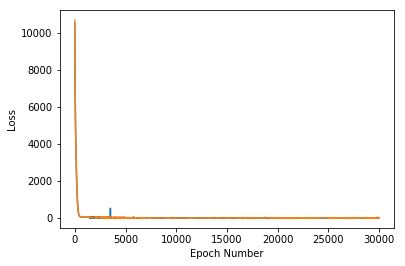

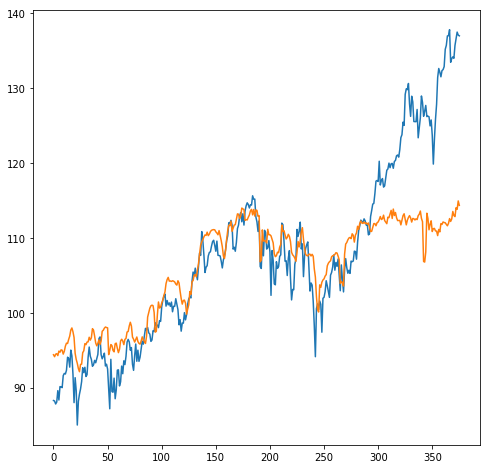

In [41]:
# LSTM Regression

x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_close, True)

x_train = np.expand_dims(x_train, axis = 2)
x_val = np.expand_dims(x_val, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
x = np.expand_dims(x, axis = 2)

#print(np.mean(x_train, axis=0))

# Try an LSTM neural network with pooling
model = tf.keras.Sequential([
    tf.keras.layers.GaussianNoise(input_shape=(87, 1), stddev = 0.5),
    tf.keras.layers.LSTM(units=75, return_sequences=False, dropout=0.25, recurrent_dropout=0.25),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='mean_squared_error')
# Train the model
history = model.fit(x_train, y_train, batch_size = 64, verbose = 1,
                    validation_data = (x_val, y_val), epochs = 30000)
print('Finished training')
plt.xlabel('Epoch Number')
plt.ylabel("Loss")
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
# Print training acc, validation acc, and test acc, plot results

print(r2_score(y_train, model.predict(x_train)))
print(r2_score(y_val, model.predict(x_val)))
print(r2_score(y_test, model.predict(x_test)))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x)), model.predict(x))

In [49]:
print(explained_variance_score(y_test, model.predict(x_test), multioutput='uniform_average'))
print(mean_squared_error(y_test, model.predict(x_test)))
from IPython.display import SVG
SVG(tf.keras.utils.model_to_dot(model).create(prog = 'dot', format = 'svg'))

-0.0460517389377999
248.84664977863446


AttributeError: module 'tensorflow.python.keras.api._v1.keras.utils' has no attribute 'model_to_dot'

In [ ]:
# LSTM Classifier

x, x_train, x_val, x_test, y_train, y_val, y_test = splitData(x_unscaled, y_classifier, True)

x_train = np.expand_dims(x_train, axis = 2)
x_val = np.expand_dims(x_val, axis = 2)
x_test = np.expand_dims(x_test, axis = 2)
x = np.expand_dims(x, axis = 2)

#print(np.mean(x_train, axis=0))

# Our model is over-fitting, add a validation set and dropout
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=12, kernel_size=3, activation = 'relu',
                          input_shape=(87, 1), padding = 'causal'),
    tf.keras.layers.MaxPooling1D(pool_size = 2, padding = 'same'),
    tf.keras.layers.LSTM(units=75, return_sequences=False, dropout=0.25, recurrent_dropout=0.25),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, batch_size = 32, verbose = 1,
                    validation_data = (x_val, y_val), epochs = 300)
print('Finished training')
plt.xlabel('Epoch Number')
plt.ylabel("Accuracy")
plt.plot(history.history['acc'], label = 'Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')
# Print training acc, validation acc, and test acc, plot results

y_train_probs = model.predict(x_train)
y_val_probs = model.predict(x_val)
y_test_probs = model.predict(x_test)
y_train_preds = [1*(temp[1]>=temp[0]) for temp in y_train_probs]
y_val_preds = [1*(temp[1]>=temp[0]) for temp in y_val_probs]
y_test_preds = [1*(temp[1]>=temp[0]) for temp in y_test_probs]

print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))
print(accuracy_score(y_test, y_test_preds))
plt.figure(figsize=(8, 8))
fpr, tpr, threshold = roc_curve(y_test, y_test_preds)
plt.plot(fpr, tpr)